In [1]:
import pickle
from Bio import SeqIO
from modules.visualize import *
from modules.evaluate import *
from modules.utils import *
from modules.alt_species import Data
from tqdm.notebook import tqdm
import numpy as np
import gzip

In [2]:
species = 'human'
version = '109'

In [3]:
data = Data(
    alt_trx = f'data/other_species/{species}_{version}/{species}_trx.txt',
    alt_cds = f'data/other_species/{species}_{version}/{species}_cds.txt.gz',
    alt_info = f'data/other_species/{species}_{version}/{species}.txt',
)

In [8]:
#dataset, info_dict = data.get_dataset()
pickle.dump(dataset, open('data/dataset.pkl', 'wb'))

In [ ]:
X_train = [y['mapped_seq'] for x,y in dataset.items()]
y_train = [y['mapped_cds'] for x,y in dataset.items()]
dataset_ = (X_train,y_train)
pickle.dump(dataset_, open(f'data/other_species/{species}_data.pkl', 'wb'))

In [3]:
preds = pickle.load(open(f'data/other_species/preds_{species}.pkl', 'rb'))

In [4]:
report = dict()
idx = 0
for seq, target, out in tqdm(preds):
    out, target, sequence = crop_zeros(seq, out), crop_zeros(seq, target), crop_zeros(seq, seq)
    out, target, sequence = torch.tensor(out), torch.tensor(target), torch.tensor(sequence)
    preds = bin_pred(out, 0.5)
    recall = recall_score(target, preds)
    iou = iou_score(target, preds)
    report[idx] = {'out': out,
                    'mapped_seq':sequence,
                    'mapped_cds': target,
                    'iou': iou,
                    'recall': recall}
    idx += 1

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
pickle.dump(report, open(f'data/other_species/{species}_report.pkl', 'wb'))

In [11]:
#report = pickle.load(open(f'data/other_species/{species}_report.pkl', 'rb'))
dataset = pickle.load(open(f'data/other_species/{species}_dataset.pkl', 'rb'))

ENST00000000412
recall: 0.0
iou: 0.0
[(159, 993), (871, 1126), (1005, 1221), (1708, 1834), (2003, 2135)]


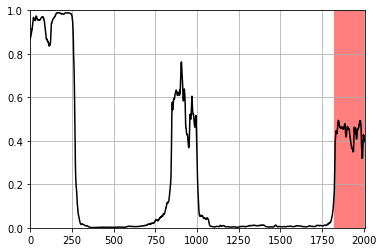

ENST00000004982
recall: 0.990314781665802
iou: 0.990314781665802
[(21, 504)]


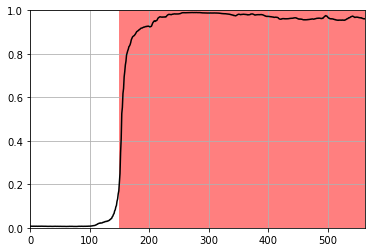

ENST00000000233
recall: 0.9592445492744446
iou: 0.9592445492744446
[(88, 631), (371, 497), (548, 653), (652, 943), (774, 969)]


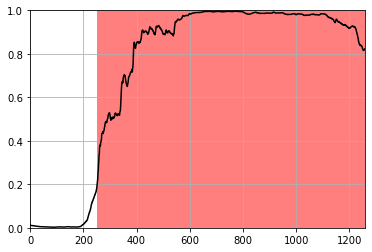

ENST00000003912
recall: 0.9892473220825195
iou: 0.9892473220825195
[(12, 219), (359, 461), (693, 807), (715, 1690), (1553, 1670), (1798, 1915), (2182, 2380), (2521, 2779), (2562, 2784), (2957, 3089), (2962, 3070), (3352, 3514), (4034, 4139), (4068, 4191), (4197, 4437), (4437, 4584), (4601, 4709), (5103, 5193)]


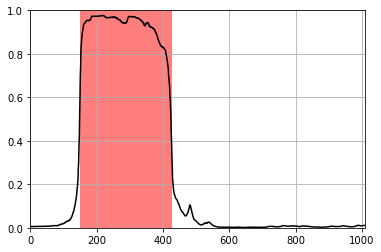

ENST00000002501
recall: 0.9812206625938416
iou: 0.9789227247238159
[(9, 156), (115, 592), (212, 302), (639, 942), (830, 1313), (1117, 1813)]


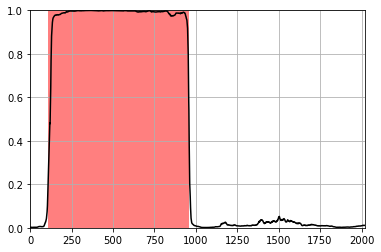

ENST00000000442
recall: 1.0
iou: 0.978723406791687
[(225, 1497), (388, 808), (808, 1096), (1255, 1432), (1542, 1872), (1825, 1963), (2142, 2241)]


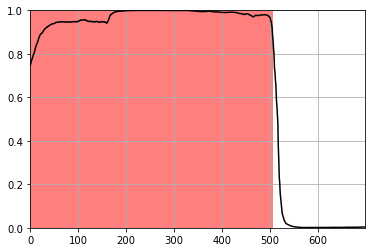

ENST00000002596
recall: 1.0
iou: 0.8960526585578918
[(304, 1228), (419, 713), (845, 1010), (1028, 1238), (1687, 1852), (1894, 2008), (2404, 2548), (2617, 2824), (3027, 3204), (3122, 3212), (3375, 3480), (3457, 3694), (3808, 3907), (4194, 4314), (4279, 4411), (4664, 4841), (4941, 5091), (5146, 5338), (5961, 6066), (6336, 6432), (6538, 6658)]


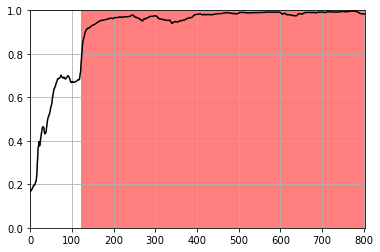

ENST00000004103
recall: 1.0
iou: 0.9784058332443237
[(75, 783), (94, 253), (484, 628), (602, 842)]


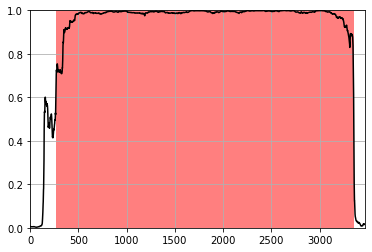

ENST00000002165
recall: 1.0
iou: 1.0
[(86, 1490), (384, 480), (768, 858), (864, 972), (1173, 1269), (1288, 1381), (1563, 1710), (1833, 1953)]


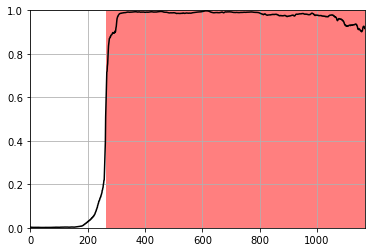

ENST00000001008
recall: 1.0
iou: 0.9950739145278931
[(170, 1550), (357, 453), (501, 597), (609, 900), (1269, 1491), (1872, 1983), (1970, 2303), (1987, 2179), (2399, 2504), (2571, 2862), (2855, 2990), (3022, 3127), (3392, 3512)]


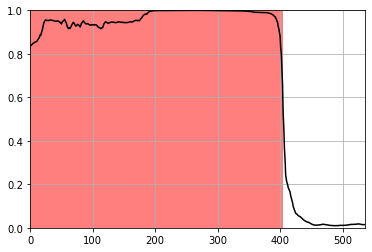

ENST00000005178
recall: 1.0
iou: 1.0
[(223, 1459), (914, 1052), (1400, 1520), (1780, 1885), (1900, 2197), (2395, 2506), (2639, 2747), (2743, 2890)]


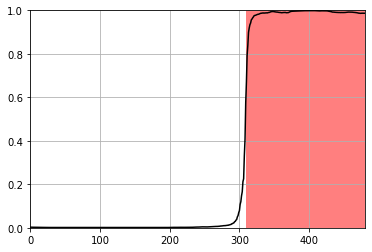

ENST00000002125
recall: 1.0
iou: 0.9900000095367432
[(48, 1374), (658, 793), (1979, 2093)]


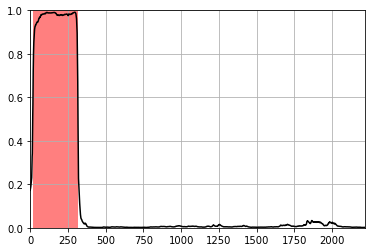

ENST00000003583
recall: 0.9977400898933411
iou: 0.9977400898933411
[(142, 1006), (191, 422), (461, 602), (987, 1377), (1534, 1903), (1745, 1871)]


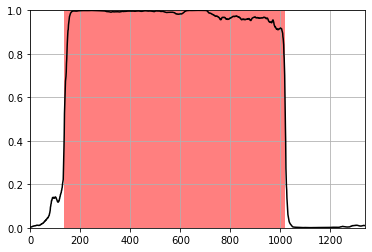

ENST00000007264
recall: 0.2950819730758667
iou: 0.15126051008701324
[(133, 1072), (479, 632), (836, 1121), (1125, 1260), (1295, 1520), (1643, 1820), (1897, 2035)]


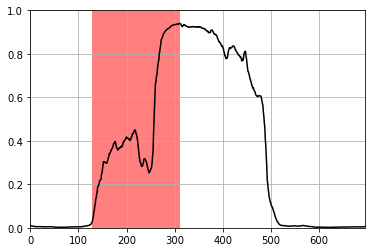

ENST00000006053
recall: 0.8110851049423218
iou: 0.8110851049423218
[(79, 1273), (171, 489), (608, 1364), (1370, 1616), (1602, 1806), (1802, 1895), (2063, 2171), (2316, 2556), (2362, 2479), (2684, 3143), (2692, 2821)]


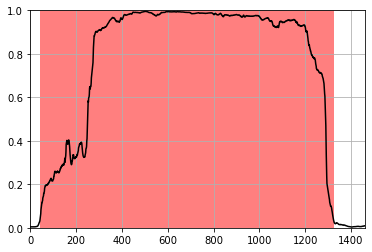

ENST00000006015
recall: 0.9967077970504761
iou: 0.9934372305870056
[(88, 1030), (98, 218), (303, 471), (1079, 1196), (1256, 1364), (1712, 2027), (1845, 1965), (2255, 2360), (2541, 2652)]


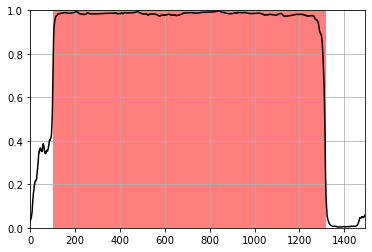

ENST00000005259
recall: 1.0
iou: 0.9991756081581116
[(70, 796), (81, 186), (846, 1038), (1307, 1421), (1827, 2037), (2293, 2437)]


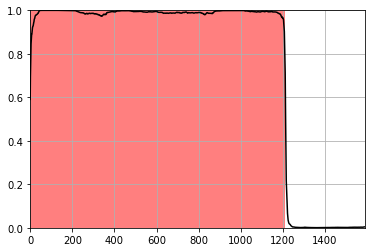

ENST00000007390
recall: 1.0
iou: 0.6410684585571289
[(74, 1013), (640, 859), (744, 1038), (1065, 1194)]


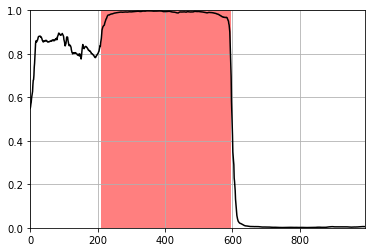

ENST00000006275
recall: 0.9868420958518982
iou: 0.9868420958518982
[(19, 541), (251, 527)]


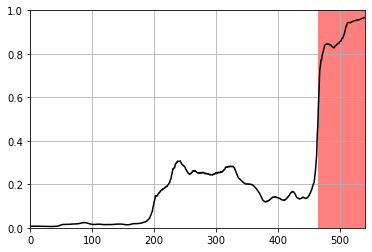

ENST00000006750
recall: 1.0
iou: 0.9174484014511108
[(70, 760), (419, 524), (830, 1016), (1039, 1225)]


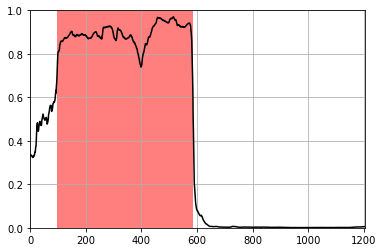

ENST00000006724
recall: 0.9983207583427429
iou: 0.9958124160766602
[(202, 1000), (1225, 1390), (1460, 1592), (1841, 2000), (1944, 2040)]


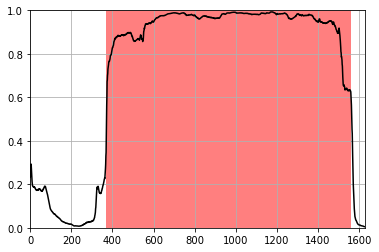

ENST00000005284
recall: 0.9915966391563416
iou: 0.9915966391563416
[(146, 356), (420, 1368), (1424, 1679), (1479, 1797)]


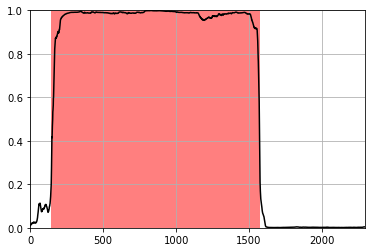

ENST00000005558
recall: 0.6168385148048401
iou: 0.6168385148048401
[(470, 1826), (1005, 1227), (1590, 1686)]


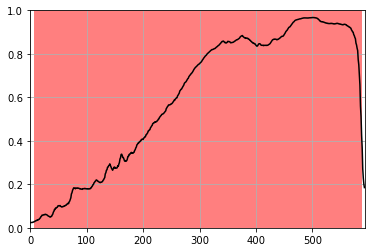

ENST00000005756
recall: 0.9953703880310059
iou: 0.9862385392189026
[(188, 1142), (1503, 1629), (1610, 1766), (1635, 1779), (2023, 2137), (2182, 2293)]


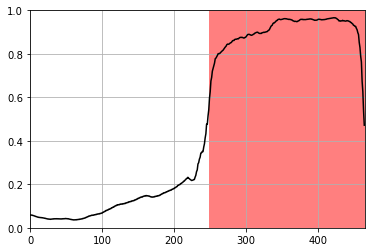

ENST00000005995
recall: 0.7794871926307678
iou: 0.7794871926307678
[(32, 977), (127, 286), (708, 801)]


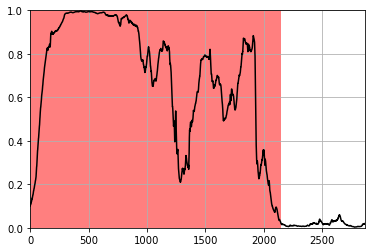

ENST00000005257
recall: 0.9691358208656311
iou: 0.9691358208656311
[(291, 912), (1038, 1152), (1313, 1436), (1935, 2025), (2081, 2177), (2221, 2518), (2487, 2628)]


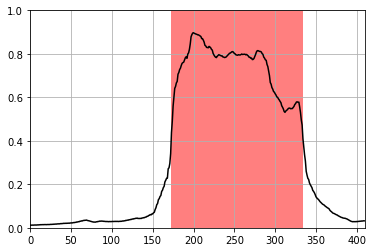

ENST00000006251
recall: 0.999451756477356
iou: 0.9769560694694519
[(194, 1334), (483, 648), (657, 747)]


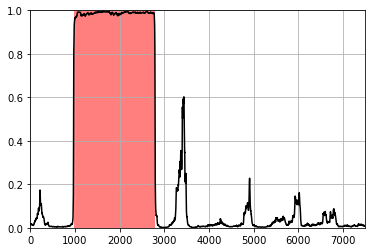

ENST00000005180
recall: 0.863095223903656
iou: 0.863095223903656
[(35, 320), (271, 403)]


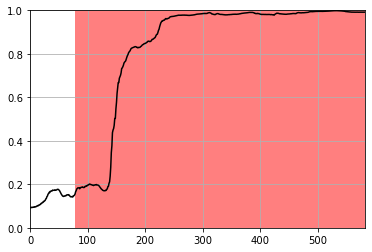

ENST00000005374
recall: 1.0
iou: 0.9894459247589111
[(132, 477), (428, 563), (886, 1009)]


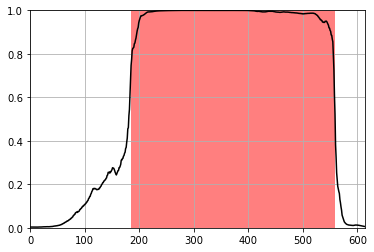

ENST00000006777
recall: 1.0
iou: 0.16605165600776672
[(49, 1144), (962, 1058), (1454, 1655)]


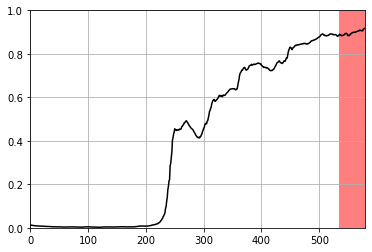

ENST00000008180
recall: 0.9929824471473694
iou: 0.9912434220314026
[(85, 592), (209, 353), (354, 573), (440, 554), (588, 720)]


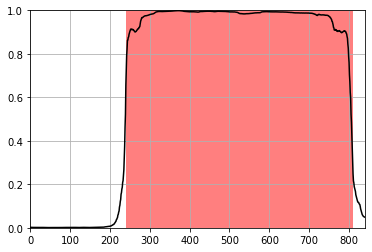

ENST00000007969
recall: 1.0
iou: 0.9325259327888489
[(220, 1252), (263, 377), (611, 701), (1331, 1457)]


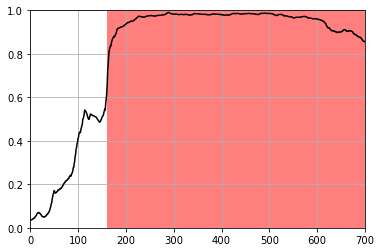

ENST00000009180
recall: 0.931506872177124
iou: 0.931506872177124
[(100, 787), (822, 933), (956, 1052)]


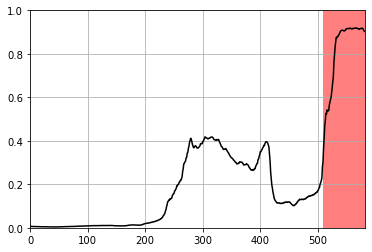

ENST00000007516
recall: 0.9603524208068848
iou: 0.9603524208068848
[(26, 497), (51, 183), (483, 645)]


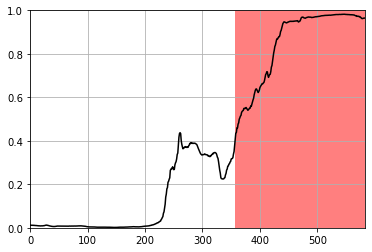

ENST00000009041
recall: 1.0
iou: 0.8338108658790588
[(234, 939), (289, 433), (694, 796), (805, 931), (935, 1091), (1540, 1639)]


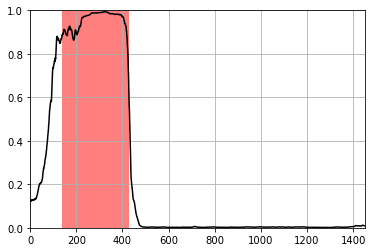

ENST00000013070
recall: 0.9712643623352051
iou: 0.9657142758369446
[(36, 1314), (274, 397), (1210, 1375), (1474, 1762), (1628, 1733), (1903, 1993), (1949, 2183), (2659, 2770), (2663, 2765), (2804, 2915), (2815, 2908), (2865, 3000), (3207, 3468)]


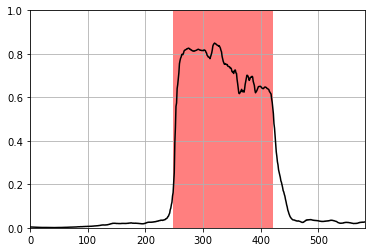

ENST00000011653
recall: 0.9966931343078613
iou: 0.9966931343078613
[(202, 1579), (750, 840), (1368, 1524), (1651, 1747), (1902, 2121), (1931, 2231), (2023, 2206), (2377, 2506), (2430, 2640), (2629, 3022)]


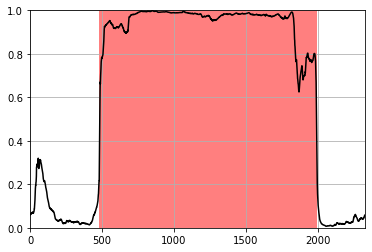

ENST00000012443
recall: 1.0
iou: 0.9769230484962463
[(10, 1510), (191, 386), (630, 756), (740, 851), (1100, 1217)]


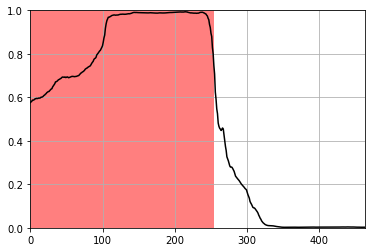

ENST00000007699
recall: 1.0
iou: 0.9926289916038513
[(139, 1234), (452, 620), (656, 881), (944, 1337), (1340, 1505)]


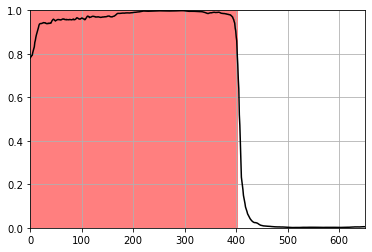

ENST00000008391
recall: 0.9081920981407166
iou: 0.9069111347198486
[(218, 404), (530, 1889), (882, 975), (978, 1119), (1383, 1482)]


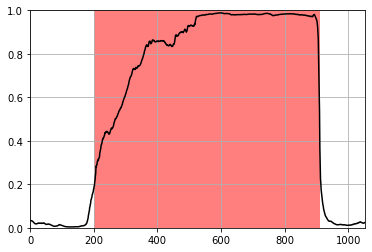

ENST00000007735
recall: 0.9962962865829468
iou: 0.9889705777168274
[(61, 1276), (431, 569), (795, 1053)]


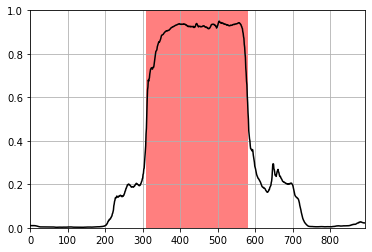

ENST00000011691
recall: 0.9979767203330994
iou: 0.9979767203330994
[(38, 272), (192, 294), (385, 481), (1702, 1813), (1929, 2046), (2253, 2478), (2534, 2657)]


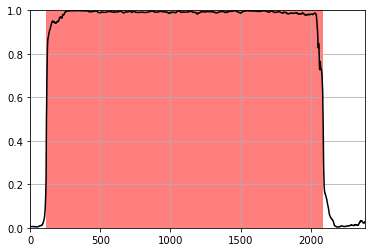

ENST00000010404
recall: 1.0
iou: 0.998266875743866
[(65, 533)]


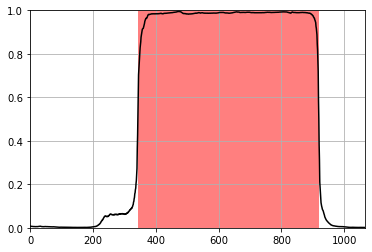

ENST00000009530
recall: 1.0
iou: 1.0
[(161, 1052), (213, 333), (891, 1020), (1160, 1361), (1427, 1577), (1540, 1651)]


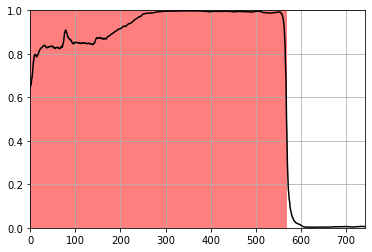

ENST00000009589
recall: 0.9724178314208984
iou: 0.9724178314208984
[(123, 483)]


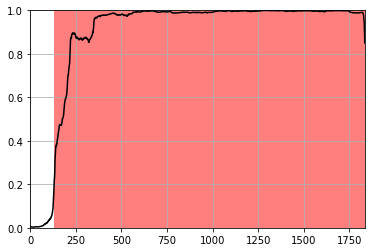

ENST00000009105
recall: 1.0
iou: 0.9927797913551331
[(105, 366), (245, 1676), (504, 615), (762, 1062), (1374, 1515), (1694, 1856), (2044, 2173)]


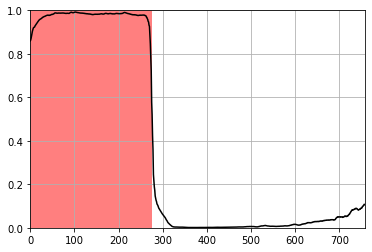

ENST00000007708
recall: 0.995726466178894
iou: 0.995726466178894
[(391, 1423), (626, 971), (1181, 1568), (1530, 1896), (1700, 1853), (2118, 2259)]


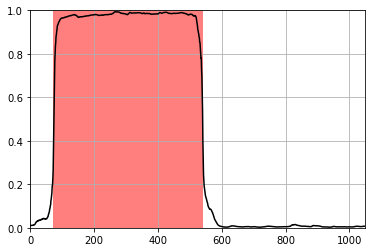

ENST00000011473
recall: 0.9365853667259216
iou: 0.9365853667259216
[(47, 827), (399, 501), (729, 831)]


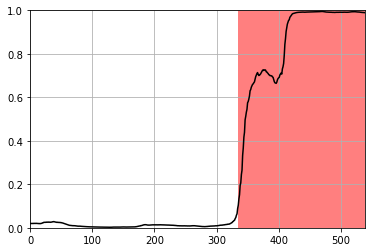

ENST00000013034
recall: 0.9453193545341492
iou: 0.9432561993598938
[(209, 743)]


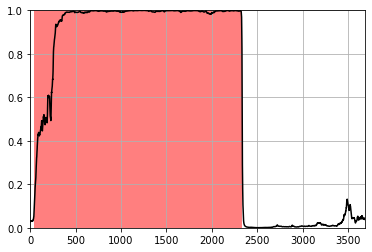

ENST00000011292
recall: 0.9980353713035583
iou: 0.9973822236061096
[(27, 1287), (412, 508), (634, 898), (913, 1039), (1075, 1252)]


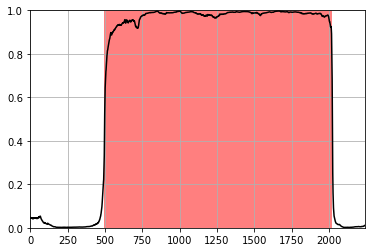

ENST00000011898
recall: 0.997187077999115
iou: 0.9964863061904907
[(159, 879), (875, 1175), (1111, 1207), (1221, 1479), (1519, 1753), (1593, 1710), (1833, 1995), (2831, 3305), (3817, 3925), (3942, 4113)]


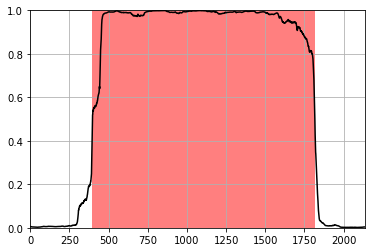

ENST00000012049
recall: 0.9984840750694275
iou: 0.9984840750694275
[(38, 1187), (486, 585), (1392, 1488)]


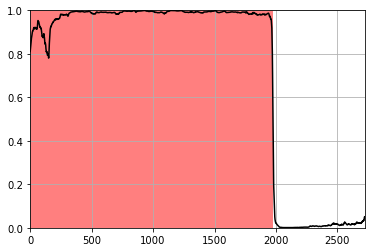

ENST00000008440
recall: 0.997826099395752
iou: 0.9963820576667786
[(128, 752), (468, 630), (938, 1043), (1178, 1346), (1186, 1282), (1538, 1637)]


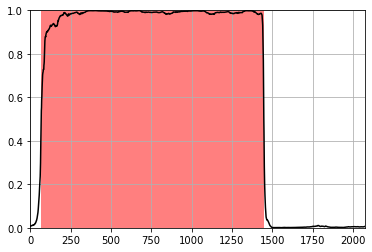

ENST00000008938
recall: 0.9980563521385193
iou: 0.9970873594284058
[(32, 623), (198, 288), (394, 634), (525, 693)]


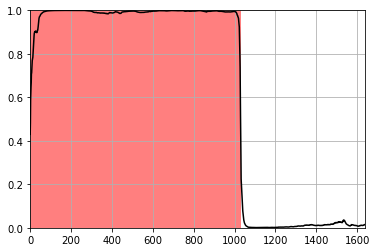

ENST00000054650
recall: 1.0
iou: 0.9791666865348816
[(82, 259), (156, 876), (263, 455), (463, 589), (984, 1122), (1115, 1331)]


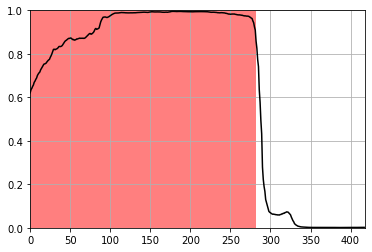

ENST00000031146
recall: 0.0
iou: 0.0
[(6, 96), (22, 130), (678, 1404), (682, 784), (856, 1009), (1747, 1849), (2637, 2751), (2677, 2806), (3044, 3167), (3408, 3504), (3781, 3874), (3934, 4054), (4294, 4384), (4868, 5015), (5087, 5189)]


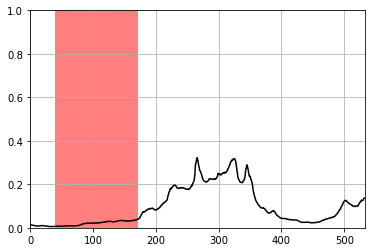

ENST00000037869
recall: 0.8708010315895081
iou: 0.42124998569488525
[(56, 473), (228, 339), (630, 747), (1069, 1174)]


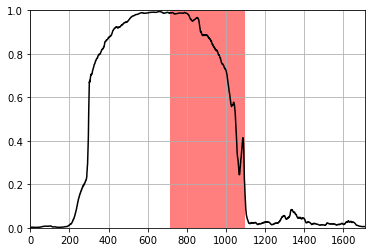

ENST00000020945
recall: 1.0
iou: 0.9943100810050964
[(164, 971), (264, 423), (486, 672), (1077, 1182), (1097, 1229), (1259, 1355), (1714, 1825), (1899, 2169)]


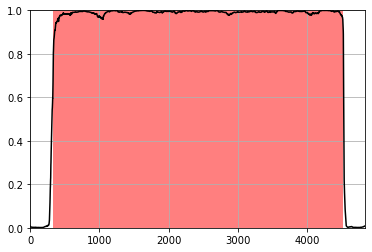

ENST00000044462
recall: 0.9686274528503418
iou: 0.953667938709259
[(119, 905), (132, 234), (237, 357), (546, 645), (837, 1014), (1574, 1679), (1704, 1833), (2428, 2629), (2492, 2585), (2801, 2951), (3236, 3458), (3327, 3684)]


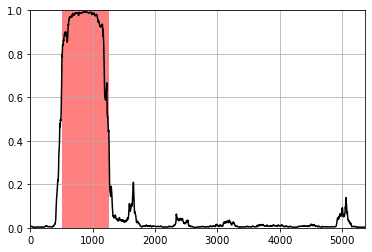

ENST00000055077
recall: 0.9901719689369202
iou: 0.9901719689369202
[(16, 1081), (218, 365), (830, 953), (1146, 1275)]


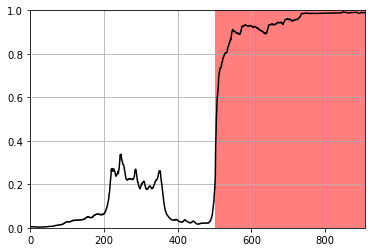

ENST00000023939
recall: 1.0
iou: 0.5308641791343689
[(113, 1124), (198, 294), (837, 951), (951, 1176), (1308, 1467), (1540, 1648)]


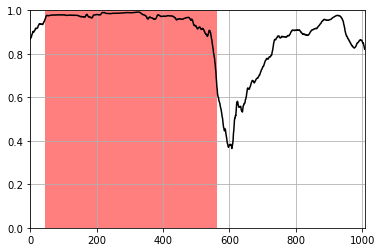

ENST00000057513
recall: 0.9347442388534546
iou: 0.9347442388534546
[(196, 1174), (1412, 1502), (1813, 1939), (2238, 2379)]


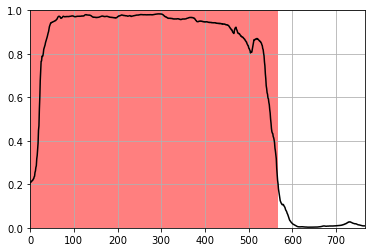

ENST00000025399
recall: 1.0
iou: 1.0
[(314, 1406), (465, 555), (1251, 1344)]


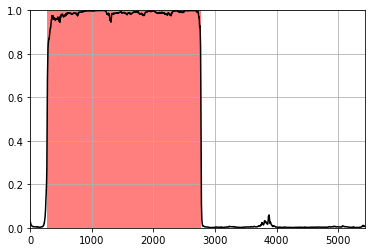

ENST00000013894
recall: 1.0
iou: 0.9820972084999084
[(42, 177), (484, 598), (587, 683)]


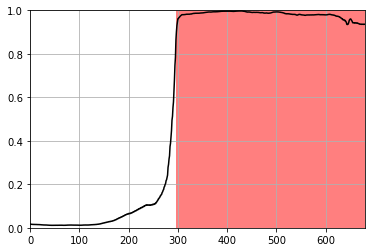

ENST00000052754
recall: 1.0
iou: 0.9372128844261169
[(196, 1276), (1854, 1974), (2153, 2399), (2515, 2671), (2574, 2718), (3188, 3278), (3383, 3566), (3754, 3868), (3771, 3933), (3967, 4213), (4222, 4336), (4481, 4616), (4860, 4974), (4976, 5165), (5007, 5118), (5210, 5408), (5425, 5575), (5775, 5907), (6308, 6410), (6414, 6540)]


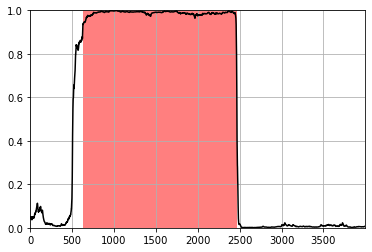

ENST00000029410
recall: 0.9750410318374634
iou: 0.9608414173126221
[(56, 437), (79, 1063), (602, 941), (956, 1079), (1153, 1495)]


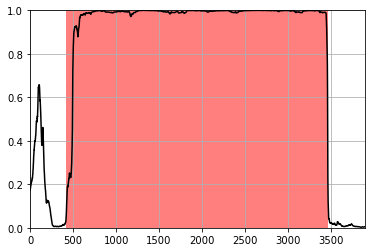

ENST00000053468
recall: 1.0
iou: 0.9998363852500916
[(12, 618), (778, 931), (2001, 2100)]


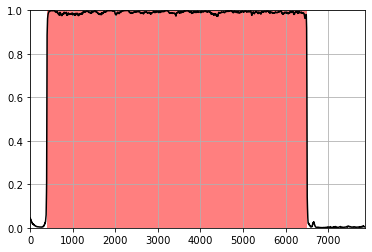

ENST00000053243
recall: 0.9932659864425659
iou: 0.9932659864425659
[(115, 670), (446, 632)]


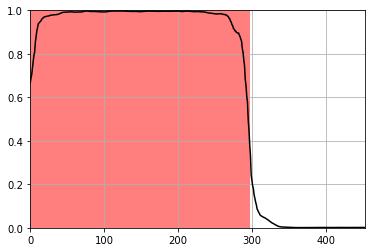

ENST00000064724
recall: 0.9598108530044556
iou: 0.9508196711540222
[(199, 823), (332, 452), (674, 857), (1030, 1162), (1394, 1610), (1772, 1871), (1934, 2126), (2420, 2555)]


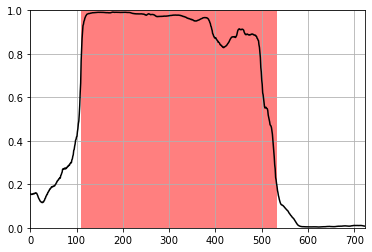

ENST00000014930
recall: 0.9986737370491028
iou: 0.9969108700752258
[(151, 721)]


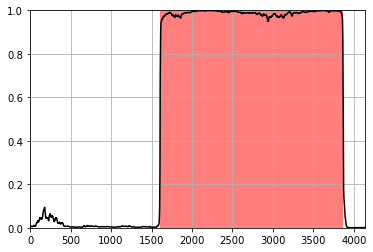

ENST00000028008
recall: 0.9954233169555664
iou: 0.9954233169555664
[(402, 618), (595, 1177), (743, 863)]


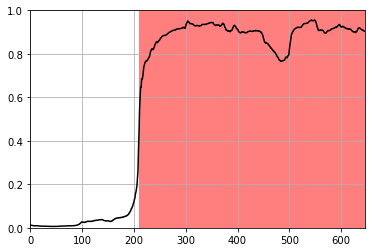

ENST00000052569
recall: 0.9997222423553467
iou: 0.9947484731674194
[(240, 1605), (257, 434), (598, 727), (1102, 1249), (1567, 1675), (1848, 1947), (2152, 2299), (3117, 3216), (3421, 3517), (3947, 4091), (4098, 4236)]


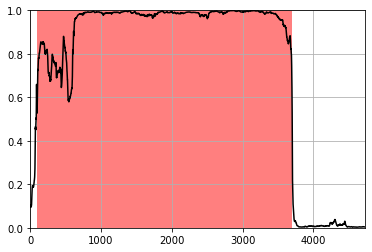

ENST00000054950
recall: 1.0
iou: 0.9229698181152344
[(123, 1119), (478, 571), (781, 898), (922, 1024), (1136, 1250), (1281, 1377), (1666, 1765), (1948, 2080)]


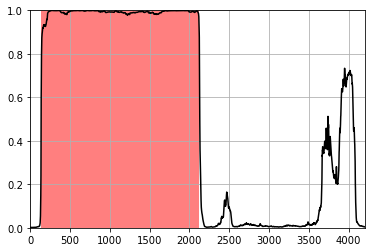

ENST00000064780
recall: 0.9857015013694763
iou: 0.9848214387893677
[(126, 1419), (266, 491), (328, 817), (1521, 1626), (1667, 1799), (2132, 2249), (3189, 3297)]


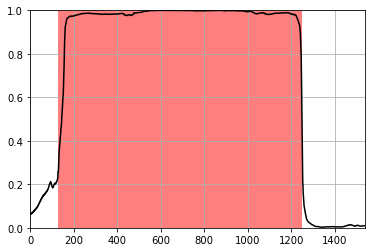

ENST00000064778
recall: 0.9969135522842407
iou: 0.9847561120986938
[(285, 1020), (325, 475), (724, 919), (1789, 2179), (2301, 2472), (2500, 2641), (2886, 3198), (3181, 3451), (3294, 3417), (3454, 3607), (3540, 3693), (4021, 4147), (4308, 4497), (4609, 4747), (4900, 5104), (5031, 5133), (5207, 5357), (5353, 5584), (5745, 6105), (5867, 6002), (6089, 6305), (6229, 6427), (6517, 6622), (6792, 6888)]


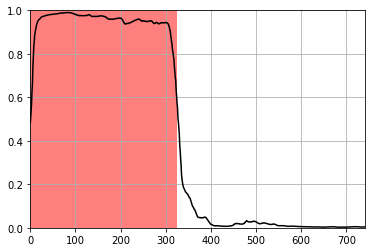

ENST00000022615
recall: 0.9921568632125854
iou: 0.9895697236061096
[(91, 943), (1118, 1223)]


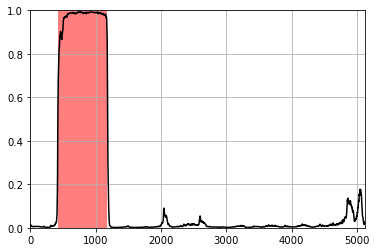

ENST00000060969
recall: 0.9981430172920227
iou: 0.8307573199272156
[(78, 702), (892, 1012), (2122, 2248), (2768, 2903), (3144, 3318), (3901, 4018), (4235, 4328), (4375, 4531), (4743, 4950)]


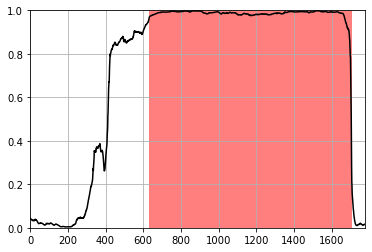

ENST00000054666
recall: 0.9991063475608826
iou: 0.9738675951957703
[(88, 391), (548, 638), (665, 815), (911, 1004), (1091, 1187), (1441, 1549), (1549, 1726), (1671, 1839), (1930, 2023)]


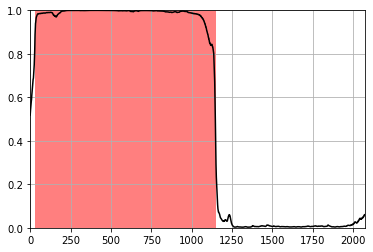

ENST00000016913
recall: 0.0
iou: 0.0
[(57, 861), (847, 964)]


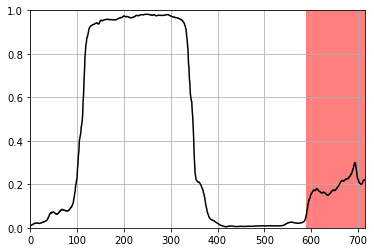

ENST00000037243
recall: 0.9989743828773499
iou: 0.9989743828773499
[(108, 462), (406, 514)]


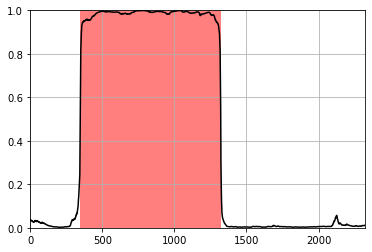

ENST00000014914
recall: 1.0
iou: 0.9939271211624146
[(110, 1184), (735, 978), (987, 1167), (1207, 1486), (2600, 2702), (3070, 3280), (3554, 3770), (4184, 4421), (4221, 4374), (4972, 5062), (5039, 5147), (5052, 5235), (5364, 5505), (5464, 5560), (5833, 5995), (6068, 6167), (6306, 6447), (6355, 6520)]


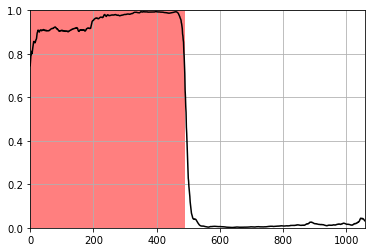

ENST00000014935
recall: 0.9991539716720581
iou: 0.9957841634750366
[(794, 1703), (1146, 1257), (1428, 1611), (2446, 2545)]


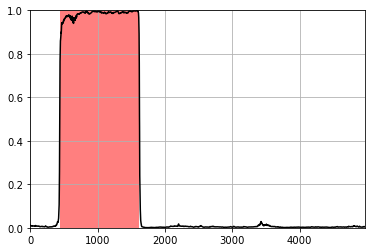

ENST00000046087
recall: 1.0
iou: 0.9987309575080872
[(52, 1108), (527, 647), (1046, 1160)]


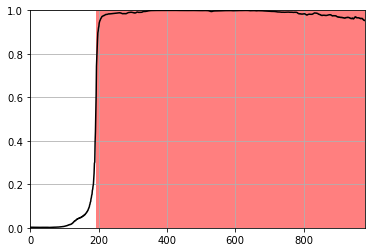

ENST00000023064
recall: 0.0
iou: 0.0
[(193, 1657), (227, 461), (396, 555), (648, 816), (872, 983), (1338, 1653)]


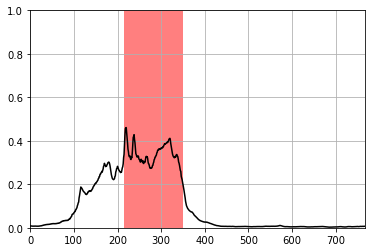

ENST00000020926
recall: 1.0
iou: 0.8106383085250854
[(134, 1415), (486, 666), (1518, 1614), (1537, 1660), (1598, 1907), (2026, 2143), (2081, 2171), (2644, 2749), (2754, 2844), (3067, 3283), (3209, 3317), (3626, 3716), (3797, 3914), (3910, 4003), (4282, 4378), (4823, 4952)]


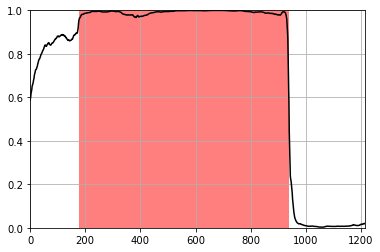

ENST00000019019
recall: 1.0
iou: 1.0
[(17, 158), (429, 1413), (457, 556), (1454, 1559)]


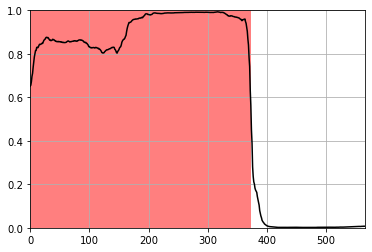

ENST00000043402
recall: 0.995121955871582
iou: 0.995121955871582
[(226, 1648), (437, 914), (1136, 1304), (1364, 1877), (1809, 1905)]


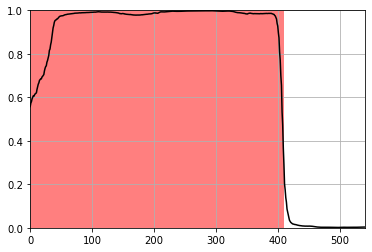

ENST00000039007
recall: 0.9987325668334961
iou: 0.9936948418617249
[(93, 1158), (454, 652), (1186, 1276)]


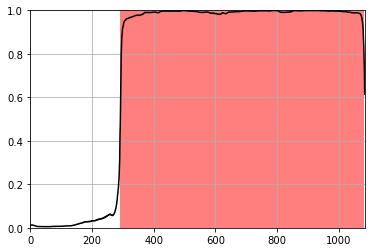

ENST00000019103
recall: 0.9975757598876953
iou: 0.9879952073097229
[(257, 1580), (520, 616), (864, 1164), (1042, 1183), (1431, 1695), (1697, 1847)]


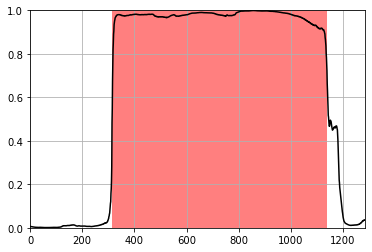

ENST00000013222
recall: 0.9991496801376343
iou: 0.9983007907867432
[(16, 808), (41, 131), (384, 531), (440, 599), (695, 845), (1114, 1384), (2077, 2173), (2287, 2500)]


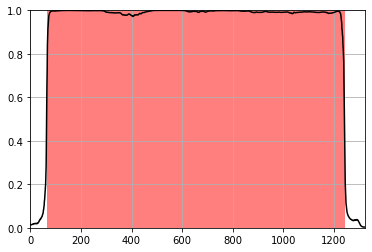

ENST00000040663
recall: 0.0
iou: 0.0
[(67, 1177), (719, 983), (986, 1127), (1230, 1326), (1430, 1562), (2093, 2201), (2234, 2342), (2389, 2752), (2745, 2853)]


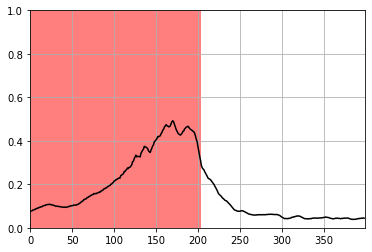

ENST00000013807
recall: 0.9062832593917847
iou: 0.9062832593917847
[(192, 1164), (277, 469), (580, 718), (902, 1091)]


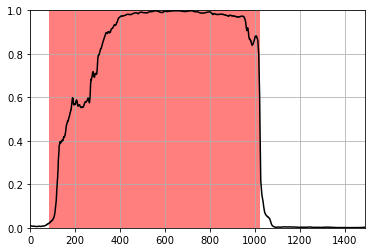

ENST00000046640
recall: 0.9962013363838196
iou: 0.9962013363838196
[(29, 209), (301, 1405), (2389, 2509), (3119, 3227), (3731, 4040), (3837, 3933)]


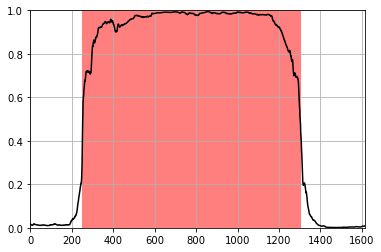

ENST00000064571
recall: 0.9755351543426514
iou: 0.9755351543426514
[(1029, 1125), (1121, 1253), (1348, 1954), (2039, 2246)]


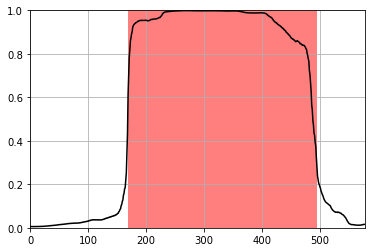

ENST00000034275
recall: 1.0
iou: 0.9913294911384583
[(4, 1504), (473, 599), (620, 722), (827, 1130)]


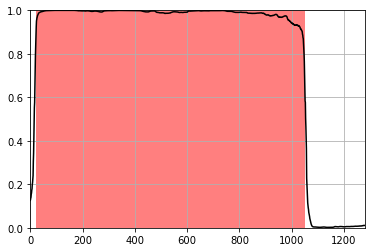

ENST00000023897
recall: 0.9979270100593567
iou: 0.9979270100593567
[(142, 472), (468, 1839), (962, 1058), (1247, 1385)]


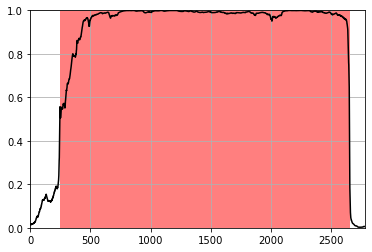

ENST00000016171
recall: 0.9946523904800415
iou: 0.9940617680549622
[(78, 1311), (715, 859), (1018, 1153), (1393, 1486), (1526, 1667), (1814, 1904), (2190, 2301), (2699, 2945), (3122, 3239), (3981, 4074), (4155, 4296), (4647, 4737), (4850, 5012)]


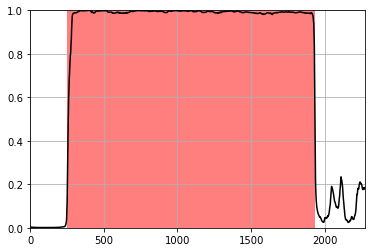

ENST00000040584
recall: 0.9944994449615479
iou: 0.9934065937995911
[(300, 1029), (406, 688), (719, 812), (952, 1321), (1523, 1622), (2243, 2384)]


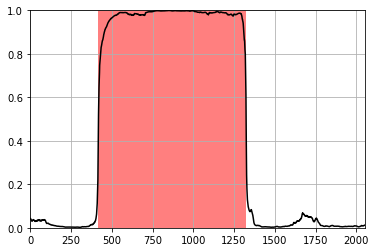

ENST00000160382
recall: 1.0
iou: 0.9962658882141113
[(94, 1375), (119, 362), (537, 636), (632, 752), (908, 1073), (1331, 1475), (1374, 1515)]


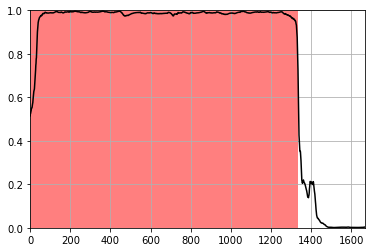

ENST00000177742
recall: 1.0
iou: 0.9963898658752441
[(31, 709), (461, 572)]


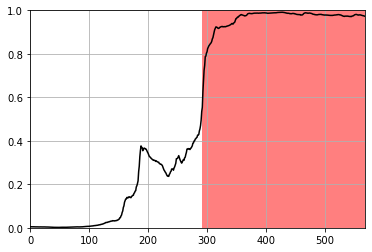

ENST00000179259
recall: 1.0
iou: 0.9316081404685974
[(59, 872), (1099, 1195), (1541, 1721), (2003, 2159), (2646, 2880), (2671, 2803), (3317, 3410), (3429, 3840), (3850, 3940), (3964, 4084), (4071, 4251), (4220, 4427), (4285, 4447), (4871, 5048), (4980, 5196), (5417, 5507), (5640, 5778), (5788, 5878), (6535, 6709), (6974, 7088), (7336, 7651), (7647, 7743), (7667, 7757), (7823, 7955)]


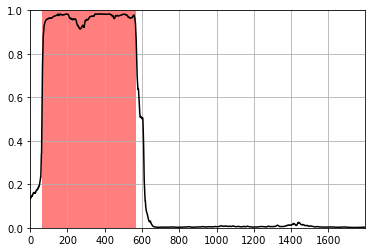

ENST00000078527
recall: 0.9992576241493225
iou: 0.998516321182251
[(86, 197), (160, 1642), (248, 467), (563, 689), (1352, 1445)]


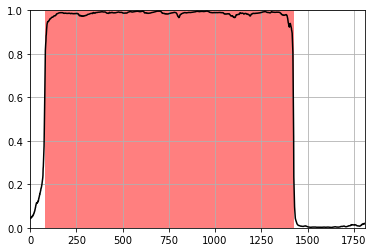

ENST00000166139
recall: 1.0
iou: 0.8817567825317383
[(32, 824), (195, 510), (906, 1026), (1205, 1553), (1608, 1707), (1817, 2333), (2229, 2421)]


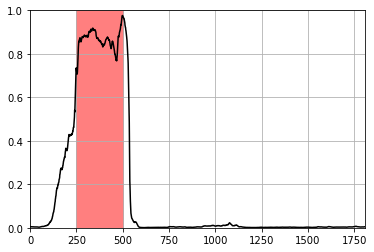

ENST00000176183
recall: 0.9962406158447266
iou: 0.9962406158447266
[(36, 1296)]


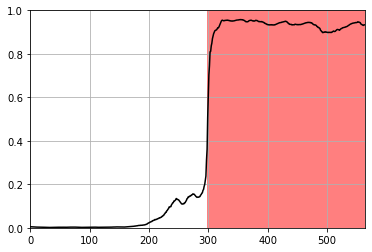

ENST00000162749
recall: 0.9988851547241211
iou: 0.9988851547241211
[(121, 253), (262, 1630), (470, 785), (573, 675), (863, 959), (1762, 1852), (1869, 1968)]


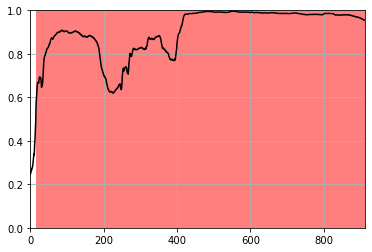

ENST00000175756
recall: 0.999789297580719
iou: 0.9970582127571106
[(52, 1435), (554, 788), (944, 1229), (1718, 1850), (1926, 2091), (2356, 2497), (2565, 2691), (2920, 3079), (3075, 3390), (3389, 3560)]


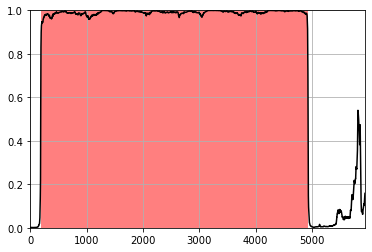

ENST00000169293
recall: 1.0
iou: 0.8324324488639832
[(186, 453), (325, 1468), (695, 914), (1055, 1154), (1220, 1334), (1468, 1624), (1502, 1784), (2277, 2436)]


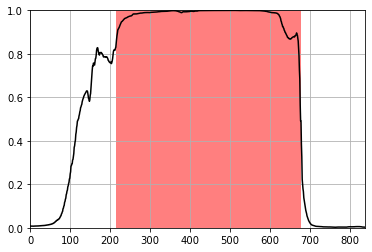

ENST00000158771
recall: 1.0
iou: 0.9929245114326477
[(17, 737), (654, 882), (1059, 1158), (1337, 1457), (1476, 1614), (1638, 1806), (1909, 2014), (2426, 2525), (2464, 2647), (3034, 3130), (3359, 3545), (3538, 3640), (3630, 3738), (3734, 3944), (3968, 4058)]


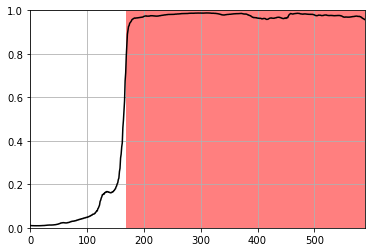

ENST00000078445
recall: 1.0
iou: 0.7214484810829163
[(117, 1503), (641, 773), (922, 1027), (1213, 1351), (1396, 1663), (1554, 1644), (2399, 2573)]


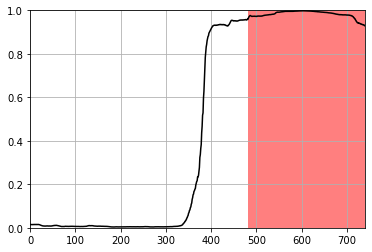

ENST00000084798
recall: 0.875
iou: 0.875
[(162, 252), (555, 1542), (871, 1222), (1513, 1624)]


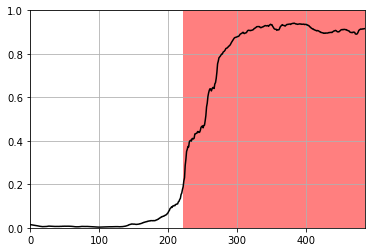

ENST00000175091
recall: 0.9732739329338074
iou: 0.9732739329338074
[(108, 810), (859, 1021)]


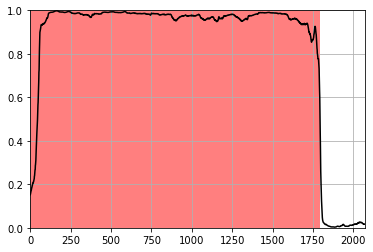

ENST00000173527
recall: 0.8432174324989319
iou: 0.8414965867996216
[(18, 915), (1140, 1263), (1588, 1693)]


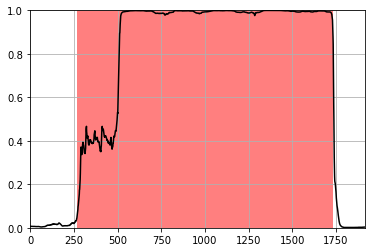

ENST00000185206
recall: 1.0
iou: 0.9754098653793335
[(106, 1339), (110, 227), (266, 497), (1247, 1532), (1545, 1773), (1691, 1796), (1814, 2099), (2073, 2202), (2098, 2257), (2216, 2306), (2382, 2484), (2393, 2498), (2771, 2861), (3919, 4069), (3963, 4098), (4094, 4274), (4588, 4798), (4801, 4909), (5048, 5147), (5211, 5409), (5714, 5939)]


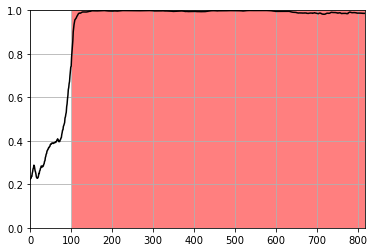

ENST00000156499
recall: 1.0
iou: 1.0
[(219, 1023)]


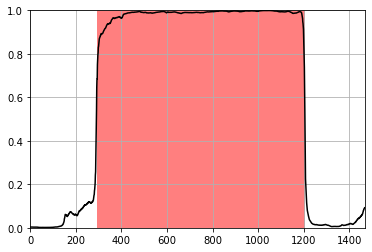

ENST00000169298
recall: 0.99303138256073
iou: 0.99303138256073
[(633, 1854), (1544, 1640), (1654, 1771), (1792, 1936), (1889, 2135), (2049, 2199), (2135, 2255), (2298, 2505), (2347, 2437), (2486, 2756), (2853, 3069), (3221, 3383), (3309, 3417), (3675, 3837), (3928, 4039), (4254, 4353)]


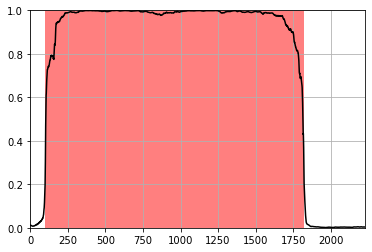

ENST00000164227
recall: 0.9878787994384766
iou: 0.9873800873756409
[(83, 1448), (91, 454), (477, 624), (693, 834), (1257, 1527), (1619, 1802)]


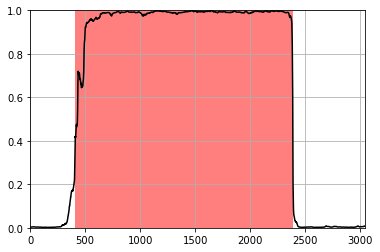

ENST00000084795
recall: 0.993697464466095
iou: 0.993697464466095
[(160, 571), (303, 399)]


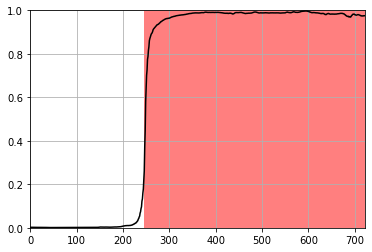

ENST00000167586
recall: 1.0
iou: 0.8776290416717529
[(61, 1480), (266, 413), (972, 1092)]


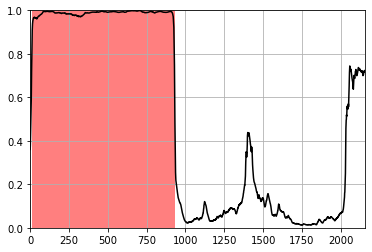

ENST00000180166
recall: 0.853467583656311
iou: 0.8525139689445496
[(313, 949), (677, 938), (1439, 1571), (1453, 1672)]


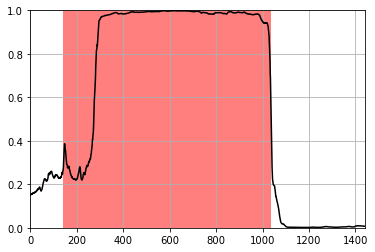

ENST00000157812
recall: 0.9936937093734741
iou: 0.9936937093734741
[(38, 1295), (75, 243), (651, 831), (1125, 1416), (1513, 1642)]


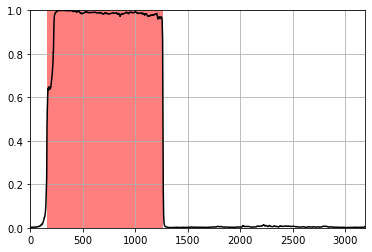

ENST00000187910
recall: 0.866779088973999
iou: 0.866779088973999
[(102, 1377), (1078, 1327)]


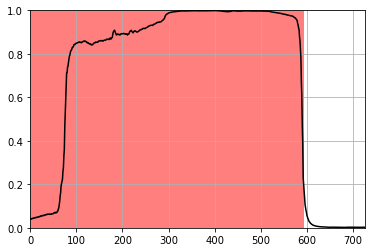

ENST00000182527
recall: 1.0
iou: 0.9868420958518982
[(145, 1258), (209, 437), (857, 1208), (1352, 1811), (1585, 1807), (1875, 2205), (2315, 2444), (2470, 2593), (3255, 3396), (3359, 3473), (3607, 4006), (3713, 3911), (4202, 4352), (4282, 4531), (4617, 4713), (4926, 5031), (6079, 6247), (6269, 6410), (6757, 6985)]


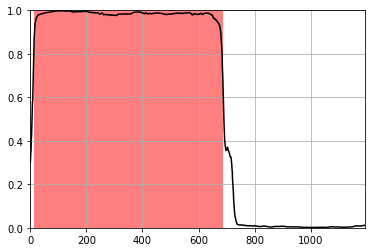

ENST00000167106
recall: 0.9912280440330505
iou: 0.8100358247756958
[(359, 530), (692, 893), (1354, 2452), (1478, 1805), (1857, 2220), (2216, 2546), (2457, 2694), (2524, 2632), (2768, 3044), (3040, 3268), (3275, 3482), (3418, 3538), (4437, 4536), (4480, 4597), (4523, 4691), (4615, 4744), (4810, 4993), (4824, 4947), (4958, 5102), (5327, 5510), (5488, 5731), (5883, 6312), (5911, 6025), (6229, 6406)]


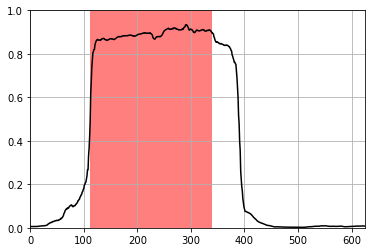

ENST00000181796
recall: 1.0
iou: 0.9984939694404602
[(234, 1155), (478, 697), (1347, 1470), (1601, 1706), (2282, 2384), (2343, 2508), (2914, 3154)]


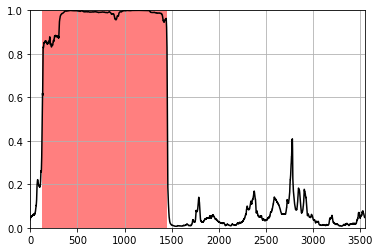

ENST00000158526
recall: 0.9957982897758484
iou: 0.9957982897758484
[(119, 464), (758, 992)]


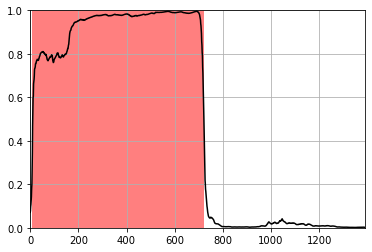

ENST00000163678
recall: 1.0
iou: 0.9975369572639465
[(255, 873), (466, 631), (889, 1429), (1313, 1424)]


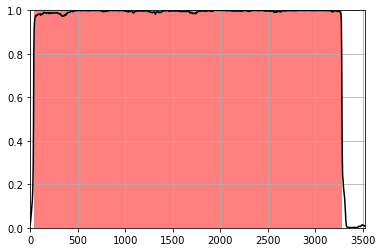

ENST00000188376
recall: 0.9969696998596191
iou: 0.9969696998596191
[(354, 1440), (424, 574), (691, 952)]


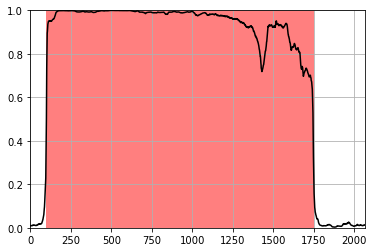

ENST00000081029
recall: 0.9964726567268372
iou: 0.9929701089859009
[(12, 984), (142, 286), (703, 820)]


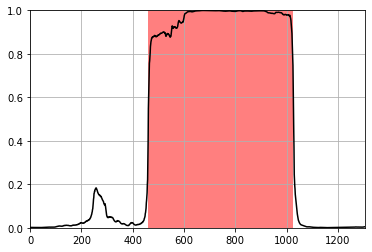

ENST00000187830
recall: 1.0
iou: 0.9846625924110413
[(183, 318), (271, 1360), (311, 431), (455, 764), (905, 1001), (1434, 1722), (1438, 1549), (1745, 1931), (1937, 2150), (2232, 2421), (2647, 2749), (2705, 2900), (2859, 3111)]


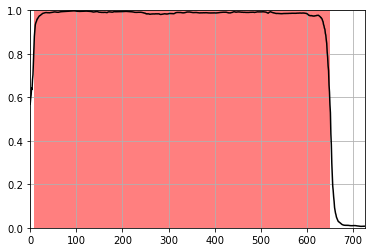

ENST00000183605
recall: 0.9667853116989136
iou: 0.8480749130249023
[(61, 847), (75, 498), (695, 1019), (1375, 1561), (1663, 1783), (1710, 1800), (1941, 2139), (2229, 2415), (2260, 2491), (2829, 2982)]


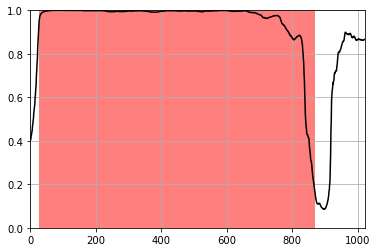

ENST00000184266
recall: 1.0
iou: 0.982206404209137
[(24, 414), (247, 472), (508, 610)]


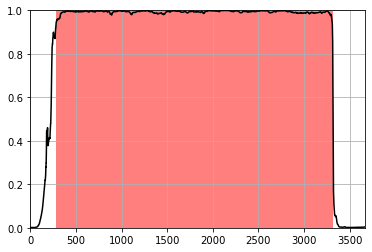

ENST00000187762
recall: 1.0
iou: 0.8523761630058289
[(79, 979), (194, 311), (653, 761), (791, 938), (1517, 1646), (2141, 2267), (2214, 2346), (2279, 2405), (2414, 2534)]


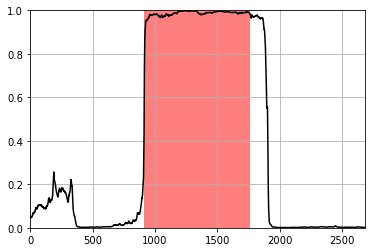

ENST00000182290
recall: 0.9950082898139954
iou: 0.9950082898139954
[(32, 1100), (169, 532), (859, 970)]


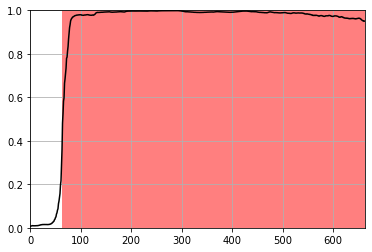

ENST00000178640
recall: 0.7689769268035889
iou: 0.7564935088157654
[(633, 1980), (1117, 1210), (1762, 1873), (1900, 1999), (2051, 2189)]


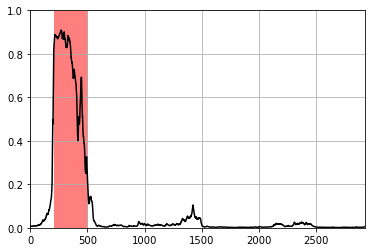

ENST00000166345
recall: 0.0
iou: 0.0
[(115, 1414), (869, 959), (1908, 2007), (1927, 2047), (2013, 2163), (2090, 2189)]


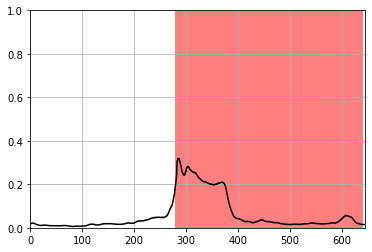

ENST00000176195
recall: 0.9773869514465332
iou: 0.9773869514465332
[(38, 404)]


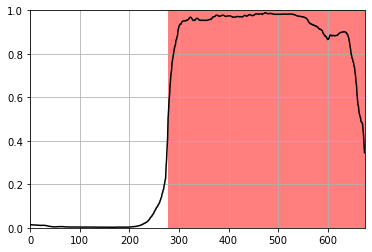

ENST00000178638
recall: 0.9774011373519897
iou: 0.9746478796005249
[(126, 1191), (502, 706), (1306, 1453), (1355, 1445), (1503, 1614), (1595, 1685), (1681, 1930), (2050, 2212), (2186, 2294), (2262, 2382), (2372, 2486), (2724, 2856), (2819, 2984), (2992, 3448), (3693, 3849), (3886, 4009), (3930, 4032), (4122, 4236), (4716, 5010), (4732, 4828), (5431, 5713), (5579, 5951), (5676, 6042)]


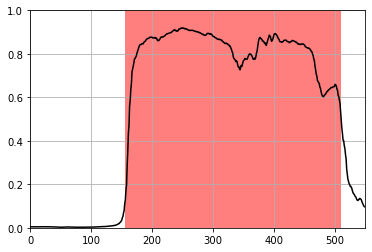

ENST00000160713
recall: 1.0
iou: 0.997633159160614
[]


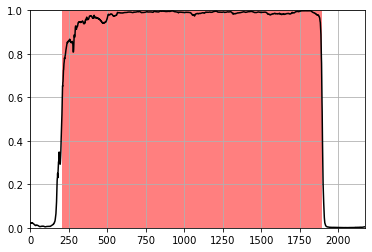

ENST00000165698
recall: 0.9969969987869263
iou: 0.988095223903656
[(144, 750), (152, 242), (254, 344), (816, 912), (930, 1047), (1143, 1287), (1286, 1529), (1528, 1639), (1665, 1791), (2696, 2873)]


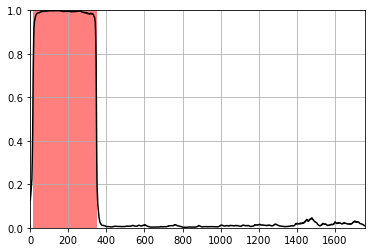

ENST00000170447
recall: 0.99842768907547
iou: 0.99842768907547
[(64, 1315), (101, 341), (353, 446), (509, 719), (1322, 1415), (2605, 2701)]


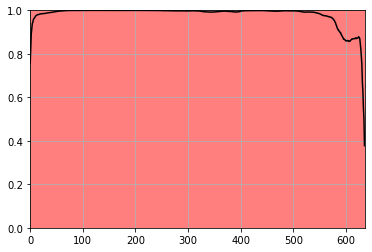

ENST00000075503
recall: 0.9965986609458923
iou: 0.993220329284668
[(160, 256), (281, 1550), (516, 681), (930, 1056), (1443, 1581), (1573, 1699), (1619, 1736), (2065, 2191)]


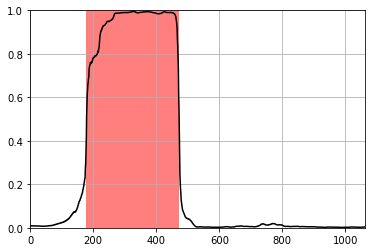

ENST00000156109
recall: 0.9259259104728699
iou: 0.9191176295280457
[(13, 1444), (239, 329), (488, 584), (692, 860), (1034, 1157), (1397, 1496), (1447, 1633)]


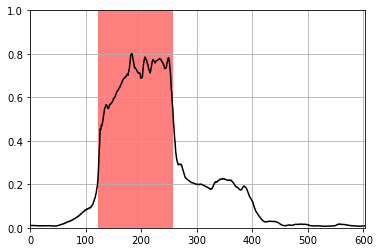

ENST00000167588
recall: 1.0
iou: 0.9936842322349548
[(57, 1332)]


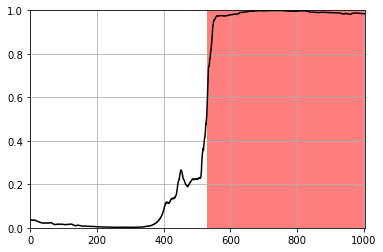

ENST00000075120
recall: 1.0
iou: 0.9833333492279053
[(153, 1644), (1009, 1114), (1636, 1753), (2329, 2491), (2879, 3056), (3108, 3330), (3112, 3256)]


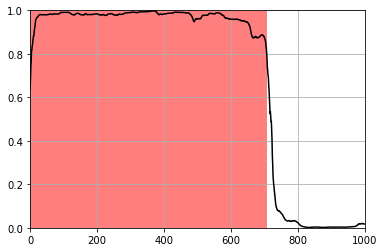

ENST00000181383
recall: 0.9992753863334656
iou: 0.997829258441925
[(24, 1296), (293, 386), (313, 403), (575, 695), (676, 790), (1144, 1270), (1276, 1582)]


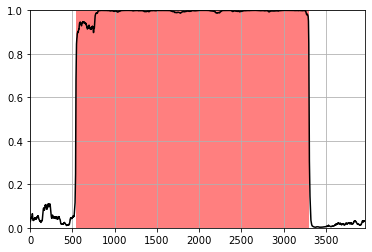

ENST00000170150
recall: 1.0
iou: 1.0
[(91, 1468), (758, 947), (1346, 1439)]


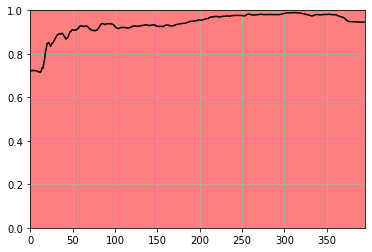

ENST00000161006
recall: 0.998420238494873
iou: 0.9890453815460205
[(66, 1020), (556, 661), (772, 1306)]


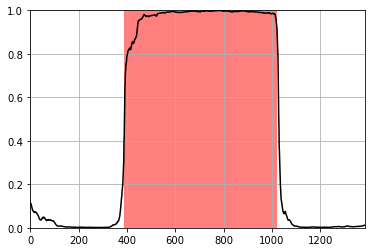

ENST00000168869
recall: 0.9993757605552673
iou: 0.9993757605552673
[(29, 122), (103, 358), (300, 417), (400, 544), (416, 1268), (717, 1065), (760, 874), (1320, 1545), (1652, 1793), (1698, 1926)]


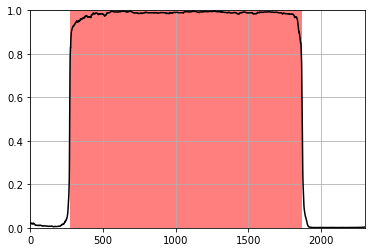

ENST00000164247
recall: 0.9860464930534363
iou: 0.8030303120613098
[(3, 102), (138, 291), (417, 528), (564, 1668), (649, 739), (793, 973), (884, 1211), (1504, 1741), (1790, 2462), (1803, 2082), (2458, 2677), (2984, 3086), (3357, 3459), (3501, 3867), (3563, 3725), (3826, 3922)]


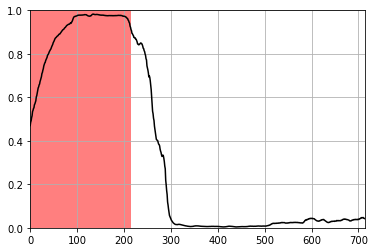

ENST00000158009
recall: 0.9958071112632751
iou: 0.9937238693237305
[(48, 165), (79, 1054), (464, 665)]


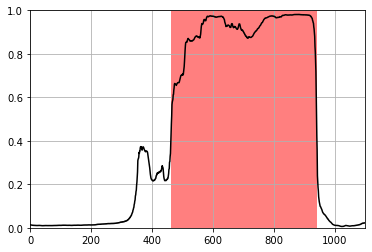

ENST00000156476
recall: 0.9955223798751831
iou: 0.9920674562454224
[(43, 343), (388, 652), (432, 666), (888, 990)]


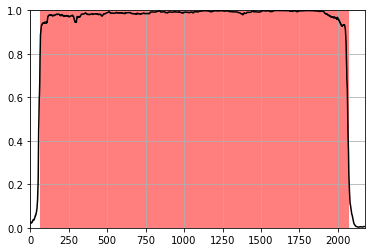

ENST00000187608
recall: 1.0
iou: 0.9848812222480774
[(40, 919), (72, 171), (890, 1088), (1123, 1282)]


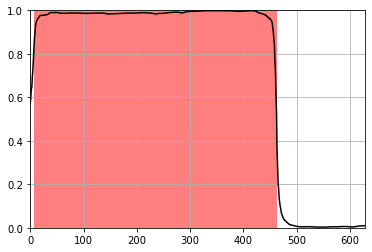

ENST00000155926
recall: 1.0
iou: 1.0
[(1372, 2404), (1871, 2030), (2135, 2264), (2327, 2498), (2607, 2787), (2912, 3026), (3027, 3156), (3136, 3229), (3394, 3514), (3603, 3723), (3777, 4158), (3938, 4097), (4160, 4292)]


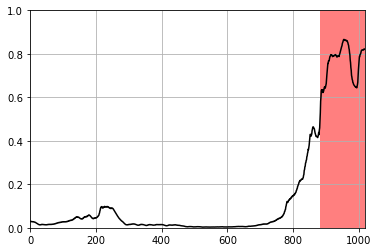

ENST00000168977
recall: 1.0
iou: 0.8656987547874451
[(233, 431), (324, 1017), (694, 844), (965, 1097), (1027, 1117)]


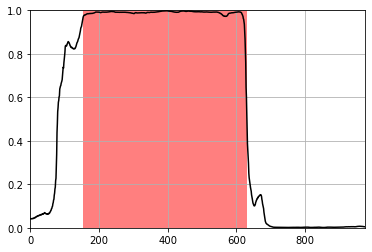

ENST00000156825
recall: 0.9844444394111633
iou: 0.980088472366333
[(170, 950), (594, 735), (691, 844), (1430, 1532), (1503, 1776), (2190, 2313), (2417, 2585), (2704, 2857), (2859, 3183), (3225, 3327), (3539, 3704), (3591, 3816), (3661, 4159), (3956, 4250), (4167, 4428), (4313, 4574), (4521, 4863), (4552, 4789), (4945, 5062), (5058, 5229), (5294, 5417)]


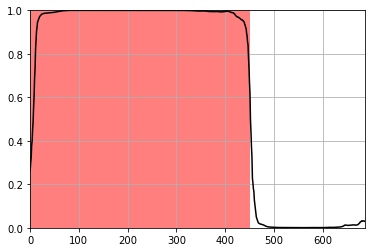

ENST00000155674
recall: 1.0
iou: 0.973456621170044
[(43, 1225), (47, 143), (221, 323), (386, 482), (878, 974), (1349, 1475), (1539, 1692)]


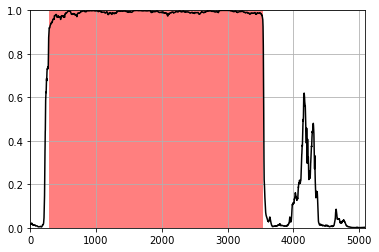

ENST00000162044
recall: 1.0
iou: 0.13600000739097595
[(50, 1490), (246, 483)]


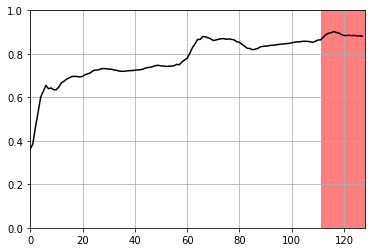

ENST00000172229
recall: 0.9681069850921631
iou: 0.9681069850921631
[(125, 1409), (471, 798), (1068, 1245), (1257, 1521), (1453, 1603), (1763, 1919), (2020, 2152), (2225, 2399), (2370, 2517), (2494, 2866), (2669, 2813), (3071, 3380), (3276, 3390)]


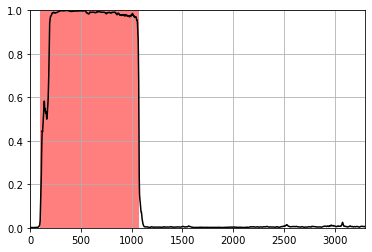

ENST00000168712
recall: 1.0
iou: 0.967432975769043
[(257, 878), (693, 801), (1011, 1107), (1219, 1435), (1236, 1701), (1700, 1796), (1731, 1830), (2122, 2212), (2297, 2399), (2769, 2868), (2899, 3007), (3058, 3163)]


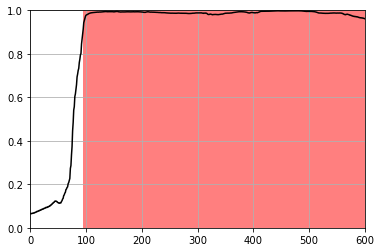

ENST00000072644
recall: 1.0
iou: 0.9892473220825195
[(85, 196), (354, 1275), (508, 685), (1198, 1348), (1274, 1367), (1344, 1443), (1524, 1650), (1622, 1721)]


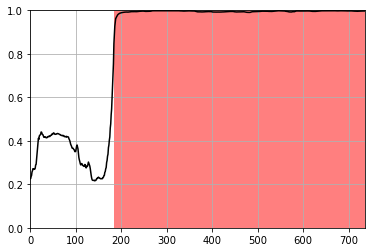

ENST00000188403
recall: 1.0
iou: 1.0
[(28, 1477), (209, 368)]


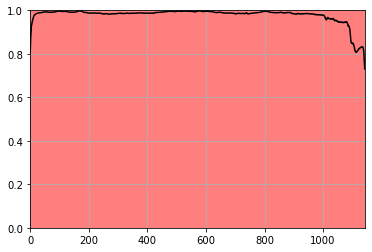

ENST00000185150
recall: 0.995555579662323
iou: 0.995555579662323
[(167, 1619), (282, 375), (429, 600), (1227, 1437), (2144, 2288), (2303, 2423)]


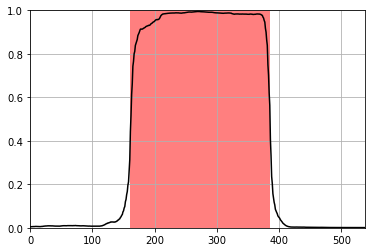

ENST00000169551
recall: 1.0
iou: 0.9754478931427002
[(286, 1033), (450, 702), (1025, 1148), (1050, 1143), (1057, 1267), (1465, 1561), (1784, 1937), (2343, 2442), (2486, 2576)]


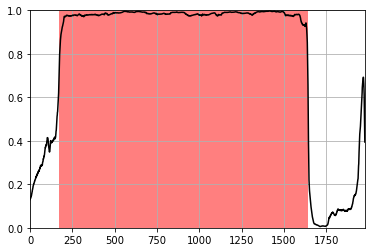

ENST00000157600
recall: 0.997474730014801
iou: 0.997474730014801
[(116, 1214), (196, 301), (1448, 1574), (1545, 1674), (1817, 1928), (1938, 2043), (2039, 2135), (2106, 2214), (2558, 2741), (2658, 2766), (2850, 3087), (3080, 3221), (3138, 3264), (3318, 3489), (3650, 3776), (3676, 3835), (3806, 4115), (3831, 3942), (4036, 4318), (4175, 4268), (4314, 4665), (4483, 4612), (5152, 5377), (5168, 5336), (5580, 5688), (5638, 5746), (5945, 6038), (7141, 7288), (7148, 7256), (7400, 7589)]


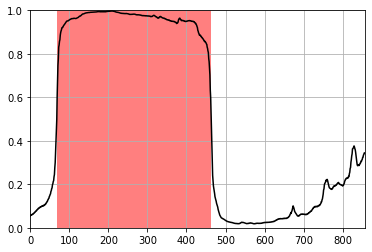

ENST00000174653
recall: 0.9755434989929199
iou: 0.9422572255134583
[(178, 271), (282, 1539), (967, 1162), (1680, 1800), (1942, 2098), (2079, 2172), (2152, 2248), (2828, 2930), (3179, 3314)]


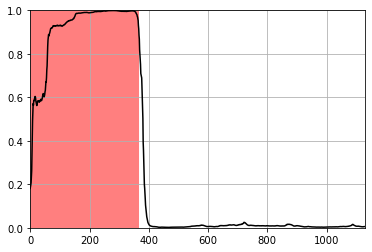

ENST00000086933
recall: 1.0
iou: 0.9681274890899658
[(9, 627), (548, 689), (1779, 1944), (1897, 2017)]


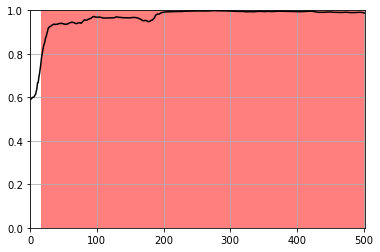

ENST00000085068
recall: 0.9971346855163574
iou: 0.9971346855163574
[(137, 803), (1016, 1109)]


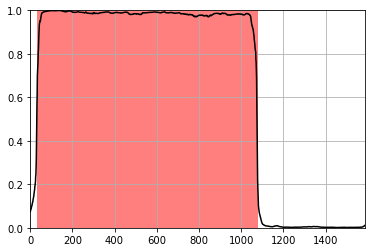

ENST00000176643
recall: 1.0
iou: 0.9858757257461548
[(159, 348), (221, 1679), (384, 540), (1347, 1503), (2016, 2124), (2203, 2314), (3017, 3113), (3202, 3310), (3507, 3681)]


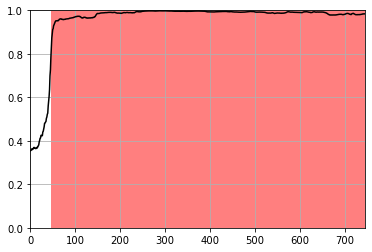

ENST00000171757
recall: 1.0
iou: 0.8401464223861694
[(116, 239), (310, 1330), (419, 530), (557, 647), (1854, 1944), (2142, 2289), (2324, 2423), (2766, 2892), (2897, 3008), (3234, 3345), (3275, 3383)]


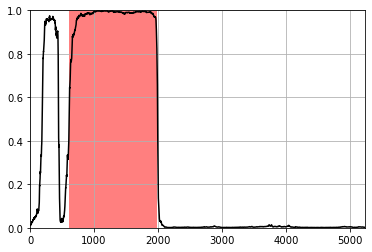

ENST00000188312
recall: 1.0
iou: 0.7705433368682861
[(37, 1228), (59, 173), (413, 509)]


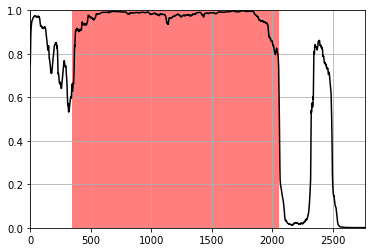

ENST00000187879
recall: 0.9839506149291992
iou: 0.9839506149291992
[(74, 218), (162, 1518), (451, 673), (688, 835)]


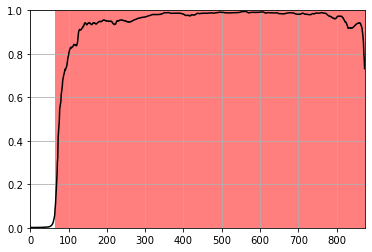

ENST00000184183
recall: 0.9932065010070801
iou: 0.9932065010070801
[(282, 396), (341, 980), (789, 894), (942, 1041)]


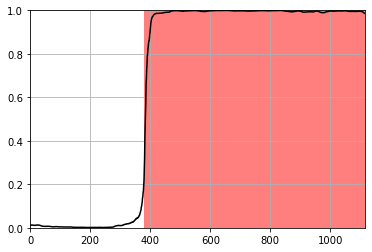

ENST00000167218
recall: 1.0
iou: 0.9965181350708008
[(64, 730), (171, 354), (257, 488), (732, 855), (839, 995)]


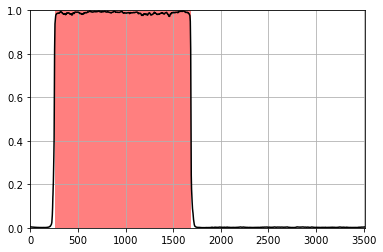

ENST00000168216
recall: 1.0
iou: 1.0
[(25, 811), (440, 551)]


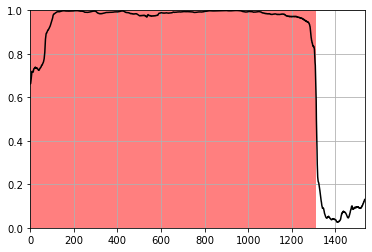

ENST00000168148
recall: 0.9894067645072937
iou: 0.9894067645072937
[(85, 721), (357, 510)]


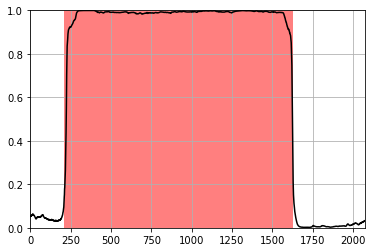

ENST00000164133
recall: 1.0
iou: 0.9977924823760986
[(604, 2098), (1064, 1193), (1265, 1382), (1898, 2216), (1983, 2313), (2285, 2654), (2457, 2706)]


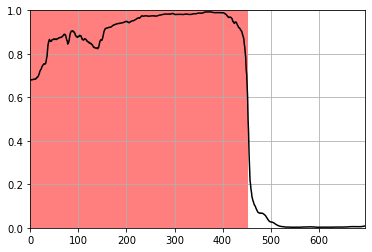

ENST00000078429
recall: 0.9946019053459167
iou: 0.9172371029853821
[(290, 1370), (1393, 1720), (1517, 1625), (1545, 1647), (1752, 1917), (2103, 2370), (2369, 2792), (2843, 3356), (2913, 3102), (3234, 3378), (3274, 3364), (3692, 3962), (3813, 4017)]


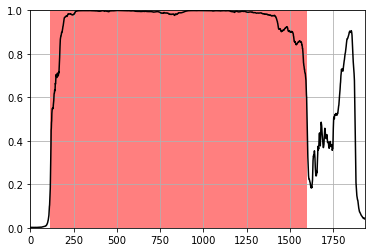

ENST00000216034
recall: 1.0
iou: 1.0
[(22, 451), (598, 901), (921, 1095), (925, 1072), (1119, 1329)]


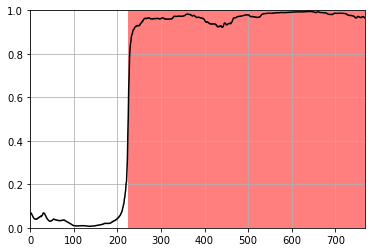

ENST00000216039
recall: 0.997245192527771
iou: 0.9963302612304688
[(680, 1289), (762, 888), (933, 1041), (1057, 1228), (1650, 2175), (1837, 2035), (2242, 2440), (2543, 2633), (2598, 2790), (2696, 2852), (2845, 2980), (2909, 3209), (3251, 3365), (3295, 3424)]


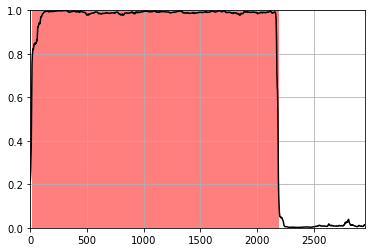

ENST00000215659
recall: 0.9972527623176575
iou: 0.9972527623176575
[(174, 1278), (1129, 1306), (1190, 1355), (1505, 1598)]


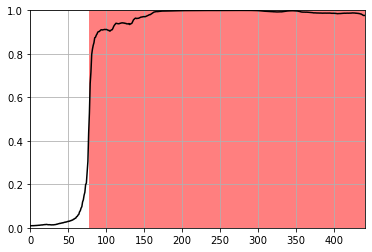

ENST00000210060
recall: 0.9864253401756287
iou: 0.9864253401756287
[(114, 1224), (988, 1270)]


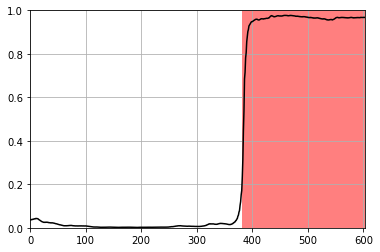

ENST00000194672
recall: 0.8766114115715027
iou: 0.8733944892883301
[(44, 488), (399, 3948), (938, 1034), (1090, 1183), (2581, 2737), (2893, 3040), (4062, 4200), (4126, 4351), (4406, 4520), (4548, 4647), (4947, 5079)]


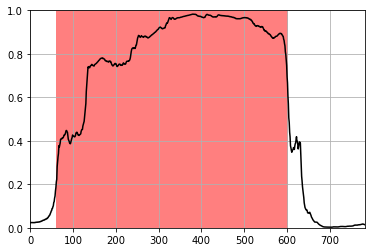

ENST00000215743
recall: 0.9615384340286255
iou: 0.9615384340286255
[(22, 1489), (146, 290), (512, 719), (764, 854), (860, 1172), (1184, 1277), (1554, 1803), (1585, 1723), (1748, 1856), (1807, 2179), (2070, 2232)]


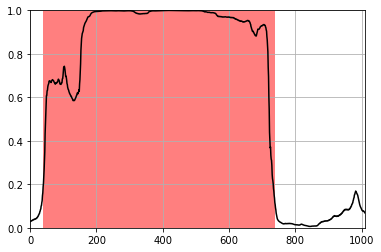

ENST00000216336
recall: 0.9163545370101929
iou: 0.9163545370101929
[(27, 795), (170, 329), (238, 370), (652, 742)]


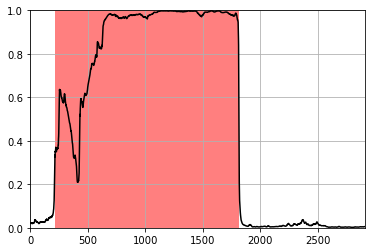

ENST00000210444
recall: 0.9947368502616882
iou: 0.8590909242630005
[(77, 1157), (351, 453)]


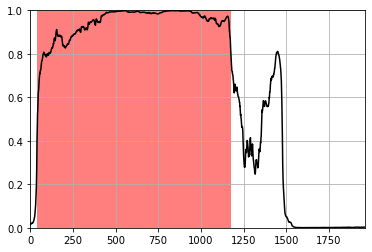

ENST00000215770
recall: 1.0
iou: 0.9954545497894287
[(27, 432), (470, 593), (589, 847), (856, 1231)]


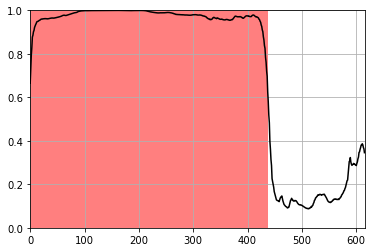

ENST00000214869
recall: 0.9954545497894287
iou: 0.9954545497894287
[(21, 705), (289, 391), (409, 763), (713, 842), (759, 960), (838, 1006), (990, 1191), (1171, 1276), (1247, 1493)]


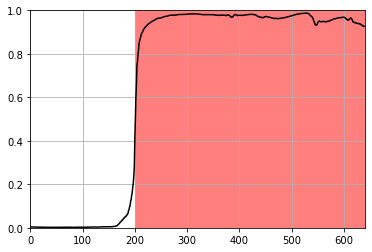

ENST00000216099
recall: 0.9986928105354309
iou: 0.94437575340271
[(393, 1554), (877, 985), (1177, 1324), (1600, 1792), (1887, 2034)]


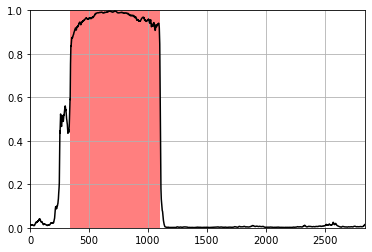

ENST00000216083
recall: 0.9993815422058105
iou: 0.9969154596328735
[(26, 1211), (118, 220), (1346, 1547), (1628, 1784), (1795, 1888), (2235, 2742)]


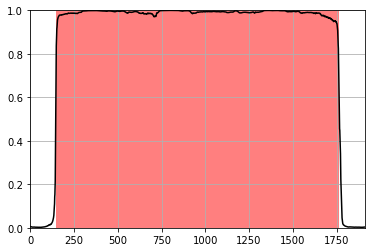

ENST00000216121
recall: 1.0
iou: 0.9319148659706116
[(31, 886), (146, 269), (284, 449), (345, 468), (885, 996), (1129, 1234), (1475, 1697), (1705, 1819)]


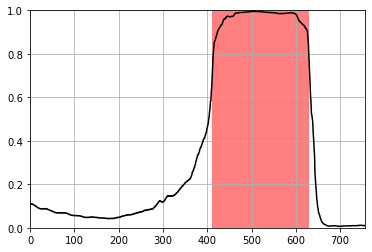

ENST00000204549
recall: 1.0
iou: 0.9675173759460449
[(27, 1485), (430, 601), (718, 865), (1273, 1534), (1589, 1694), (1849, 1987), (1965, 2100), (2087, 2216), (2696, 2804)]


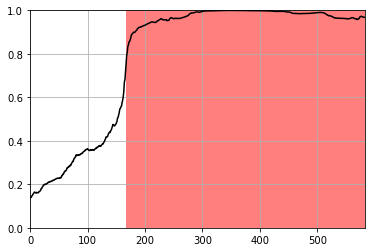

ENST00000215941
recall: 0.9942857027053833
iou: 0.9942857027053833
[(96, 999), (451, 703), (1128, 1404), (1144, 1474), (1888, 2035)]


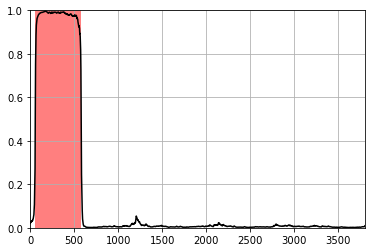

ENST00000216252
recall: 1.0
iou: 0.9856828451156616
[(39, 372), (241, 490), (428, 542), (610, 724), (750, 888)]


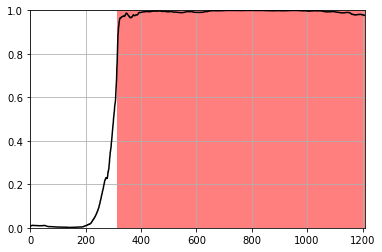

ENST00000216218
recall: 0.7640625238418579
iou: 0.7640625238418579
[(99, 1209), (880, 1165), (1263, 1410), (1990, 2083), (2924, 3101)]


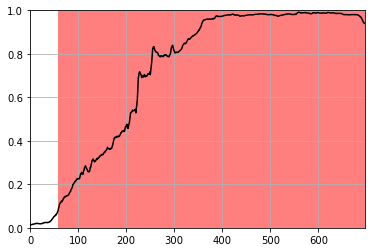

ENST00000216085
recall: 1.0
iou: 1.0
[(83, 173), (428, 1589), (699, 894), (960, 1062), (1305, 1539), (1378, 1528), (1542, 1653), (1643, 1742)]


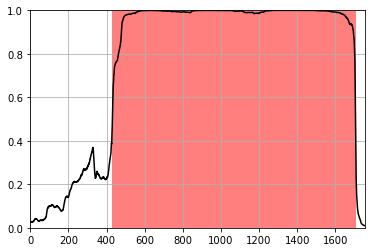

ENST00000216101
recall: 0.9960598945617676
iou: 0.9944925308227539
[(451, 1063), (1294, 1411)]


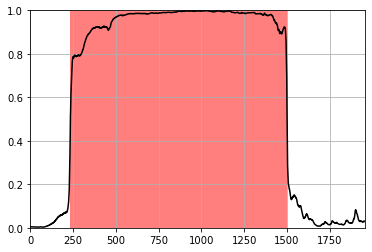

ENST00000216756
recall: 0.9618055820465088
iou: 0.899350643157959
[(39, 678), (418, 526), (818, 947)]


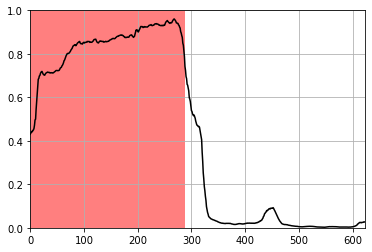

ENST00000215574
recall: 1.0
iou: 0.8073770403862
[(172, 883), (1021, 1153)]


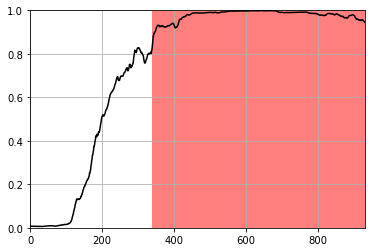

ENST00000203001
recall: 0.9876922965049744
iou: 0.9876922965049744
[(128, 1622), (891, 1203), (1685, 1829), (1973, 2069), (2053, 2155), (2329, 2560), (2337, 2511)]


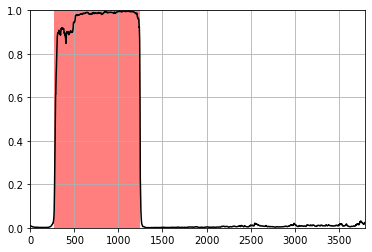

ENST00000216133
recall: 1.0
iou: 0.5540540814399719
[(236, 992), (337, 445), (1187, 1346), (1630, 1777), (1827, 2046), (2224, 2398), (2694, 2814), (2838, 3021), (3046, 3316), (3243, 3357), (3691, 3886)]


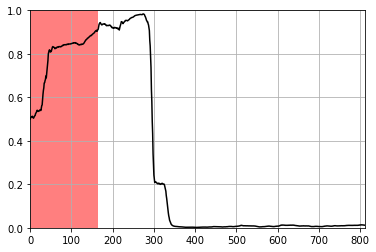

ENST00000201031
recall: 0.9946848750114441
iou: 0.9946848750114441
[(239, 1592), (261, 648), (660, 840), (1003, 1165), (1011, 1101), (1266, 1425), (2349, 2478)]


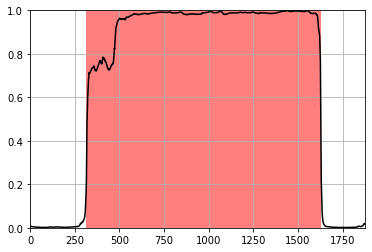

ENST00000216554
recall: 1.0
iou: 0.9991071224212646
[(211, 505), (441, 1737), (643, 796), (949, 1120), (1129, 1258), (1297, 1408), (1808, 1940), (1896, 2064), (2119, 2239), (3842, 4040), (4984, 5101), (5094, 5292), (5291, 5387)]


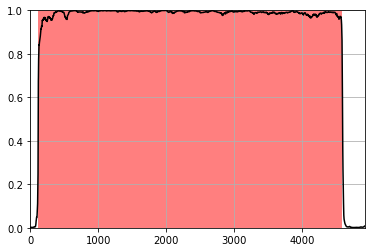

ENST00000216330
recall: 0.9865319728851318
iou: 0.9734219312667847
[(97, 217), (411, 1086), (556, 646), (796, 898), (1540, 1678)]


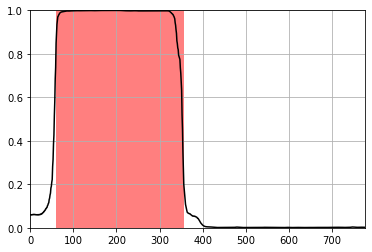

ENST00000216200
recall: 0.9977293610572815
iou: 0.9968239665031433
[(56, 389)]


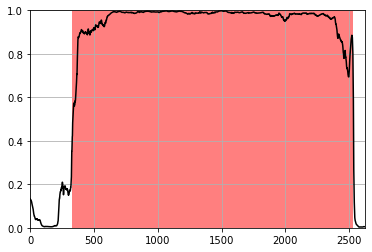

ENST00000216629
recall: 0.999222993850708
iou: 0.9984471797943115
[(220, 1282), (284, 380)]


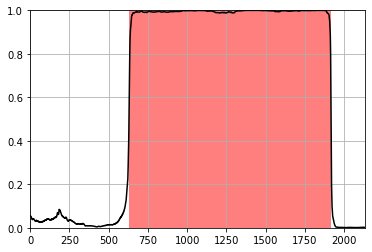

ENST00000216341
recall: 0.9087947607040405
iou: 0.9058441519737244
[(30, 774), (452, 557)]


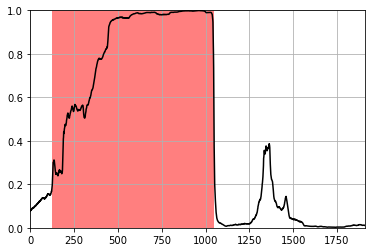

ENST00000215637
recall: 0.9930025339126587
iou: 0.9483596682548523
[(14, 1163), (1277, 1427)]


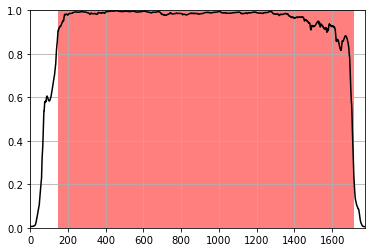

ENST00000215829
recall: 0.9956140518188477
iou: 0.8910696506500244
[(91, 472), (592, 694), (1210, 1327), (3034, 3163), (3236, 3398)]


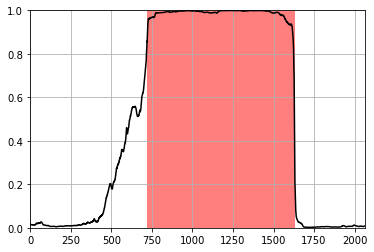

ENST00000216075
recall: 0.9897292256355286
iou: 0.9888059496879578
[(39, 897), (85, 253), (331, 643)]


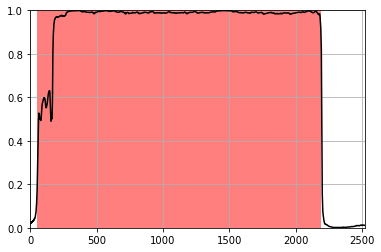

ENST00000215838
recall: 1.0
iou: 0.7917181849479675
[(158, 1442), (321, 414), (432, 777), (955, 1066), (1561, 1720), (1610, 1874), (1719, 1965)]


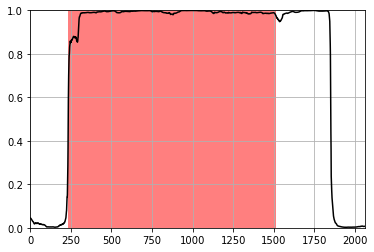

ENST00000207457
recall: 0.9970046877861023
iou: 0.9970046877861023
[(108, 1401), (187, 355), (511, 658)]


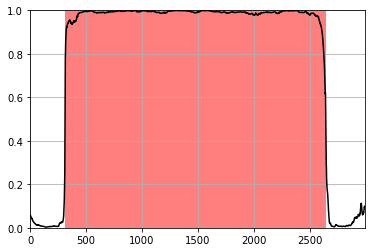

ENST00000201961
recall: 0.997574508190155
iou: 0.9805858135223389
[(220, 748), (347, 455), (509, 599)]


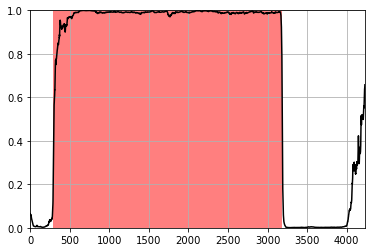

ENST00000211314
recall: 0.9858906269073486
iou: 0.9858906269073486
[(149, 449), (477, 582), (667, 757), (674, 782), (744, 846), (808, 949)]


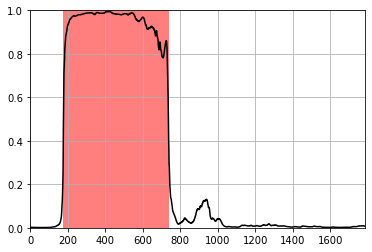

ENST00000216027
recall: 1.0
iou: 0.9983941912651062
[(57, 765), (142, 430), (859, 961)]


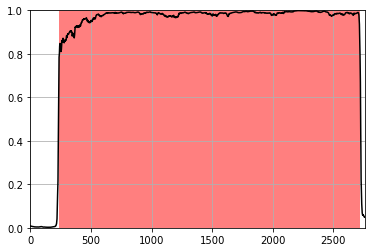

ENST00000216492
recall: 0.996802568435669
iou: 0.9960063695907593
[(210, 1584), (592, 862), (1042, 1267), (1660, 1813)]


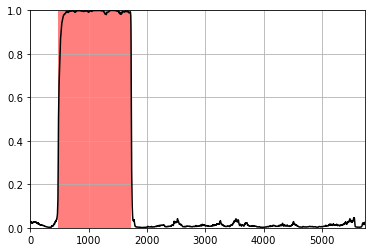

ENST00000216180
recall: 0.9980952143669128
iou: 0.9961977005004883
[(107, 1553), (474, 615), (636, 894), (817, 922), (1228, 1372), (1840, 1933), (1925, 2045)]


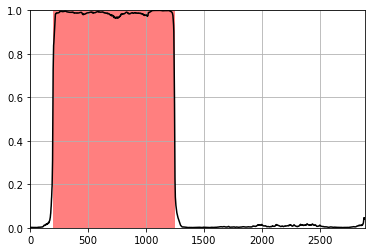

ENST00000215061
recall: 1.0
iou: 0.1289592832326889
[(22, 817), (374, 491), (515, 614), (779, 1088), (829, 1018)]


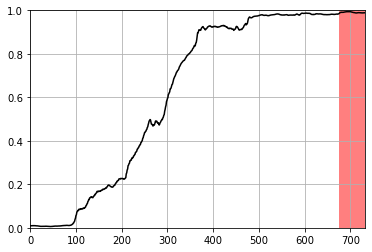

ENST00000215570
recall: 1.0
iou: 0.9895470142364502
[(53, 341), (406, 601), (1072, 1255)]


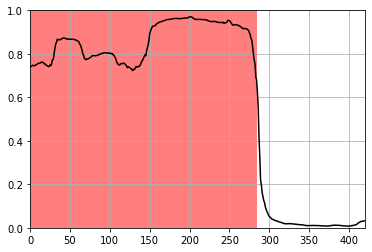

ENST00000215882
recall: 0.997184693813324
iou: 0.9960629940032959
[(63, 999), (295, 508), (1149, 1272)]


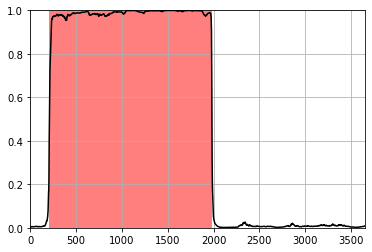

ENST00000216500
recall: 1.0
iou: 0.8878504633903503
[(241, 460), (456, 1476), (808, 931), (1429, 1588), (1904, 2054)]


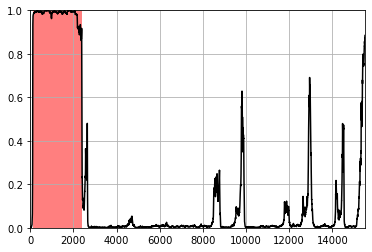

ENST00000211377
recall: 0.999643087387085
iou: 0.9992864727973938
[(260, 500), (685, 1756), (1283, 1478), (1990, 2245), (2365, 2485), (2657, 2756)]


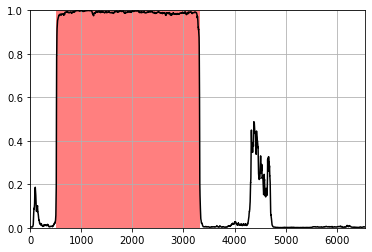

ENST00000200457
recall: 0.996757447719574
iou: 0.996757447719574
[(111, 1542), (964, 1330), (1028, 1277)]


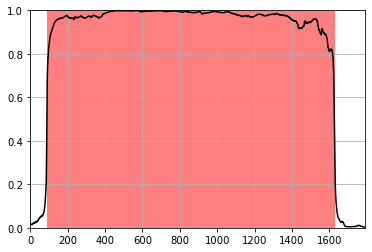

ENST00000216602
recall: 0.9961240291595459
iou: 0.9961240291595459
[(112, 871), (560, 755)]


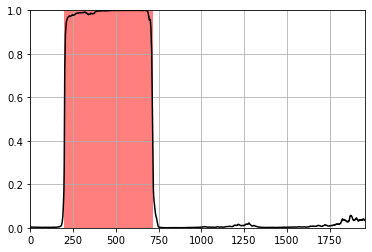

ENST00000201586
recall: 1.0
iou: 0.39039039611816406
[(81, 1179), (127, 310)]


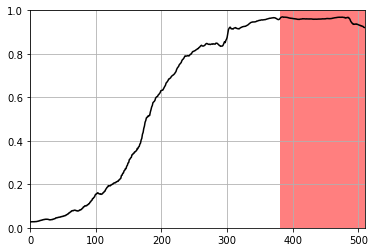

ENST00000215565
recall: 1.0
iou: 0.9981096386909485
[(66, 480), (100, 205)]


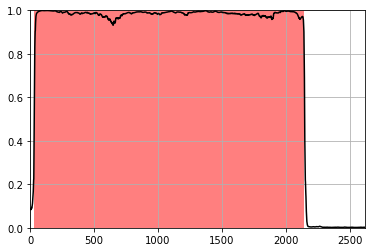

ENST00000209875
recall: 0.9992389678955078
iou: 0.8944141864776611
[(157, 733), (452, 566), (680, 1058), (1174, 1378), (1559, 1730), (1841, 2063), (2155, 2302), (2517, 2625), (3770, 3869), (3792, 3936), (4066, 4159), (4262, 4562), (4754, 4907), (4789, 4888), (5393, 5483), (5743, 5845), (5896, 6031), (6036, 6255), (6230, 6338), (6374, 6593), (6595, 6736), (7189, 7321), (7576, 7690), (8020, 8179), (8247, 8433), (8312, 8417), (9265, 9367), (9403, 9499), (9959, 10232), (10254, 10386), (10393, 10618), (10505, 10610), (10952, 11042), (11074, 11221)]


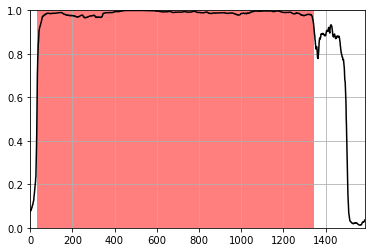

ENST00000199280
recall: 0.990867555141449
iou: 0.990867555141449
[(94, 910), (689, 806), (1365, 1566), (1411, 1543), (1689, 1779), (1803, 1950), (1999, 2233), (2034, 2151), (2229, 2331), (2428, 2674), (2444, 2567), (2947, 3043), (3125, 3320), (3319, 3466), (3615, 3951), (3661, 3832), (3806, 3908), (3979, 4072), (4034, 4151)]


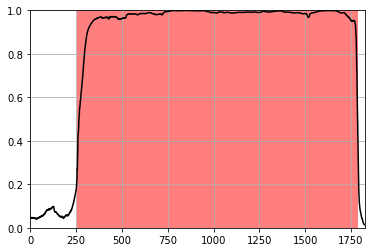

ENST00000216036
recall: 0.9485419988632202
iou: 0.946107804775238
[(94, 1141), (446, 545), (558, 741), (965, 1166)]


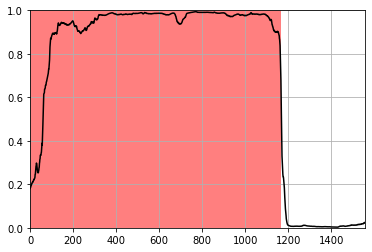

ENST00000209540
recall: 0.987522304058075
iou: 0.9840142130851746
[(17, 1154), (210, 333)]


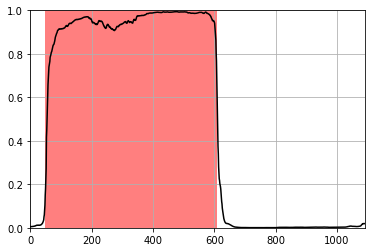

ENST00000216517
recall: 0.9976744055747986
iou: 0.9976744055747986
[(183, 330), (278, 1586), (334, 487), (762, 888), (900, 1047)]


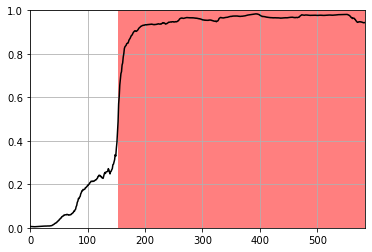

ENST00000216117
recall: 1.0
iou: 0.9972375631332397
[(78, 945), (250, 424), (745, 928), (884, 1265), (934, 1153), (1292, 1442), (1342, 1516)]


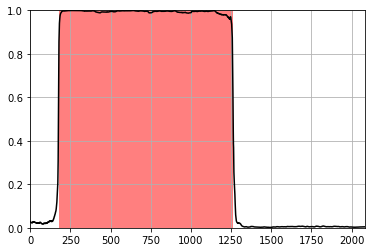

ENST00000216455
recall: 0.99895179271698
iou: 0.9764344096183777
[(78, 846)]


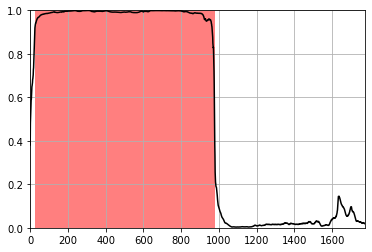

ENST00000203664
recall: 0.9559082984924316
iou: 0.857594907283783
[(198, 903), (340, 526), (1055, 1238), (1218, 1467), (1781, 2000), (1900, 1996), (2132, 2264), (2455, 2713), (2965, 3088), (3084, 3429), (3283, 3388), (3666, 3807)]


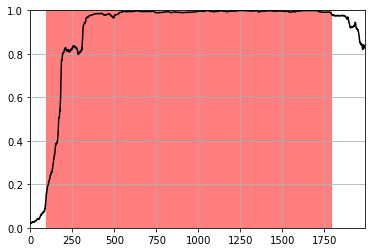

ENST00000204566
recall: 1.0
iou: 0.9970291256904602
[(274, 1201), (347, 473), (1076, 1250), (1499, 1715), (1575, 1740)]


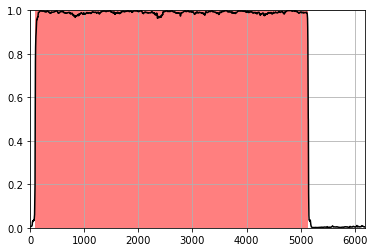

ENST00000215375
recall: 0.9674267172813416
iou: 0.9674267172813416
[(100, 607), (164, 290)]


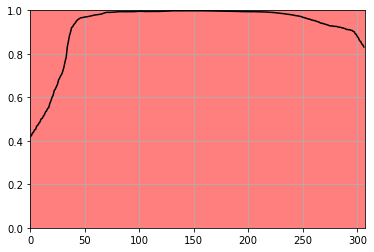

ENST00000216442
recall: 0.9975062608718872
iou: 0.9975062608718872
[(106, 850), (614, 713), (1035, 1377), (1268, 1394)]


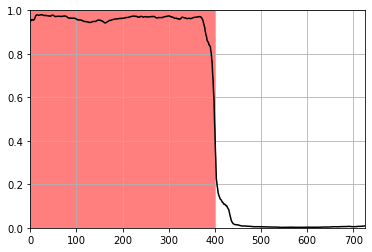

ENST00000215115
recall: 0.9870370626449585
iou: 0.9870370626449585
[(133, 787), (222, 411), (410, 590)]


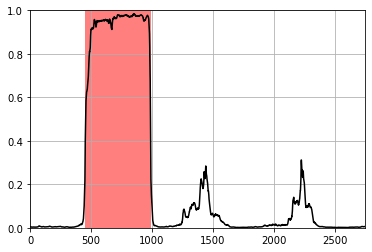

ENST00000200676
recall: 0.9986518621444702
iou: 0.9986518621444702
[(30, 1512), (250, 373), (376, 469), (496, 607), (799, 910), (1532, 1658)]


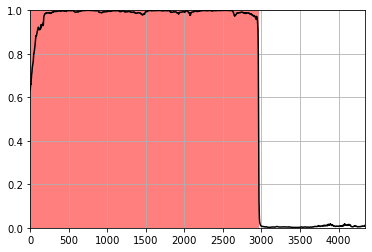

ENST00000216416
recall: 0.9312376976013184
iou: 0.9312376976013184
[(47, 482), (403, 607), (964, 1084), (1678, 1810), (1935, 2025), (2024, 2138), (2301, 2472), (2661, 2796), (2938, 3079), (3470, 3593), (3764, 3884), (4008, 4146)]


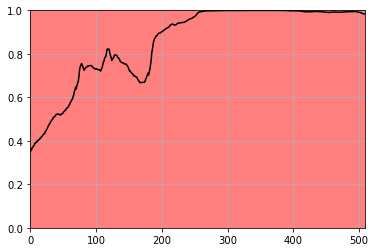

ENST00000216115
recall: 1.0
iou: 0.687417209148407
[(61, 544)]


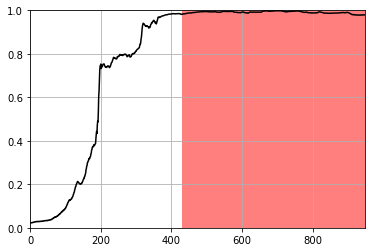

ENST00000216446
recall: 0.9985315799713135
iou: 0.9985315799713135
[(106, 1168), (947, 1079)]


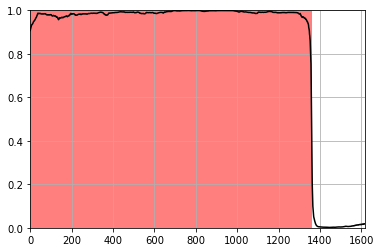

ENST00000216014
recall: 1.0
iou: 0.9284671545028687
[(138, 783), (373, 550), (818, 965), (1070, 1175)]


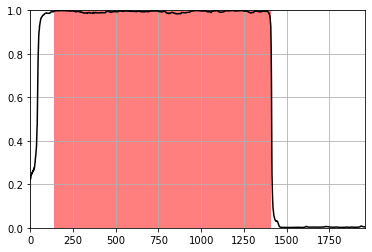

ENST00000198536
recall: 1.0
iou: 0.994997501373291
[(170, 1082), (960, 1074)]


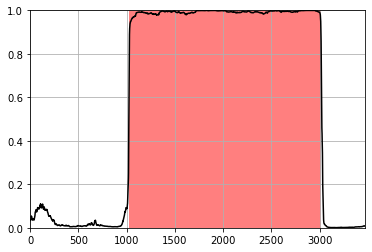

ENST00000191018
recall: 0.0
iou: 0.0
[(85, 1528), (449, 608), (701, 857), (849, 954), (917, 1184)]


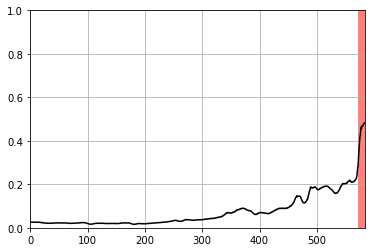

ENST00000215754
recall: 1.0
iou: 0.9983525276184082
[(92, 440)]


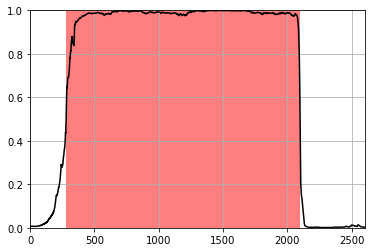

ENST00000216378
recall: 0.9861111044883728
iou: 0.9659863710403442
[(645, 1476), (658, 781), (1198, 1288), (1567, 1669), (1715, 1886), (1887, 1998)]


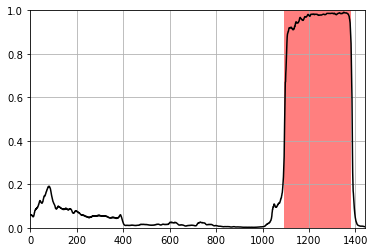

ENST00000191063
recall: 0.9873417615890503
iou: 0.9750000238418579
[(552, 1467), (1228, 1351)]


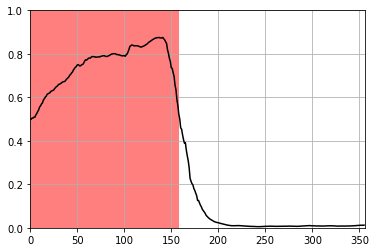

ENST00000215781
recall: 0.9970104694366455
iou: 0.9970104694366455
[(52, 811), (599, 737), (1251, 1344), (1360, 1510), (1556, 1703)]


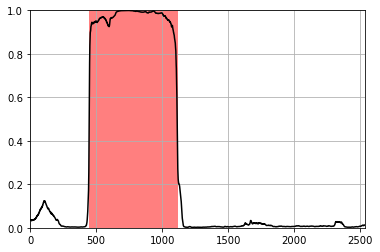

ENST00000211122
recall: 0.9941860437393188
iou: 0.9941860437393188
[(79, 748)]


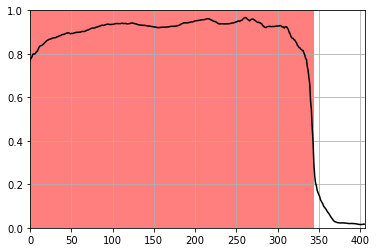

ENST00000206446
recall: 0.7213930487632751
iou: 0.7178217768669128
[(212, 623)]


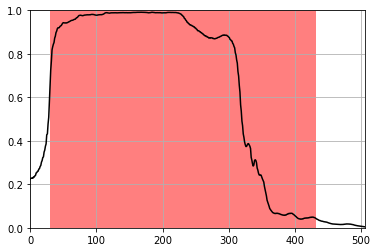

ENST00000206513
recall: 0.9930555820465088
iou: 0.3854447305202484
[(164, 1010)]


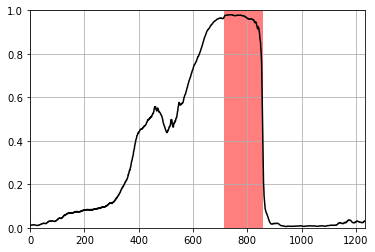

ENST00000199706
recall: 0.9990088939666748
iou: 0.9990088939666748
[(47, 818), (183, 351), (952, 1231)]


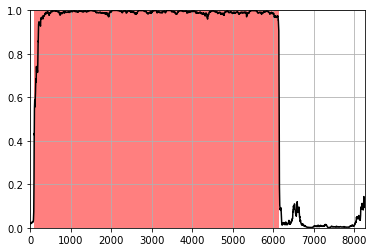

ENST00000216568
recall: 0.998834490776062
iou: 0.9918981194496155
[(323, 425), (327, 1224), (931, 1159), (1145, 1259), (1653, 1770), (1666, 1936), (2009, 2138), (2458, 2560), (2505, 2682)]


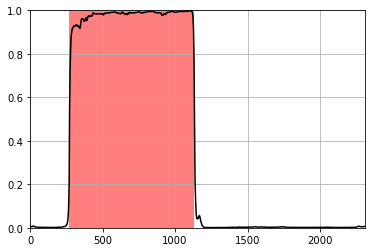

ENST00000215567
recall: 0.9895178079605103
iou: 0.9895178079605103
[(103, 1030), (440, 686)]


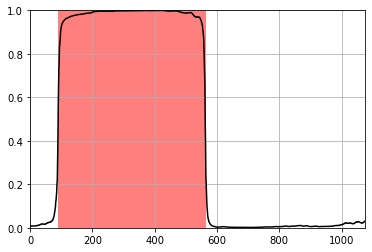

ENST00000199936
recall: 0.9102563858032227
iou: 0.9102563858032227
[(13, 151), (172, 1336), (198, 444), (515, 608), (1151, 1304)]


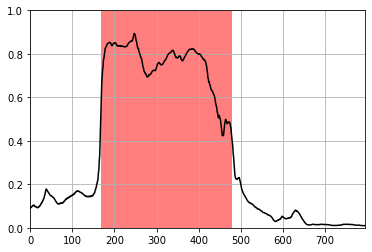

ENST00000216327
recall: 0.9791666865348816
iou: 0.9791666865348816
[(7, 457), (95, 185), (198, 291)]


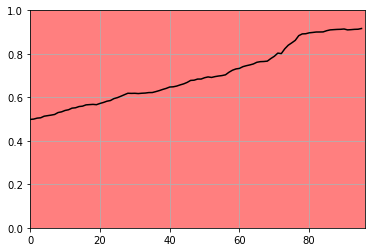

ENST00000215798
recall: 0.9988465905189514
iou: 0.9988465905189514
[(97, 1030), (110, 293), (368, 467), (497, 743), (510, 690), (1026, 1359), (1055, 1172)]


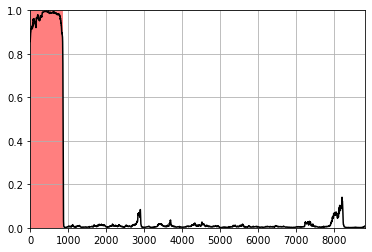

ENST00000203630
recall: 0.9959431886672974
iou: 0.9959431886672974
[(231, 978), (364, 478), (574, 1084), (1289, 1382)]


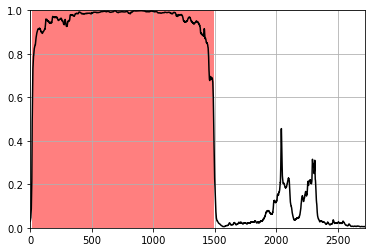

ENST00000216366
recall: 1.0
iou: 0.9941520690917969
[(71, 470), (255, 345), (345, 444), (492, 600), (508, 730), (871, 1051), (977, 1124), (1435, 1579), (1613, 1739)]


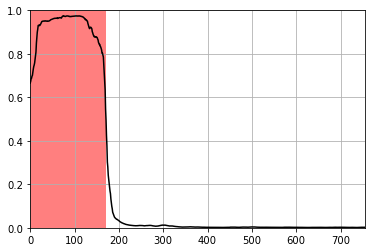

ENST00000216410
recall: 1.0
iou: 0.9981096386909485
[(194, 749), (204, 318), (780, 996), (1981, 2137), (3135, 3291), (3489, 3606), (3554, 3656)]


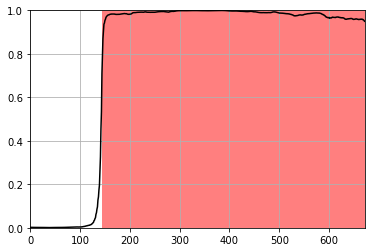

ENST00000216259
recall: 1.0
iou: 0.9930459260940552
[(35, 824), (234, 360), (900, 1206), (950, 1148)]


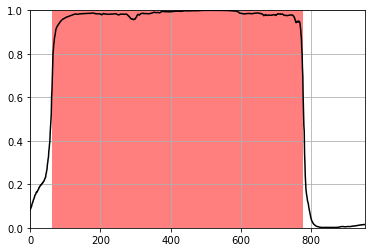

ENST00000215886
recall: 1.0
iou: 1.0
[(23, 134), (182, 581)]


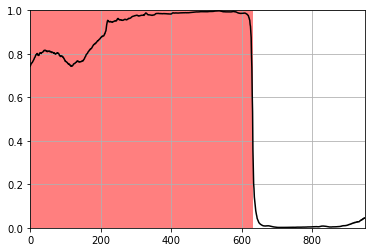

ENST00000215912
recall: 1.0
iou: 0.9955157041549683
[(144, 936), (202, 592), (754, 1030), (1475, 1580), (2198, 2363)]


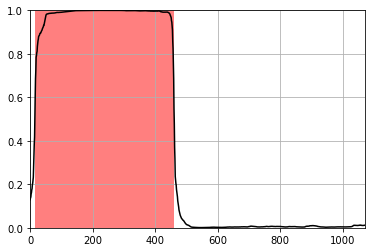

ENST00000216639
recall: 0.999143123626709
iou: 0.9872989058494568
[(71, 1262), (663, 825), (1528, 1636)]


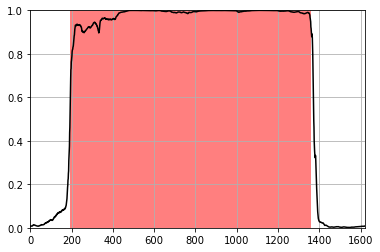

ENST00000209665
recall: 0.980997622013092
iou: 0.9779005646705627
[(241, 1402), (581, 701), (815, 983), (2008, 2191)]


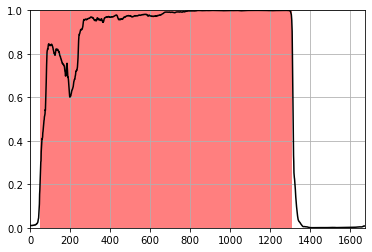

ENST00000216714
recall: 0.9961240291595459
iou: 0.8741496801376343
[(237, 1194), (280, 481), (871, 1048), (1051, 1186)]


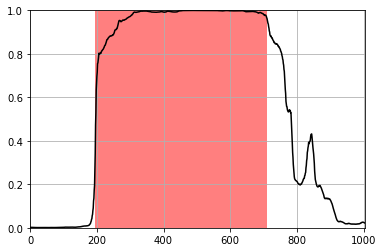

ENST00000215555
recall: 1.0
iou: 0.9764878749847412
[(168, 909), (298, 547), (909, 1035), (1132, 1237), (1185, 1317)]


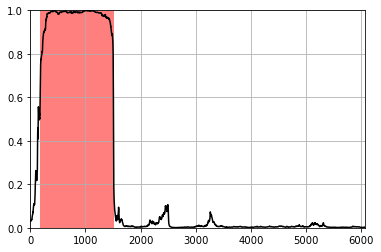

ENST00000198801
recall: 0.993565022945404
iou: 0.993565022945404
[(51, 1056), (208, 301), (379, 469), (736, 871), (1352, 1472), (1485, 1584), (1528, 1828), (1646, 1760), (1957, 2119), (2193, 2403), (2243, 2417), (2433, 2721)]


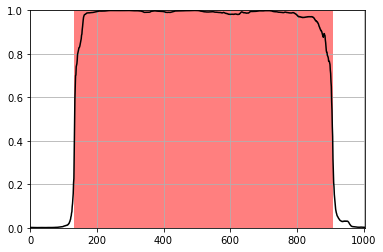

ENST00000216452
recall: 1.0
iou: 0.9982978701591492
[(65, 632), (72, 255), (744, 897), (931, 1033), (1078, 1207), (1232, 1385)]


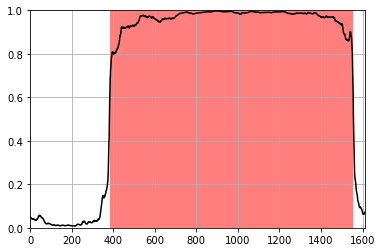

ENST00000211413
recall: 0.8983050584793091
iou: 0.8983050584793091
[(112, 1033), (173, 290), (1107, 1542), (1780, 1888)]


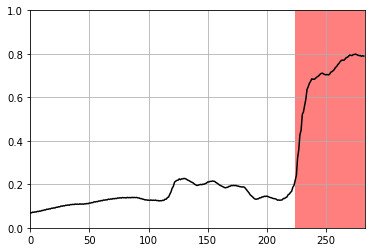

ENST00000193322
recall: 0.9888142943382263
iou: 0.9866071343421936
[(90, 1095), (1500, 1650), (2085, 2187), (2721, 2856), (3144, 3240), (3388, 3508), (3804, 3903), (4096, 4210)]


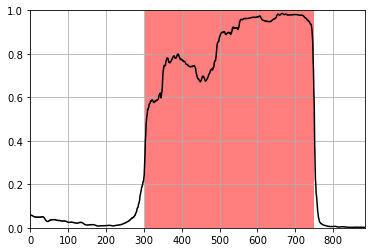

ENST00000215980
recall: 1.0
iou: 0.9830220937728882
[(76, 619), (335, 431), (688, 862)]


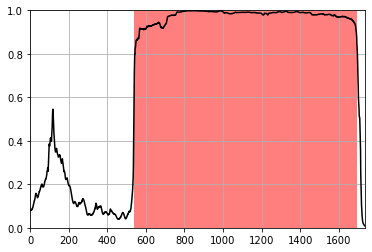

ENST00000216071
recall: 1.0
iou: 1.0
[(39, 912), (130, 235), (317, 446), (529, 649), (655, 898)]


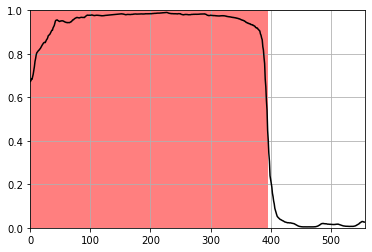

ENST00000194530
recall: 0.9978141784667969
iou: 0.9967249035835266
[(294, 1551), (391, 481), (1883, 2063)]


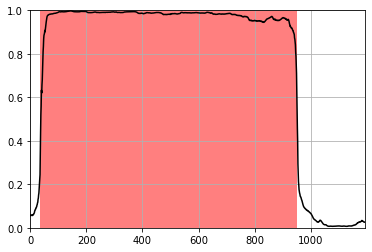

ENST00000216146
recall: 0.8461538553237915
iou: 0.4950000047683716
[(26, 1238), (360, 486)]


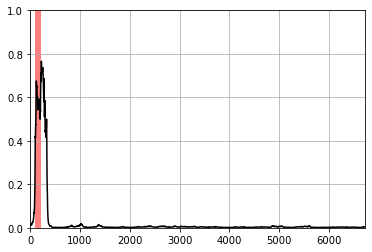

ENST00000216445
recall: 1.0
iou: 0.9981818199157715
[(142, 1033), (347, 479), (665, 761), (884, 980), (1168, 1390), (1446, 1551), (1627, 1717), (1707, 1818), (1747, 1855), (1892, 2024), (2742, 2877), (2974, 3079)]


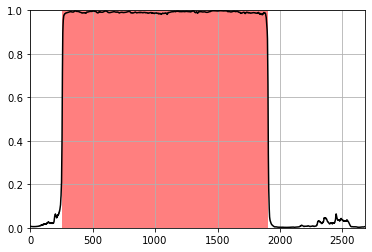

ENST00000202917
recall: 1.0
iou: 0.9685534834861755
[(78, 1281), (1138, 1459)]


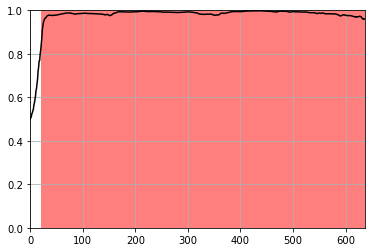

ENST00000215730
recall: 0.9867149591445923
iou: 0.9867149591445923
[(104, 881), (1202, 1637), (1497, 1692), (1723, 1837), (2042, 2195), (2216, 2336), (2381, 2474), (2663, 2813), (2957, 3065), (3274, 3433), (3538, 3640), (3720, 3828)]


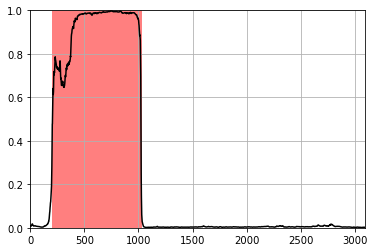

ENST00000209668
recall: 0.9967213273048401
iou: 0.9967213273048401
[(71, 1199), (447, 546), (612, 837), (1250, 1349)]


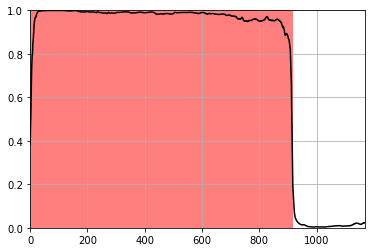

ENST00000215812
recall: 1.0
iou: 0.9983165264129639
[(59, 1262), (132, 297), (330, 435), (1062, 1293), (1389, 1524), (1578, 1956), (1754, 1868)]


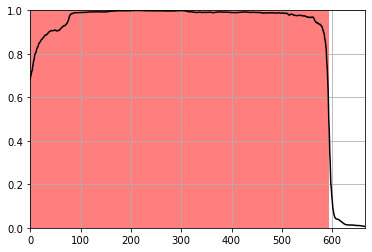

ENST00000216465
recall: 1.0
iou: 0.795918345451355
[(133, 784), (183, 276), (647, 776), (874, 970), (1037, 1172)]


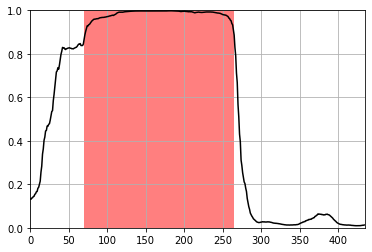

ENST00000215906
recall: 0.9992082118988037
iou: 0.9992082118988037
[(366, 486), (451, 1561), (740, 1112), (1352, 1817), (1557, 1734), (1651, 1921), (2428, 2722), (2579, 2696), (2670, 2793), (2744, 2858), (2928, 3072), (3236, 3362)]


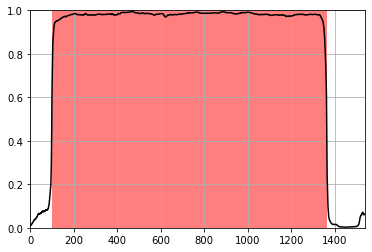

ENST00000202834
recall: 0.6934865713119507
iou: 0.3851063847541809
[(70, 202), (158, 521), (462, 597), (961, 1090)]


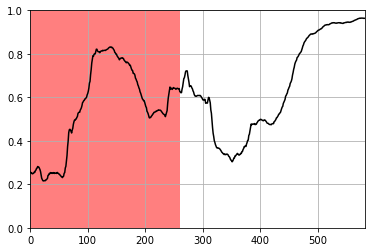

ENST00000205194
recall: 0.9997782111167908
iou: 0.9991135001182556
[(119, 740), (471, 717), (951, 1050), (1049, 1142), (1182, 1344)]


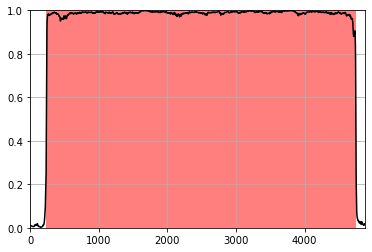

ENST00000216037
recall: 1.0
iou: 0.9909348487854004
[(73, 859), (636, 1230), (725, 851), (1021, 1171)]


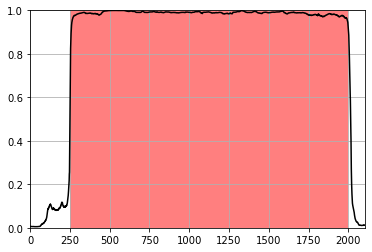

ENST00000202967
recall: 1.0
iou: 0.9757785201072693
[(59, 1004), (303, 393), (544, 643), (648, 741)]


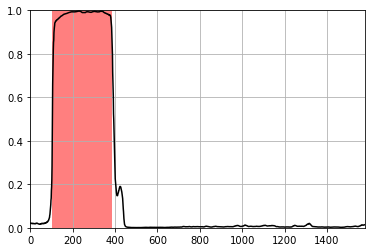

ENST00000199708
recall: 0.9529914259910583
iou: 0.6160221099853516
[(28, 457)]


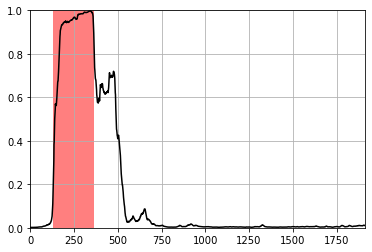

ENST00000216540
recall: 0.9728997349739075
iou: 0.9547872543334961
[(86, 1136), (798, 957), (1092, 1200), (1539, 1629)]


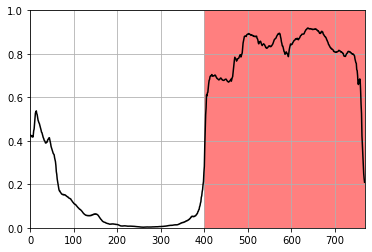

ENST00000215917
recall: 1.0
iou: 0.9942085146903992
[(14, 1034), (723, 831), (1513, 1615), (1777, 1906), (1970, 2114), (2534, 2627), (2936, 3038), (3187, 3361), (3290, 3389), (3526, 3634), (3815, 3947)]


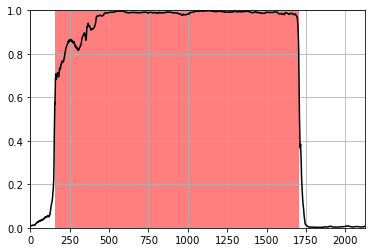

ENST00000215956
recall: 0.994727611541748
iou: 0.994727611541748
[(264, 651), (307, 430), (493, 601)]


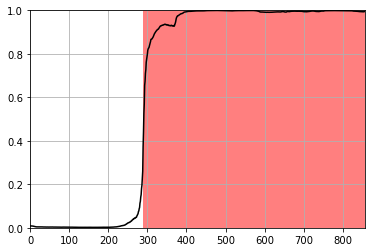

ENST00000204517
recall: 1.0
iou: 0.9965397715568542
[(277, 1294), (1022, 1172)]


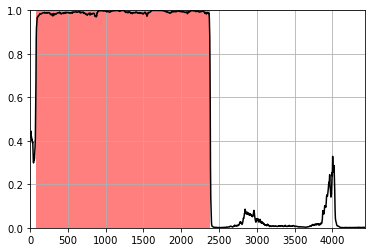

ENST00000215531
recall: 0.9959839582443237
iou: 0.9959839582443237
[(62, 455), (426, 546), (542, 662), (793, 1144), (962, 1076)]


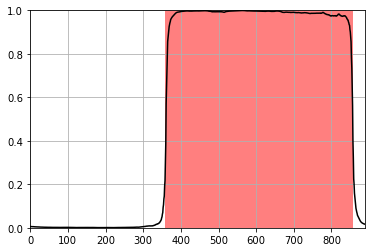

ENST00000216127
recall: 1.0
iou: 0.9913707971572876
[(679, 1480), (800, 1049), (1361, 1661), (1533, 1800), (2786, 2918), (3160, 3328)]


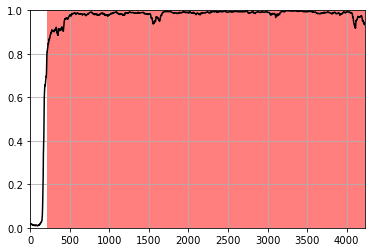

ENST00000207636
recall: 0.9883268475532532
iou: 0.9883268475532532
[(165, 765), (761, 887), (781, 1039)]


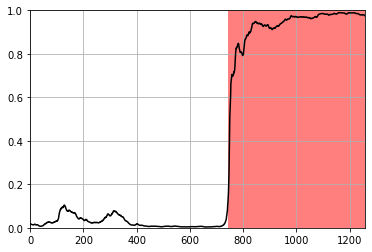

ENST00000215855
recall: 1.0
iou: 0.9946004152297974
[(72, 708)]


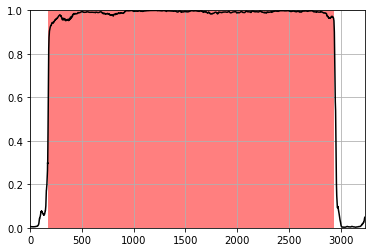

ENST00000215095
recall: 0.9813519716262817
iou: 0.9767981171607971
[(242, 1109), (285, 402), (816, 909), (1340, 1457), (1353, 1620), (1750, 1879), (1764, 1854), (1926, 2175), (2014, 2140), (2375, 2789), (2725, 3148), (2810, 3023), (2916, 3051), (3241, 3547), (3285, 3432), (3880, 4177), (3969, 4116), (4025, 4337)]


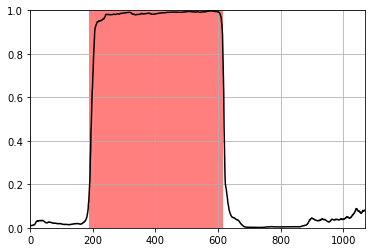

ENST00000216468
recall: 0.9991728663444519
iou: 0.9991728663444519
[(41, 1019), (762, 1059), (1313, 1406), (1462, 1600), (2283, 2376), (2961, 3105), (3366, 3477), (4751, 4850), (4877, 5030), (5056, 5221), (5338, 5557), (6153, 6261), (7036, 7180)]


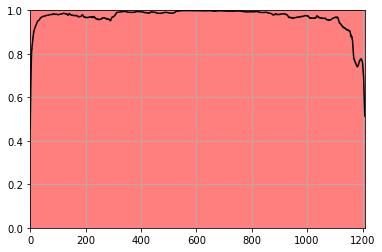

ENST00000196551
recall: 1.0
iou: 0.9967105388641357
[(72, 687), (205, 301)]


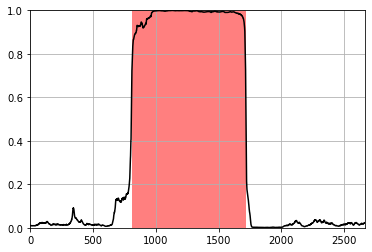

ENST00000216450
recall: 0.9986772537231445
iou: 0.9986772537231445
[(74, 185), (124, 727), (747, 1494), (1060, 1159)]


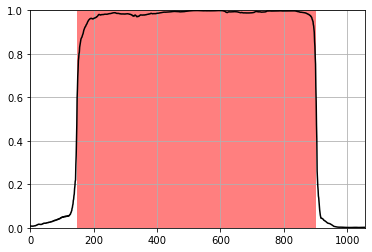

ENST00000215368
recall: 1.0
iou: 0.9983606338500977
[(296, 938), (492, 795), (1172, 1271), (1384, 1906), (2058, 2199)]


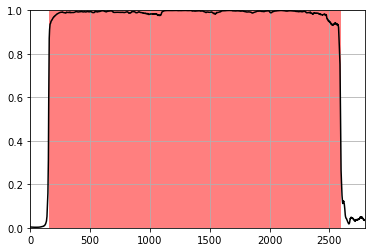

ENST00000216139
recall: 0.9948717951774597
iou: 0.9897959232330322
[(32, 1298), (108, 267), (402, 588)]


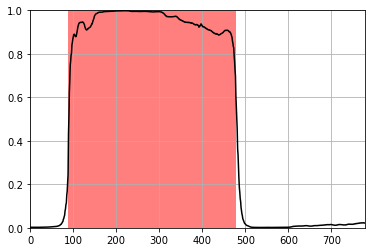

ENST00000206380
recall: 1.0
iou: 0.9566160440444946
[(11, 785), (777, 912), (1085, 1190), (1240, 1351)]


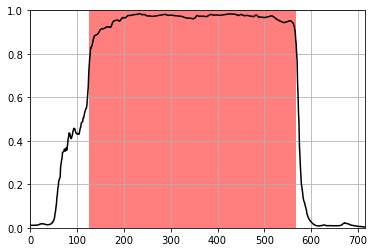

ENST00000200691
recall: 0.9987789988517761
iou: 0.9939246773719788
[(63, 270)]


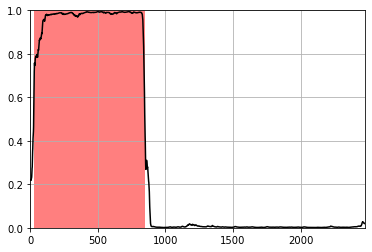

ENST00000211372
recall: 0.9969419240951538
iou: 0.9969419240951538
[(110, 569)]


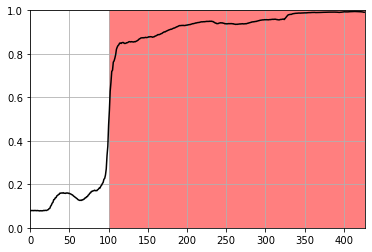

ENST00000200639
recall: 0.9979959726333618
iou: 0.8962207436561584
[(127, 1360), (569, 674), (680, 851), (1046, 1163), (1337, 1430), (1729, 1822), (1828, 1927), (2729, 2855), (3001, 3208), (3207, 3315), (3404, 3647), (3519, 3630), (4477, 4594), (4509, 4608), (5637, 5772), (6292, 6382), (6407, 6497)]


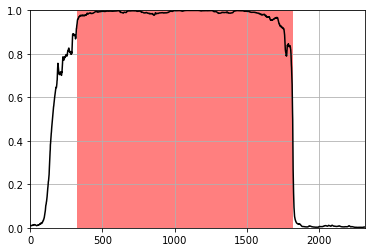

ENST00000216211
recall: 1.0
iou: 0.9928767085075378
[(65, 929), (255, 387), (453, 594)]


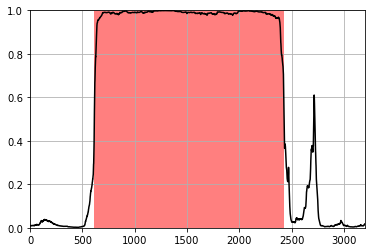

ENST00000216194
recall: 0.9987373948097229
iou: 0.9987373948097229
[(31, 1528), (50, 227), (1361, 1457)]


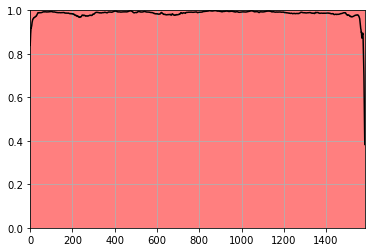

ENST00000216214
recall: 0.9928571581840515
iou: 0.9895586371421814
[(148, 424), (590, 863), (834, 1908), (1364, 1457), (1633, 1840), (1846, 1936), (1980, 2106), (2039, 2261), (3183, 3303)]


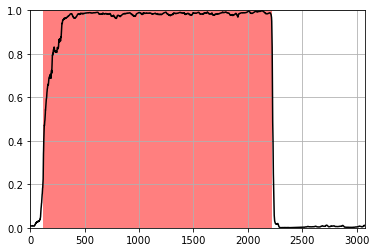

ENST00000205948
recall: 0.8691824078559875
iou: 0.8691824078559875
[(36, 1074), (385, 646), (632, 722)]


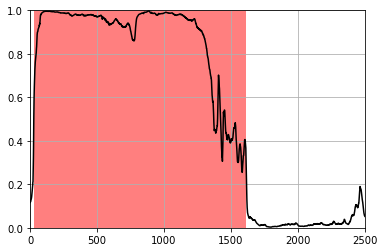

ENST00000216029
recall: 0.9951691031455994
iou: 0.9832935333251953
[(151, 532), (627, 921), (833, 980), (952, 1132)]


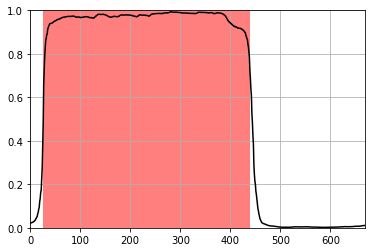

ENST00000216024
recall: 0.9264957308769226
iou: 0.9264957308769226
[(174, 1197), (1247, 1367), (1407, 1518)]


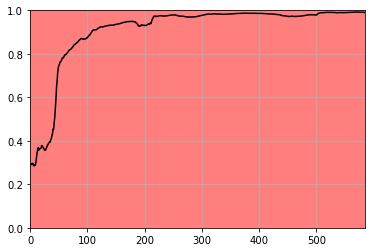

ENST00000210187
recall: 0.9990224838256836
iou: 0.9912706017494202
[(20, 146), (159, 930), (1282, 1414), (1298, 1439), (1485, 1626)]


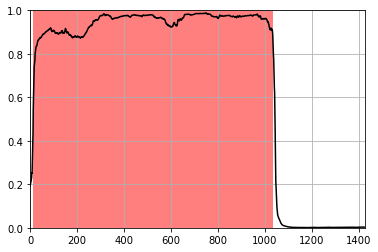

ENST00000192314
recall: 1.0
iou: 0.8433333039283752
[(134, 1331)]


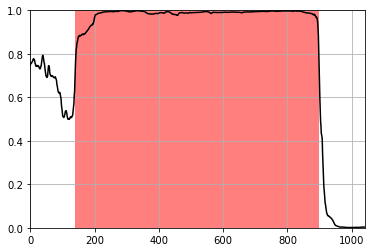

ENST00000199814
recall: 1.0
iou: 0.9981024861335754
[(77, 1340), (154, 283), (198, 309), (345, 585), (979, 1432), (1314, 1464), (1448, 1565), (1614, 1707), (1657, 1762), (2111, 2231), (2142, 2238)]


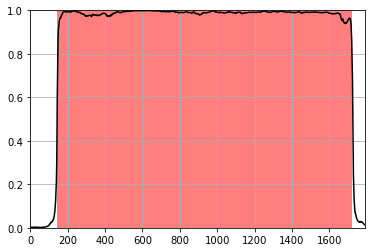

ENST00000216185
recall: 1.0
iou: 0.5150468945503235
[(77, 578), (273, 378), (846, 990)]


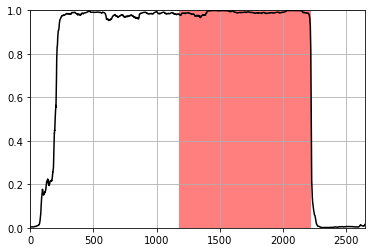

ENST00000215071
recall: 1.0
iou: 0.9915966391563416
[(31, 1084), (836, 929), (1372, 1462)]


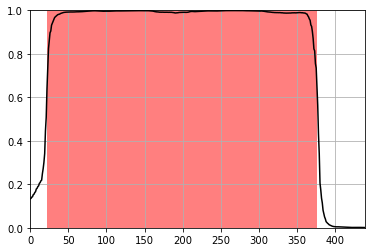

ENST00000216420
recall: 0.9992212057113647
iou: 0.9992212057113647
[(54, 1053), (155, 275), (436, 577), (721, 901), (1126, 1231), (1802, 1937)]


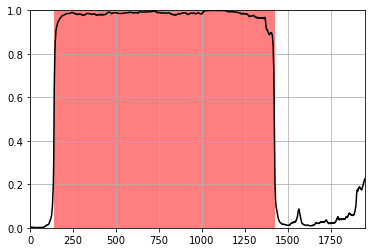

ENST00000216155
recall: 1.0
iou: 0.9978060722351074
[(62, 419)]


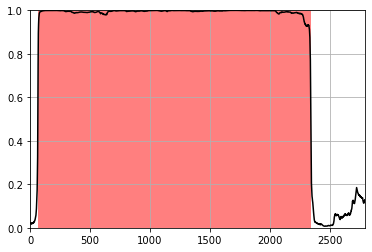

ENST00000206542
recall: 0.9729241728782654
iou: 0.9729241728782654
[(129, 1137), (190, 292)]


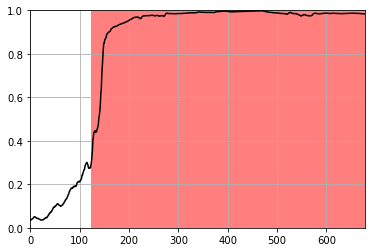

ENST00000216456
recall: 0.9861555099487305
iou: 0.9701414108276367
[(121, 256), (288, 429), (466, 982)]


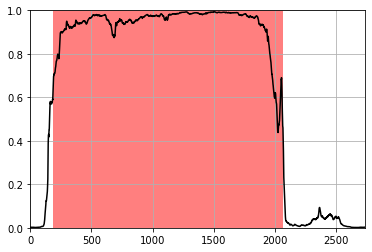

ENST00000216177
recall: 0.9728395342826843
iou: 0.7448015213012695
[(133, 1423), (159, 507), (810, 936), (968, 1088), (1095, 1392), (1581, 1824), (1670, 1829), (1825, 2083), (2114, 2264)]


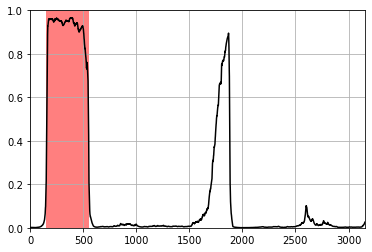

ENST00000215587
recall: 0.9969099760055542
iou: 0.9260854125022888
[(59, 674), (255, 390), (927, 1248), (1162, 1267)]


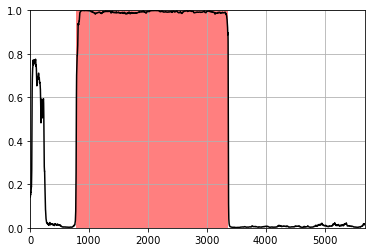

ENST00000215631
recall: 0.9690860509872437
iou: 0.9690860509872437
[(232, 715), (374, 743), (937, 1108), (1226, 1316)]


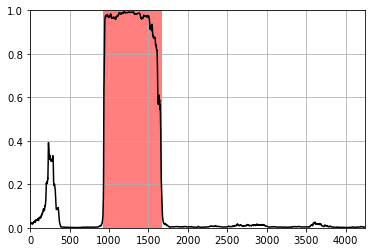

ENST00000216144
recall: 0.9732142686843872
iou: 0.9732142686843872
[(422, 1070), (570, 708), (933, 1065), (1081, 1492), (1097, 1277), (1668, 1881), (2131, 2437), (2222, 2345), (2639, 2801), (2682, 2844), (2843, 3014), (2967, 3252)]


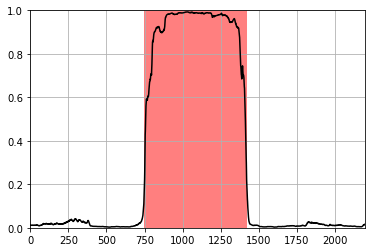

ENST00000216479
recall: 1.0
iou: 0.9814126491546631
[(97, 1114)]


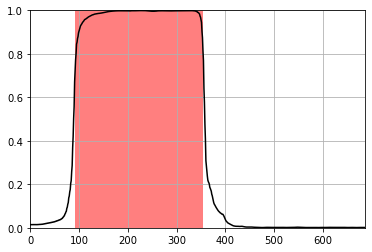

ENST00000204679
recall: 1.0
iou: 1.0
[(35, 953), (708, 813), (1372, 1543), (1412, 1556), (1560, 1776)]


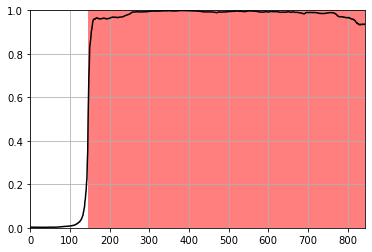

ENST00000201979
recall: 1.0
iou: 0.9830508232116699
[(83, 209), (298, 1195), (488, 1091), (1516, 1645)]


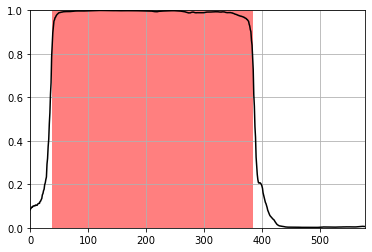

ENST00000216294
recall: 0.6773504018783569
iou: 0.6773504018783569
[(41, 1148), (1526, 1670), (2045, 2162), (2187, 2313), (2236, 2335)]


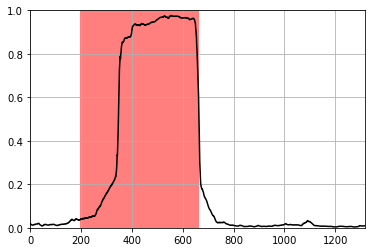

ENST00000203407
recall: 0.9976931810379028
iou: 0.8817533254623413
[(26, 1469), (252, 528), (795, 900), (927, 1116), (1284, 1569)]


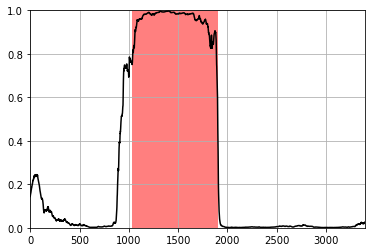

ENST00000206262
recall: 1.0
iou: 0.9881305694580078
[(184, 817), (209, 314), (980, 1079), (1014, 1167), (1307, 1412), (1411, 1558), (1601, 1733), (2254, 2374), (2757, 2850), (3017, 3179), (3400, 3526), (3681, 3774), (3891, 4047), (4907, 5030), (4995, 5166), (6655, 6772), (6789, 6942)]


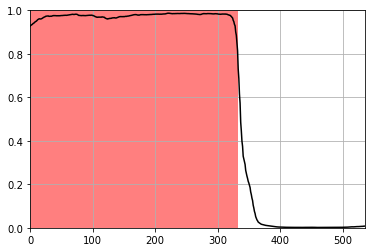

ENST00000206474
recall: 0.9895012974739075
iou: 0.9869109988212585
[(253, 1345), (896, 1016), (1455, 1560)]


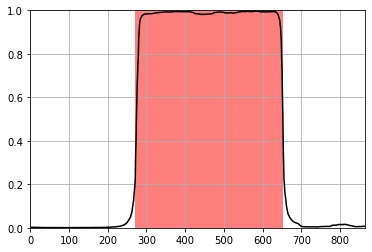

ENST00000215530
recall: 0.9990253448486328
iou: 0.9990253448486328
[(47, 560), (1117, 1261)]


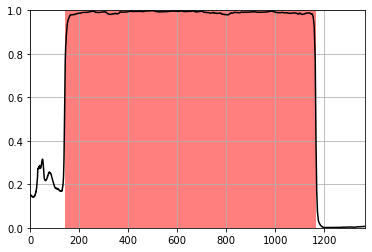

ENST00000215742
recall: 0.9990662932395935
iou: 0.9981343150138855
[(207, 1137), (637, 1018), (1595, 1697)]


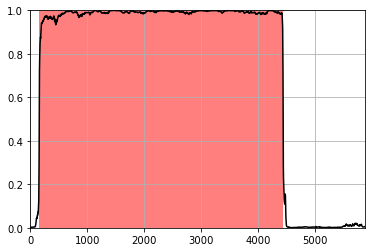

ENST00000216225
recall: 0.9890109896659851
iou: 0.9890109896659851
[(21, 348), (250, 394), (527, 665), (776, 869), (980, 1100), (1023, 1116)]


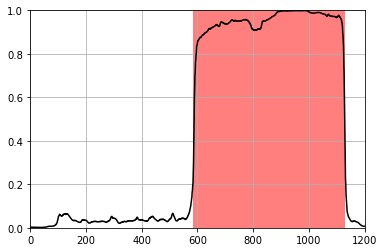

ENST00000190983
recall: 0.99831223487854
iou: 0.997470498085022
[(22, 775), (108, 324), (164, 329), (431, 926), (609, 894), (853, 979), (1073, 1190)]


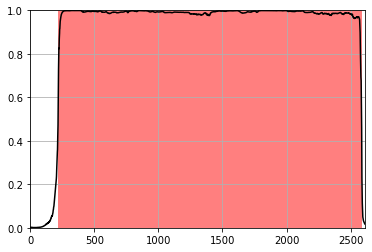

ENST00000210227
recall: 1.0
iou: 0.9909256100654602
[(325, 439)]


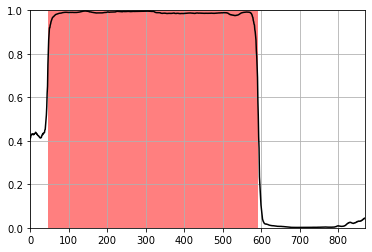

ENST00000211076
recall: 1.0
iou: 0.6000000238418579
[(212, 941), (930, 1191)]


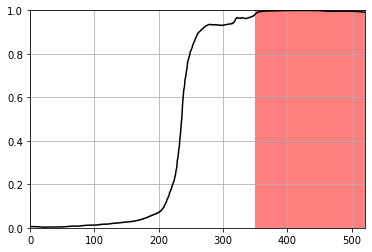

ENST00000216068
recall: 0.9912790656089783
iou: 0.9893617033958435
[(215, 533), (240, 384), (760, 958), (818, 947)]


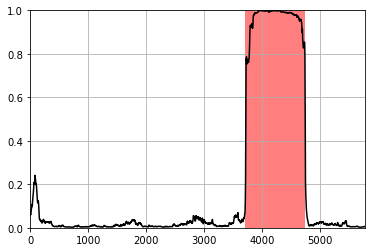

ENST00000207157
recall: 0.998084306716919
iou: 0.9942747950553894
[(315, 1806), (952, 1180), (1432, 1582), (1744, 1897), (2107, 2350), (2138, 2252), (2229, 2394), (2330, 2483), (2419, 2620), (2637, 2739), (2714, 2813), (2766, 2871), (2946, 3108), (3017, 3317)]


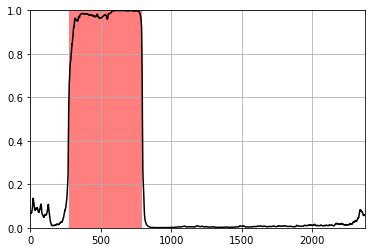

ENST00000199320
recall: 1.0
iou: 1.0
[(133, 1075), (1019, 1118), (1274, 1424), (1906, 2017), (2701, 2815)]


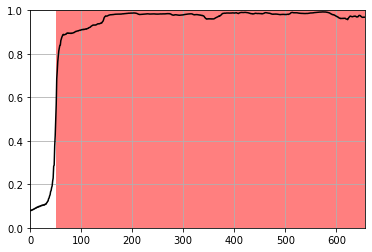

ENST00000202017
recall: 0.9896640777587891
iou: 0.9896640777587891
[(85, 487), (502, 616), (647, 776), (778, 961), (957, 1083), (1151, 1277), (1473, 1626)]


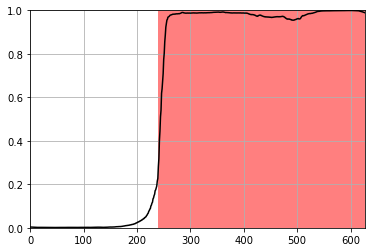

ENST00000194214
recall: 0.9285714030265808
iou: 0.9285714030265808
[(160, 595), (224, 332)]


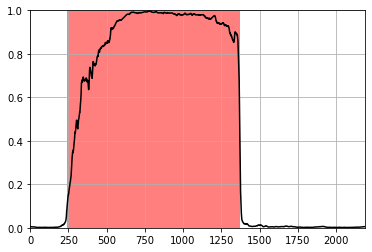

ENST00000216727
recall: 1.0
iou: 0.9960159659385681
[(13, 934), (521, 668), (1181, 1454), (1580, 1790)]


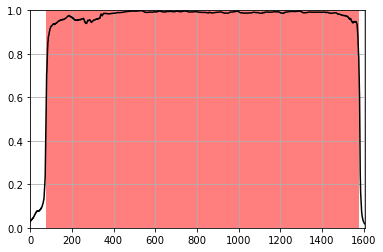

ENST00000215794
recall: 0.9698376059532166
iou: 0.943566620349884
[(159, 1278), (1132, 1264), (1472, 1670)]


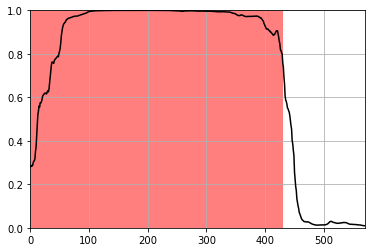

ENST00000204637
recall: 0.9976484179496765
iou: 0.9958920478820801
[(346, 808), (429, 1017)]


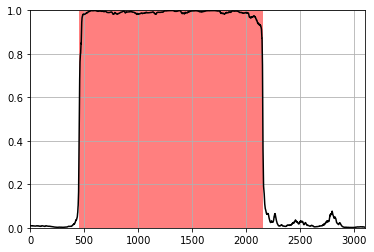

ENST00000215904
recall: 1.0
iou: 0.9967517256736755
[(60, 951), (599, 773), (1028, 1229), (1427, 1544), (1745, 1991)]


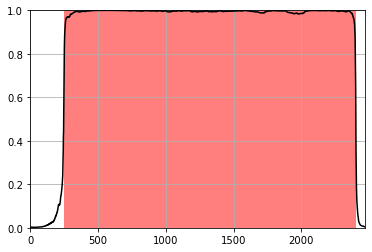

ENST00000215909
recall: 0.9436152577400208
iou: 0.9389439225196838
[(67, 475), (374, 527)]


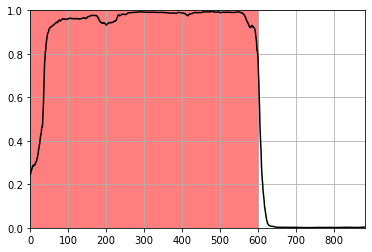

ENST00000201015
recall: 0.6450216174125671
iou: 0.6260504126548767
[(322, 850)]


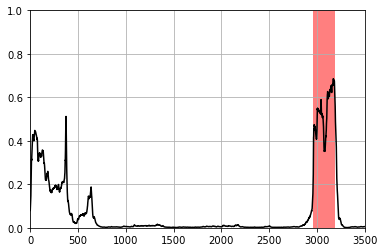

ENST00000216338
recall: 0.9983360767364502
iou: 0.9983360767364502
[(72, 813), (601, 706)]


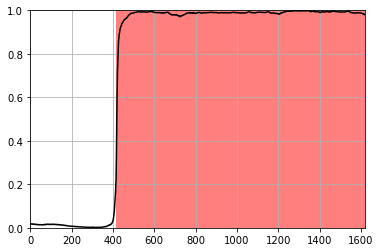

ENST00000204961
recall: 0.7226890921592712
iou: 0.7226890921592712
[(0, 177), (756, 1797), (973, 1231), (1988, 2240), (2226, 2346), (2642, 2852), (3027, 3189)]


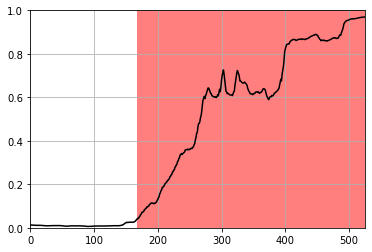

ENST00000215727
recall: 0.9971703290939331
iou: 0.9971703290939331
[(49, 1549), (569, 665), (1188, 1305)]


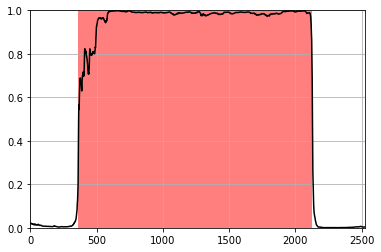

ENST00000211921
recall: 0.9980952143669128
iou: 0.9980952143669128
[(205, 370), (242, 434)]


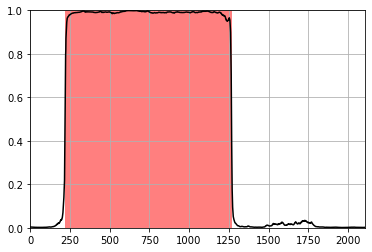

ENST00000190165
recall: 0.938249409198761
iou: 0.938249409198761
[(347, 1766), (450, 807), (1566, 1815), (1777, 1879)]


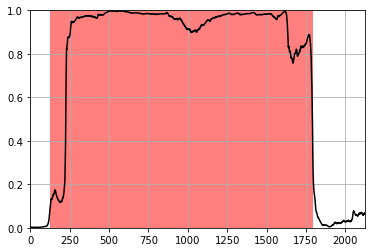

ENST00000199448
recall: 1.0
iou: 0.9993618130683899
[(300, 975), (1164, 1401), (1196, 1292), (1972, 2074), (2214, 2319)]


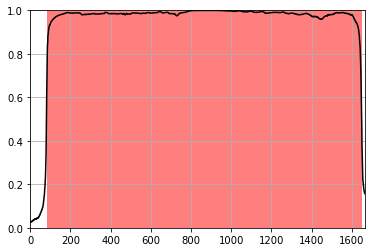

ENST00000209718
recall: 0.0
iou: 0.0
[(67, 238), (104, 197), (312, 426), (651, 1920), (697, 856), (1069, 1198), (1684, 1822), (2078, 2195)]


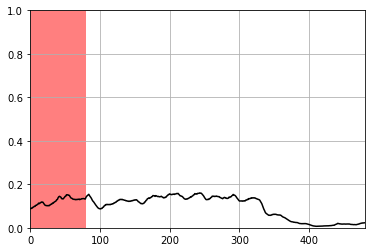

ENST00000206020
recall: 0.9772727489471436
iou: 0.9650872945785522
[(13, 697), (635, 896), (904, 1000)]


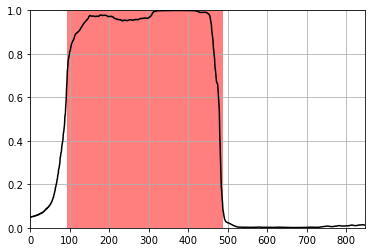

ENST00000215832
recall: 0.8765432238578796
iou: 0.867617130279541
[(205, 1288), (1447, 1573), (1592, 1778), (2076, 2280), (2264, 2411), (2710, 2854), (2894, 3026), (2998, 3097), (3150, 3390), (4728, 4830), (4944, 5064), (5367, 5769), (5587, 5839)]


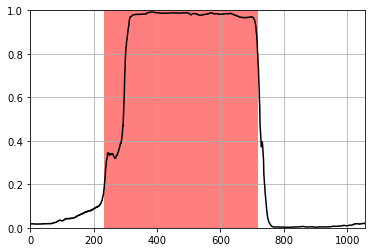

ENST00000211287
recall: 0.704402506351471
iou: 0.704402506351471
[(70, 1168), (1080, 1446), (1181, 1373), (1462, 1777), (3085, 3214), (3676, 3778), (4040, 4148), (4077, 4299), (4362, 4500), (4373, 4487), (4734, 4881), (4997, 5174), (5314, 5551), (5572, 5722), (5610, 5877)]


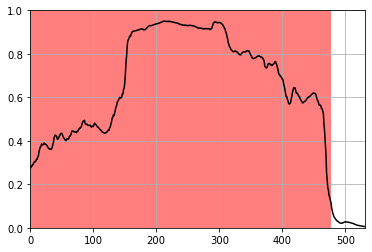

ENST00000199764
recall: 0.9997504949569702
iou: 0.9985048770904541
[(109, 1144), (239, 344), (500, 650), (1413, 1716), (2054, 2156), (2427, 2559)]


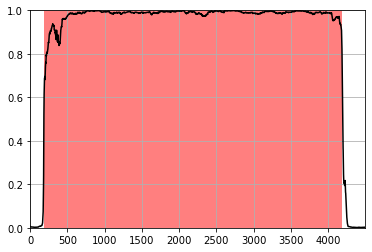

ENST00000202773
recall: 1.0
iou: 0.3379746973514557
[(19, 886), (659, 851)]


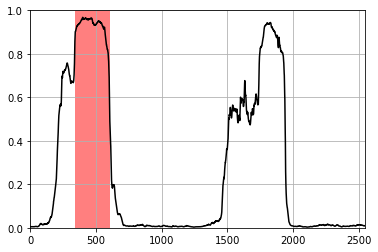

ENST00000205636
recall: 1.0
iou: 0.998309850692749
[(107, 659), (1094, 1241), (1280, 1373), (1565, 1706), (2202, 2292), (2547, 2673), (3054, 3297)]


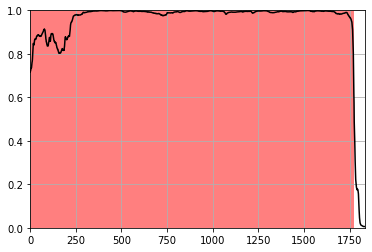

ENST00000216489
recall: 0.9990741014480591
iou: 0.9006677865982056
[(19, 1189), (221, 365), (1417, 1528), (1589, 1715), (1692, 1782), (2033, 2159)]


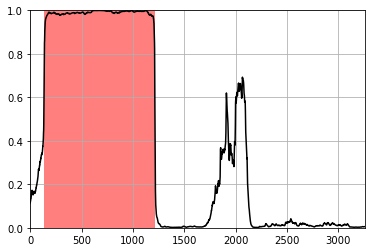

ENST00000206451
recall: 0.9408283829689026
iou: 0.9408283829689026
[(69, 819), (112, 202), (436, 547), (841, 946)]


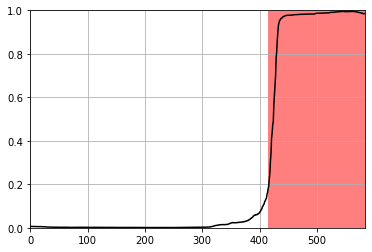

ENST00000216481
recall: 0.9975489974021912
iou: 0.9846774339675903
[(23, 254), (392, 1844), (999, 1353), (1497, 1632), (2081, 2267), (2089, 2203), (2266, 2758), (2513, 2621), (2782, 2926), (2828, 2918)]


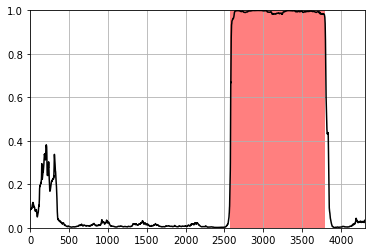

ENST00000221797
recall: 0.8099839091300964
iou: 0.6052948236465454
[(45, 465), (139, 238)]


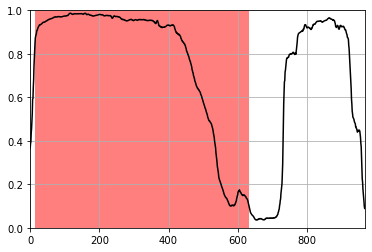

ENST00000217971
recall: 0.9836165308952332
iou: 0.9836165308952332
[(79, 667), (92, 380), (623, 737), (836, 935), (1374, 1494), (1524, 1623)]


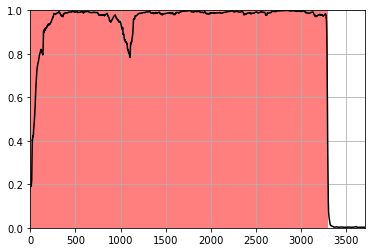

ENST00000228506
recall: 0.9922351837158203
iou: 0.9922351837158203
[(148, 1027), (746, 1037), (1109, 1274), (1398, 1503), (1609, 1753), (1701, 1866), (1910, 2120), (2194, 2386), (2551, 2698), (2700, 2823), (3434, 3587), (3583, 3844), (4030, 4210), (4487, 4685), (4839, 5106), (5377, 5527)]


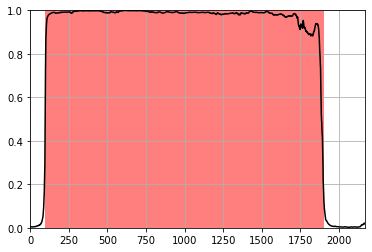

ENST00000218004
recall: 0.9981378316879272
iou: 0.9925925731658936
[(102, 696), (1134, 1245), (1598, 1691), (2312, 2408)]


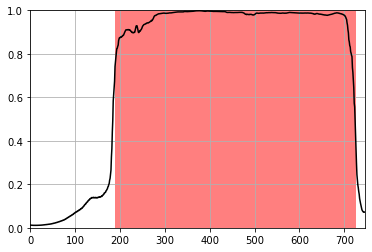

ENST00000216968
recall: 0.9776785969734192
iou: 0.9776785969734192
[(83, 800), (150, 246), (588, 765), (1046, 1160)]


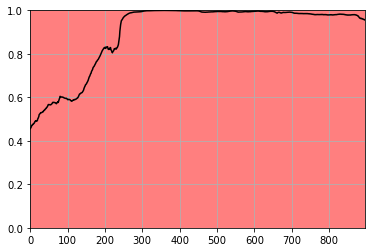

ENST00000225567
recall: 0.9970930218696594
iou: 0.9970930218696594
[(73, 715), (296, 500), (971, 1073)]


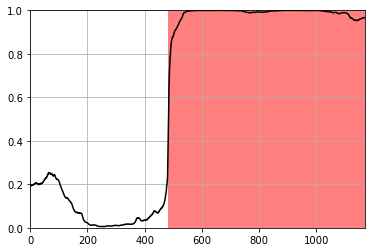

ENST00000225648
recall: 0.6428571343421936
iou: 0.5431034564971924
[(339, 1014), (914, 1283), (1329, 1419)]


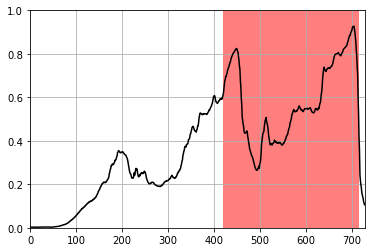

ENST00000228872
recall: 0.9998579621315002
iou: 0.9669001698493958
[(472, 1069), (912, 1083), (989, 1145), (1087, 1249), (1816, 1948)]


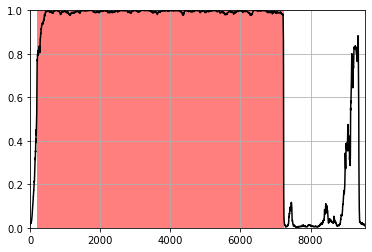

ENST00000225729
recall: 1.0
iou: 0.926916241645813
[(76, 1171), (518, 662), (803, 893), (1502, 1667)]


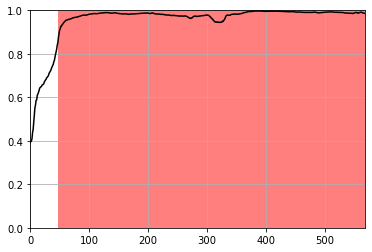

ENST00000230381
recall: 0.9741784334182739
iou: 0.9718969464302063
[(263, 1304), (541, 790), (864, 1029), (1134, 1233), (1758, 1881), (1906, 2005), (2157, 2520), (2829, 2949)]


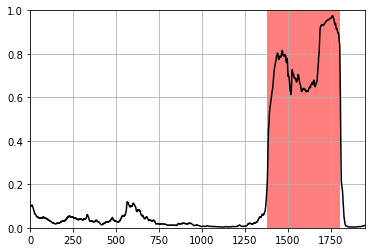

ENST00000221576
recall: 1.0
iou: 1.0
[(141, 243), (289, 490)]


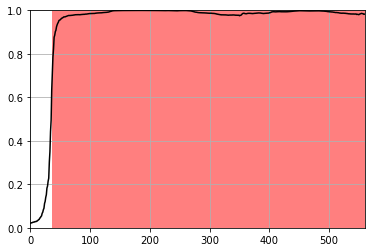

ENST00000230056
recall: 0.998132586479187
iou: 0.9944186210632324
[(333, 963), (1130, 1226)]


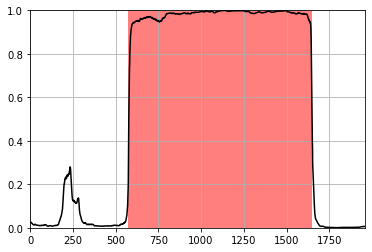

ENST00000222305
recall: 0.9985775351524353
iou: 0.9985775351524353
[(140, 1181), (594, 738), (750, 1083), (1107, 1326), (1325, 1427), (1579, 1693)]


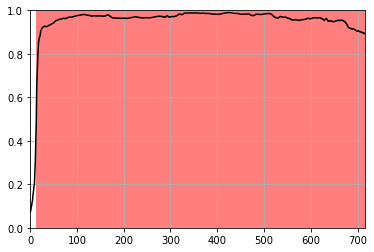

ENST00000223208
recall: 0.9935543537139893
iou: 0.9899082779884338
[(50, 1172), (330, 429), (675, 813), (1275, 1398), (1652, 1934), (1813, 2014), (1857, 1980), (2007, 2112), (2014, 2149), (2329, 2482), (2832, 2940), (2978, 3230), (3123, 3330), (3548, 3668), (3664, 3811), (3860, 4139), (4466, 4595), (4638, 4731), (4907, 5009), (5168, 5288)]


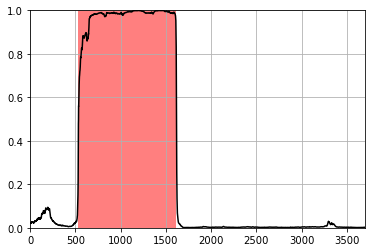

ENST00000226522
recall: 0.8935185074806213
iou: 0.8935185074806213
[(79, 433), (137, 329), (660, 774), (1042, 1147)]


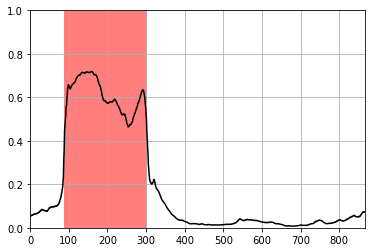

ENST00000228955
recall: 0.9992892742156982
iou: 0.9992892742156982
[(31, 220), (74, 878), (174, 264), (693, 843), (1222, 1312)]


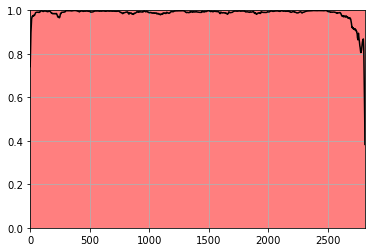

ENST00000230354
recall: 1.0
iou: 0.7338709831237793
[(236, 1256), (1255, 1402), (1358, 1532), (1416, 1545), (1616, 1709)]


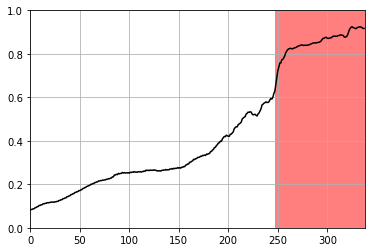

ENST00000222800
recall: 0.9977375268936157
iou: 0.9977375268936157
[(5, 953), (576, 678)]


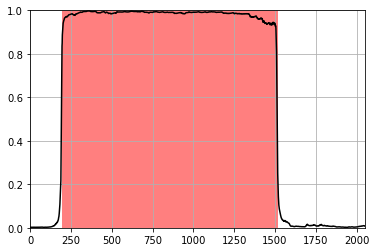

ENST00000223321
recall: 1.0
iou: 0.999661386013031
[(16, 721), (772, 1015), (1072, 1162)]


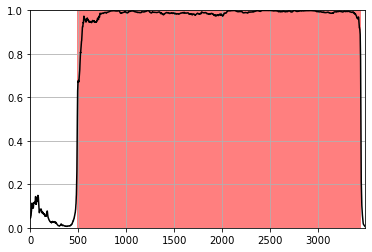

ENST00000220478
recall: 0.9991239309310913
iou: 0.9887299537658691
[(253, 1660), (380, 479), (731, 833), (1418, 1511), (1586, 1712), (2029, 2140), (2224, 2341)]


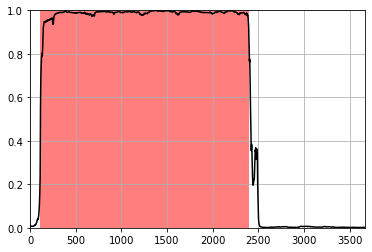

ENST00000220822
recall: 0.9487179517745972
iou: 0.9487179517745972
[(59, 1136), (687, 834), (1610, 1763), (1905, 2085), (1960, 2110), (2162, 2396), (3116, 3215), (3299, 3428)]


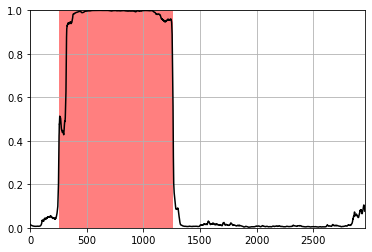

ENST00000221665
recall: 0.984337329864502
iou: 0.984337329864502
[(80, 1571), (84, 279), (160, 391), (546, 756), (1837, 1981), (2309, 2429)]


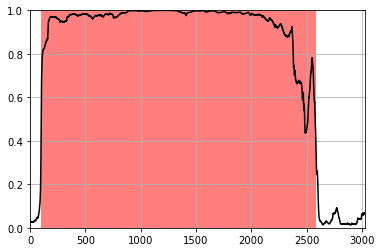

ENST00000219281
recall: 0.9984335899353027
iou: 0.9978083968162537
[(77, 875), (123, 228), (261, 420), (612, 870), (922, 1030), (1637, 1745), (1748, 1940), (1954, 2065), (2091, 2226)]


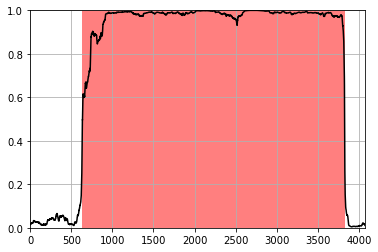

ENST00000223136
recall: 0.1902438998222351
iou: 0.06440957635641098
[(77, 536), (219, 351), (438, 699)]


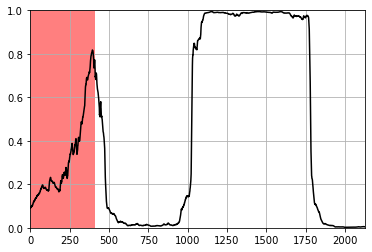

ENST00000222307
recall: 0.8585433959960938
iou: 0.8585433959960938
[(66, 597), (130, 244), (400, 502), (825, 921), (913, 1033)]


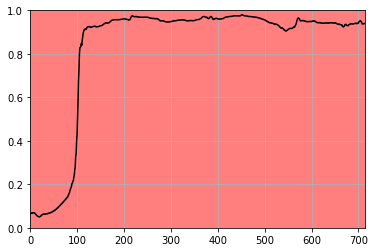

ENST00000226798
recall: 0.9698216915130615
iou: 0.9684931635856628
[(138, 915), (349, 466), (502, 634)]


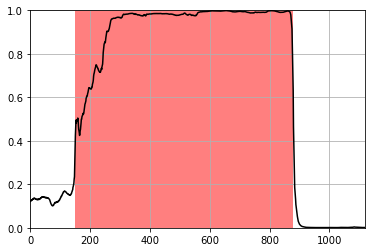

ENST00000221403
recall: 1.0
iou: 0.9987437129020691
[(23, 1028), (633, 744)]


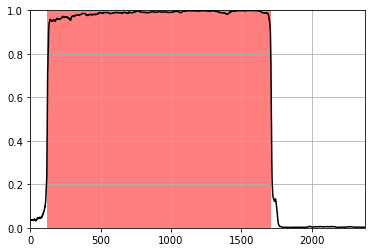

ENST00000222284
recall: 1.0
iou: 0.9601386189460754
[(114, 789), (215, 311), (385, 520)]


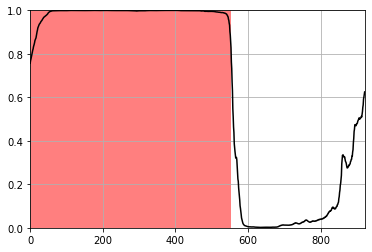

ENST00000228865
recall: 1.0
iou: 1.0
[(297, 660), (413, 557), (708, 906), (719, 836), (1184, 1337), (1494, 1644), (1498, 1612), (1726, 1927), (1967, 2096), (2531, 2624), (2598, 2727), (2668, 2770), (3052, 3280), (3533, 3629)]


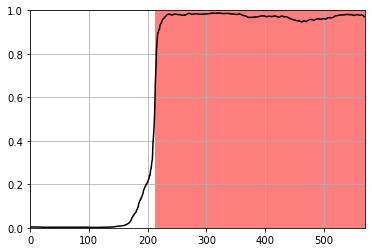

ENST00000219478
recall: 1.0
iou: 0.9946808218955994
[(244, 1687), (1230, 1332), (1469, 1700), (1795, 2002), (1830, 2157), (2429, 2624), (2529, 2658), (2725, 2845), (2913, 3108), (3412, 3502), (3852, 4212), (4198, 4363), (4432, 4534), (4530, 4620), (4836, 5007), (5003, 5114), (5157, 5295), (5294, 5531), (5508, 5601)]


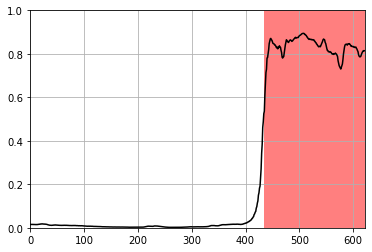

ENST00000217246
recall: 0.9767441749572754
iou: 0.9750000238418579
[(395, 1673), (963, 1071), (1170, 1344), (1623, 1803), (1669, 1900), (1893, 2115), (1987, 2083), (2413, 2509), (2704, 2794), (2849, 2999), (2913, 3057), (3100, 3232), (3152, 3245), (3341, 3437), (3351, 3651), (3412, 3574), (3678, 3768), (3764, 3890), (4385, 4478), (4793, 4952)]


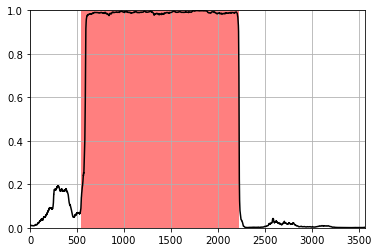

ENST00000227135
recall: 1.0
iou: 0.6832298040390015
[(76, 532), (290, 389), (700, 850), (825, 972), (1305, 1458), (1796, 1910), (1920, 2037), (1978, 2191), (2199, 2484), (2408, 2510), (2593, 2788), (2771, 2864), (2974, 3235)]


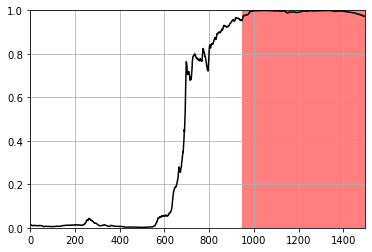

ENST00000221494
recall: 0.8842054009437561
iou: 0.8820686340332031
[(115, 1510), (308, 434)]


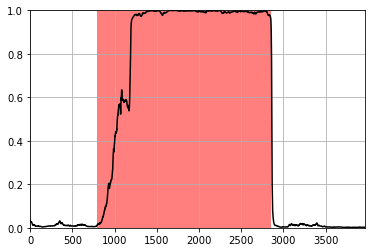

ENST00000219551
recall: 0.9484536051750183
iou: 0.9484536051750183
[(27, 1344), (178, 424), (1028, 1538)]


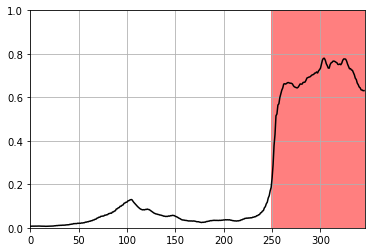

ENST00000222990
recall: 0.9609375
iou: 0.9609375
[(20, 1418), (294, 477), (1586, 1679), (1789, 1885), (1841, 2108), (2409, 2910), (2620, 2746), (2906, 3062), (3058, 3148), (3394, 3496), (4143, 4242), (4171, 4498)]


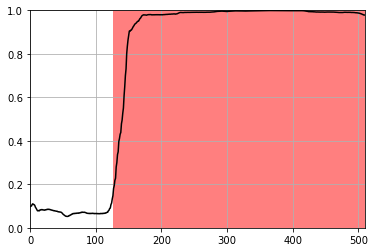

ENST00000229384
recall: 0.9995285272598267
iou: 0.9990574717521667
[]


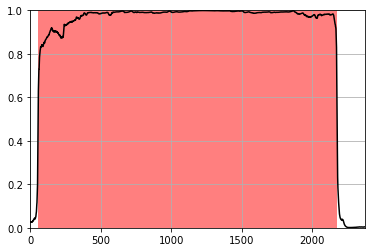

ENST00000228936
recall: 0.9826839566230774
iou: 0.9784482717514038
[(413, 1358), (433, 556), (804, 924), (945, 1053), (1488, 1704), (1676, 1802), (1791, 1944), (2046, 2193), (2762, 2864), (2848, 2944), (2877, 3162), (3035, 3188), (3654, 3795)]


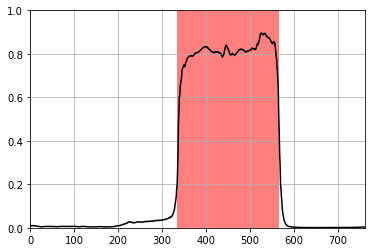

ENST00000220496
recall: 0.995726466178894
iou: 0.8774058818817139
[(27, 942), (220, 316), (574, 754), (1208, 1457), (1275, 1527), (1523, 1793), (1671, 1899), (2040, 2232), (2231, 2423), (2244, 2340), (2485, 2707), (2746, 2989), (2789, 3140), (2998, 3190), (3227, 3362), (3376, 3502), (3455, 3581)]


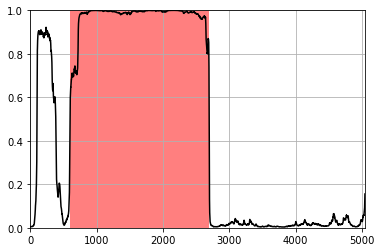

ENST00000222674
recall: 0.9958643317222595
iou: 0.9958643317222595
[(47, 638)]


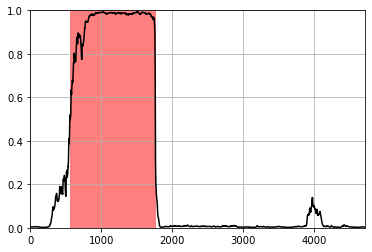

ENST00000219252
recall: 0.9983857870101929
iou: 0.9959742426872253
[(46, 874), (272, 437), (680, 803), (925, 1030), (1581, 1746)]


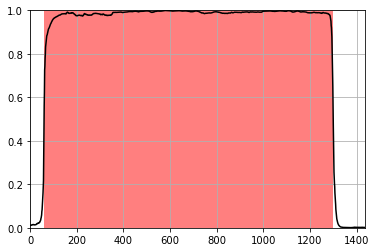

ENST00000222747
recall: 0.9910913109779358
iou: 0.9910913109779358
[(258, 363), (367, 517), (395, 1313), (1319, 1421), (1531, 1669), (2213, 2303), (2356, 2554)]


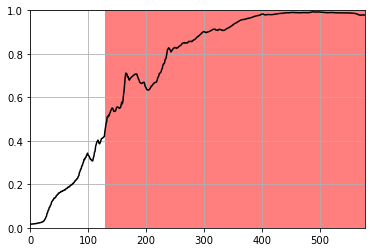

ENST00000229335
recall: 1.0
iou: 0.9931507110595703
[(92, 689), (588, 720), (1288, 1378), (1540, 1666), (2183, 2282)]


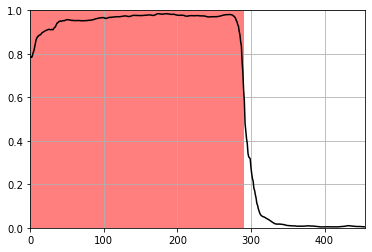

ENST00000219535
recall: 0.9375
iou: 0.9365482330322266
[(133, 790), (671, 797)]


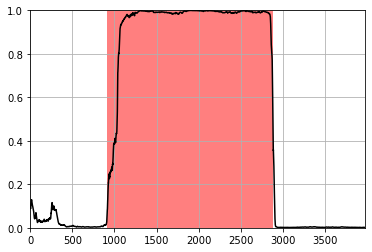

ENST00000225726
recall: 1.0
iou: 0.651063859462738
[(205, 1657), (389, 566), (1682, 1772), (2412, 2631), (2470, 2587), (2645, 2735)]


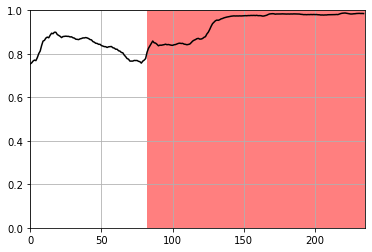

ENST00000219700
recall: 0.9960317611694336
iou: 0.9881889820098877
[(80, 1031), (783, 954), (1133, 1331)]


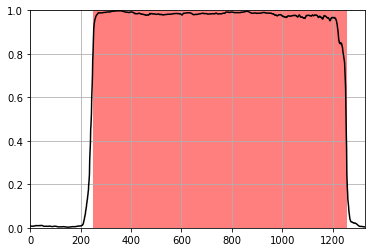

ENST00000221444
recall: 0.9977220892906189
iou: 0.9977220892906189
[(114, 1485), (685, 838), (1357, 1654), (1685, 1784), (1954, 2068), (2446, 2581), (2460, 2757), (2591, 2732), (2668, 3040), (2846, 2963), (3166, 3334), (3366, 3468), (3547, 3712), (3898, 4054)]


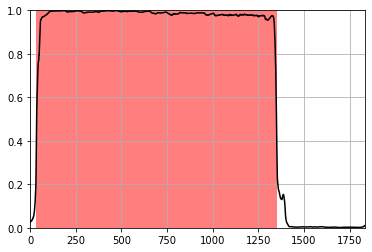

ENST00000223368
recall: 0.9987130165100098
iou: 0.9987130165100098
[(112, 721), (323, 476), (506, 620), (935, 1166), (1274, 1460)]


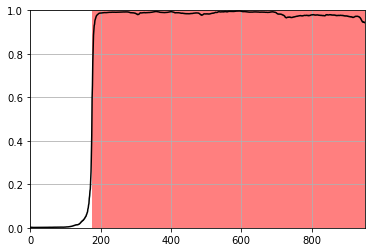

ENST00000220584
recall: 0.9880478382110596
iou: 0.9880478382110596
[(92, 1346), (106, 346), (885, 975), (1071, 1221), (1514, 1661), (1838, 1928), (1851, 1968)]


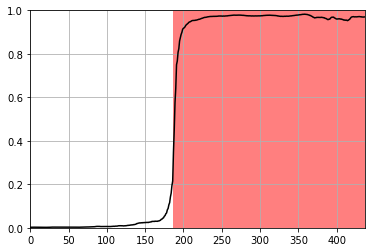

ENST00000225276
recall: 0.9996435046195984
iou: 0.9992872476577759
[(52, 1177), (1094, 1223), (1411, 1558), (1452, 1563)]


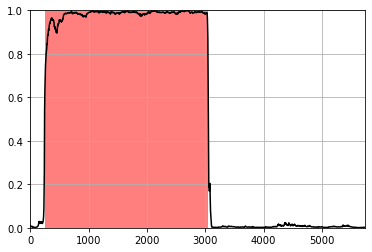

ENST00000223095
recall: 0.9994004964828491
iou: 0.9976062178611755
[(142, 1351), (410, 521), (710, 815), (860, 974), (1436, 1550), (1921, 2026), (2071, 2206), (2370, 2508), (2504, 2600), (2572, 2698), (2707, 2824), (2948, 3080)]


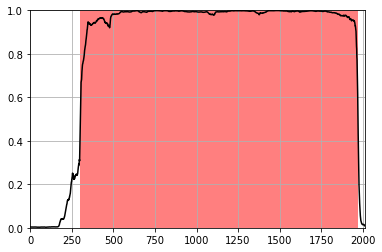

ENST00000223528
recall: 0.9926739931106567
iou: 0.9926739931106567
[(124, 1510), (407, 512), (1220, 1340), (2624, 2774), (2709, 2850), (2947, 3040), (3352, 3574), (3446, 3698), (3775, 3904), (4428, 4539), (4787, 4991), (5028, 5136), (5419, 5518), (5423, 5594), (5953, 6067), (6056, 6182), (6251, 6380)]


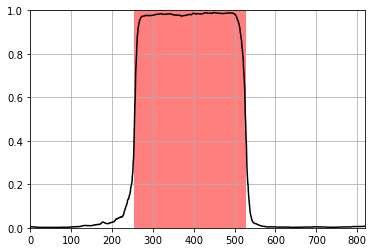

ENST00000221554
recall: 1.0
iou: 0.9975550174713135
[(261, 1452), (319, 529), (530, 644), (664, 760), (1186, 1486)]


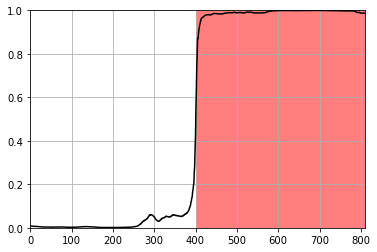

ENST00000219919
recall: 1.0
iou: 0.6963470578193665
[(185, 1073), (304, 562), (498, 597), (969, 1188), (1238, 1367), (1422, 1542), (1695, 1785), (1870, 1972), (2205, 2298), (2597, 2747)]


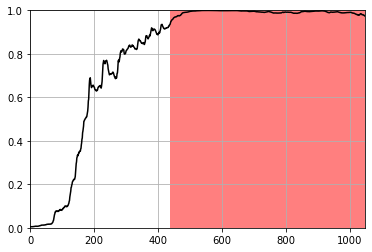

ENST00000218068
recall: 1.0
iou: 1.0
[(79, 388), (119, 257), (350, 446), (547, 703)]


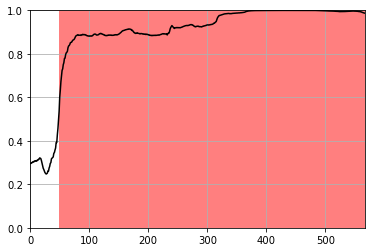

ENST00000225941
recall: 0.9980934262275696
iou: 0.9968264102935791
[(18, 1119), (127, 289), (469, 961), (991, 1423), (1166, 1400), (1409, 1520)]


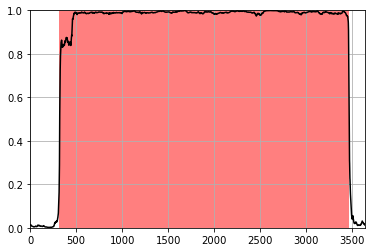

ENST00000216799
recall: 0.9937106966972351
iou: 0.9937106966972351
[(44, 203), (166, 793), (215, 431), (282, 495), (494, 608)]


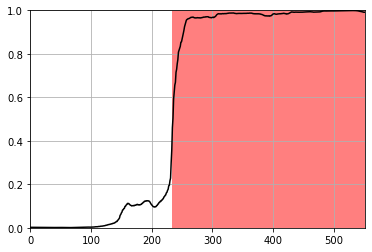

ENST00000226524
recall: 0.9889705777168274
iou: 0.9889705777168274
[(67, 382), (629, 737)]


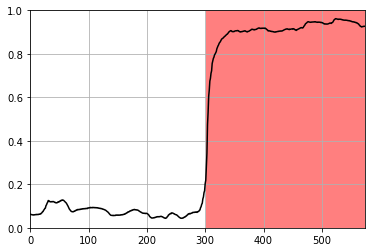

ENST00000225441
recall: 0.9958071112632751
iou: 0.9958071112632751
[(237, 1455), (964, 1075), (1472, 1586)]


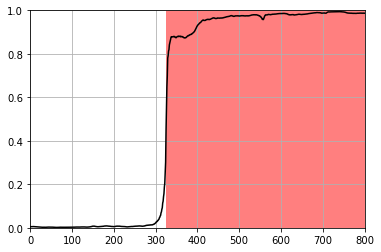

ENST00000227618
recall: 1.0
iou: 0.9935064911842346
[(141, 507), (325, 418), (598, 694)]


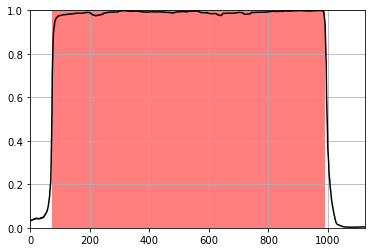

ENST00000225174
recall: 0.9901269674301147
iou: 0.9901269674301147
[(80, 704), (285, 375), (740, 830), (845, 1031), (930, 1107), (1506, 1614), (1573, 1720), (1649, 1838), (1683, 1806), (1879, 2098)]


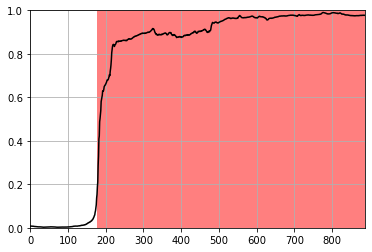

ENST00000229471
recall: 0.9916142821311951
iou: 0.9895397424697876
[(103, 1552), (512, 689), (698, 827), (1190, 1349), (1694, 1838)]


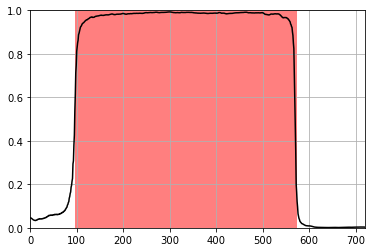

ENST00000225698
recall: 0.9982293248176575
iou: 0.9912087917327881
[(82, 931), (605, 800), (842, 947)]


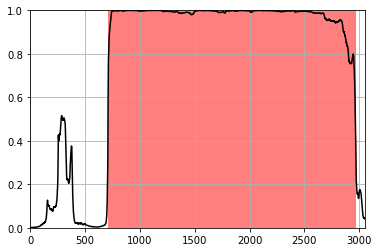

ENST00000222256
recall: 0.9402984976768494
iou: 0.9402984976768494
[(147, 810), (172, 547), (688, 949), (970, 1072), (1190, 1394), (1272, 1464)]


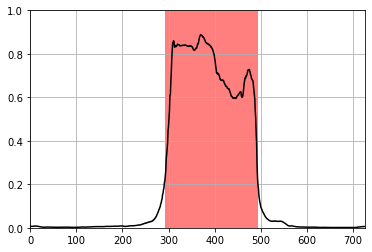

ENST00000228837
recall: 1.0
iou: 0.8366197347640991
[(46, 676), (245, 872), (712, 922)]


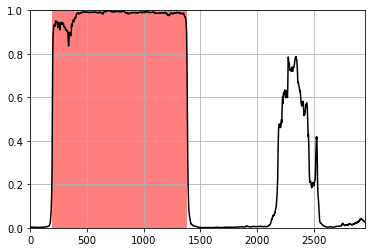

ENST00000221804
recall: 1.0
iou: 0.9989200830459595
[(77, 506)]


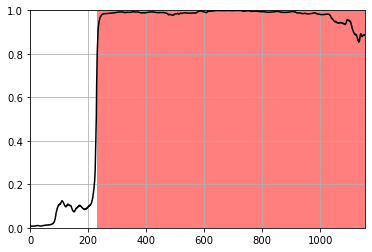

ENST00000223500
recall: 1.0
iou: 0.998268723487854
[(30, 690), (544, 718), (732, 885), (1084, 1234)]


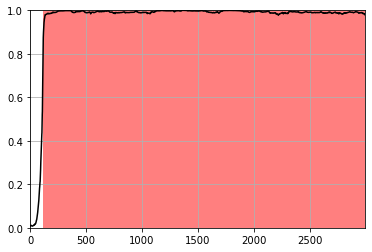

ENST00000222511
recall: 1.0
iou: 0.7725450992584229
[(26, 1190), (1056, 1185), (1364, 1493), (1783, 1939), (2136, 2244), (2620, 2767), (2682, 2784), (3550, 3778), (3557, 3734), (3687, 3828), (4206, 4449), (4417, 4531), (4527, 4653), (5379, 5553), (5622, 5718), (5884, 6148), (6280, 6403), (6284, 6497), (6676, 6778)]


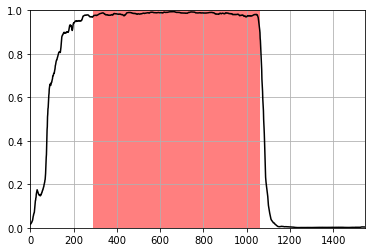

ENST00000221459
recall: 0.9946236610412598
iou: 0.6228955984115601
[(35, 659), (195, 315)]


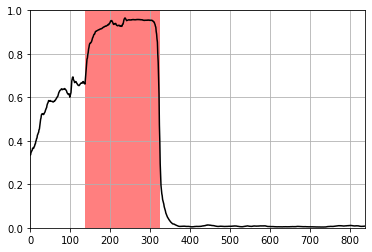

ENST00000229768
recall: 0.7777777910232544
iou: 0.7777777910232544
[(50, 1391), (162, 252), (181, 505), (1062, 1251)]


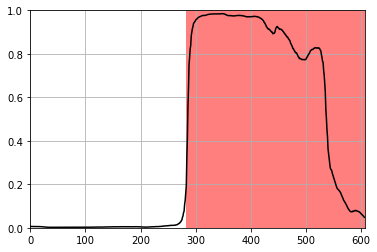

ENST00000217999
recall: 1.0
iou: 0.9984732866287231
[(51, 606)]


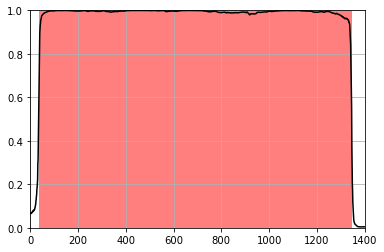

ENST00000218197
recall: 1.0
iou: 0.09743589907884598
[(227, 1205), (363, 474), (1092, 1188), (1331, 1448)]


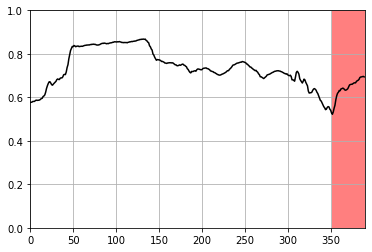

ENST00000229633
recall: 0.8479776978492737
iou: 0.8456189036369324
[(208, 757), (647, 737), (1239, 1365), (1600, 1711), (3203, 3299)]


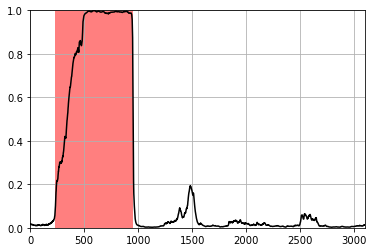

ENST00000217423
recall: 0.9994182586669922
iou: 0.9994182586669922
[(69, 495), (172, 313)]


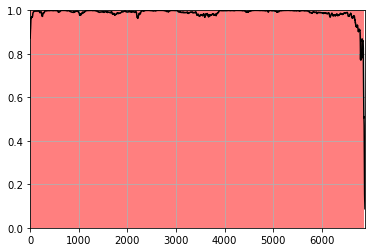

ENST00000220514
recall: 1.0
iou: 1.0
[(30, 720)]


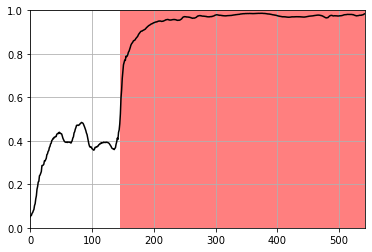

ENST00000222212
recall: 1.0
iou: 0.95652174949646
[(95, 923)]


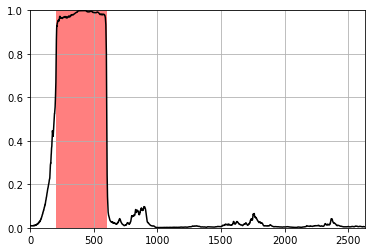

ENST00000227525
recall: 0.99909907579422
iou: 0.9973021745681763
[(119, 851), (145, 274), (315, 441), (856, 1051), (1225, 1336), (1455, 1698), (1669, 1867)]


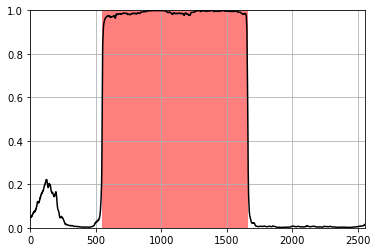

ENST00000222690
recall: 0.9866666793823242
iou: 0.9866666793823242
[(106, 451), (236, 344), (684, 810), (1033, 1297), (1303, 1396), (1926, 2052), (2124, 2226), (2373, 2466), (2761, 2902), (2844, 2937), (3057, 3243), (3544, 3715)]


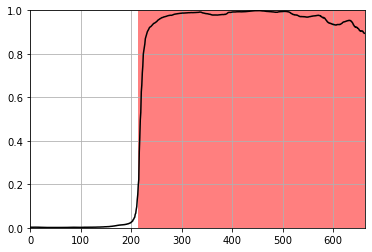

ENST00000219299
recall: 1.0
iou: 0.9322932958602905
[(79, 1213), (86, 188), (416, 545), (1245, 1440), (1532, 1706), (1537, 1651), (1602, 1788), (1888, 2071), (1913, 2057), (1923, 2019), (2370, 2508), (2540, 2711), (2802, 2895), (2926, 3121), (3122, 3464), (3423, 3624), (3487, 3724), (3763, 3931), (3861, 4116), (4174, 4279), (4312, 4525), (4578, 4698), (4994, 5084)]


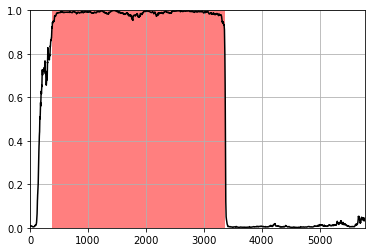

ENST00000229314
recall: 0.5928961634635925
iou: 0.5928961634635925
[(135, 552), (838, 991), (2438, 2561), (2589, 2697)]


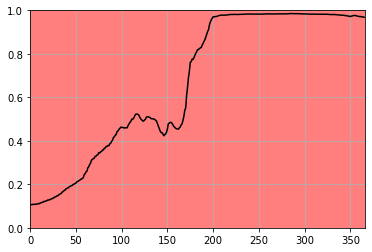

ENST00000217652
recall: 1.0
iou: 0.9811320900917053
[(124, 640), (614, 716), (706, 844)]


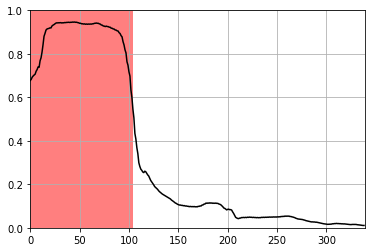

ENST00000219479
recall: 1.0
iou: 1.0
[(24, 588)]


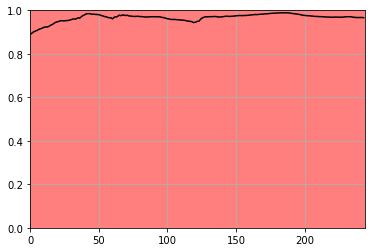

ENST00000219481
recall: 1.0
iou: 0.9106487035751343
[(79, 958), (1219, 1450), (1355, 1463)]


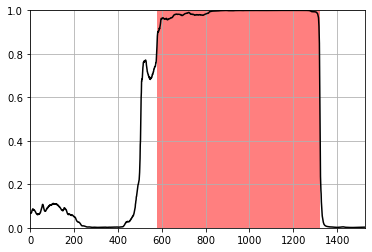

ENST00000227918
recall: 0.9985775351524353
iou: 0.9985775351524353
[(59, 341), (312, 489)]


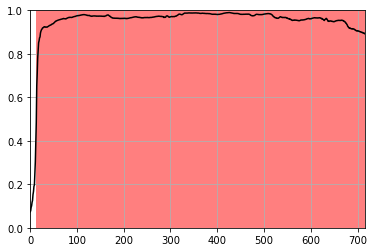

ENST00000217233
recall: 0.9593495726585388
iou: 0.9593495726585388
[(45, 279), (410, 1487), (621, 1038), (1047, 1377), (1422, 1527), (1654, 1774), (1791, 2040), (1849, 2044)]


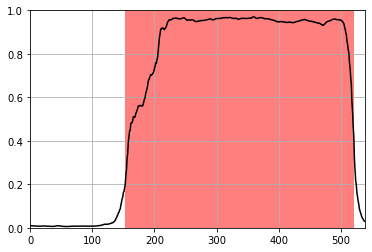

ENST00000219454
recall: 0.9983079433441162
iou: 0.994940996170044
[(94, 757), (390, 501), (476, 590), (656, 776), (1043, 1208)]


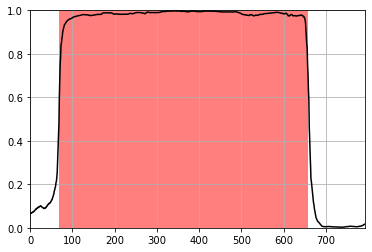

ENST00000217254
recall: 0.9876881241798401
iou: 0.9876881241798401
[(298, 1708), (800, 989), (1067, 1163), (1283, 1445), (1818, 1941), (2083, 2197), (2466, 2610)]


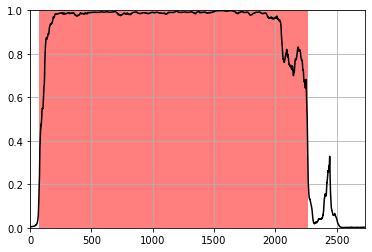

ENST00000229390
recall: 0.9637305736541748
iou: 0.9637305736541748
[(139, 805), (329, 521), (545, 839)]


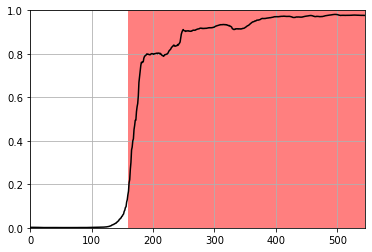

ENST00000228938
recall: 0.9708994626998901
iou: 0.9607329964637756
[(66, 453), (208, 502), (449, 620)]


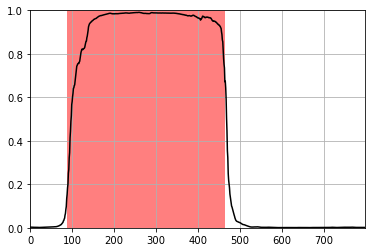

ENST00000228438
recall: 0.9954954981803894
iou: 0.7293729186058044
[(152, 602), (261, 363), (534, 675), (764, 893), (921, 1044), (1277, 1373)]


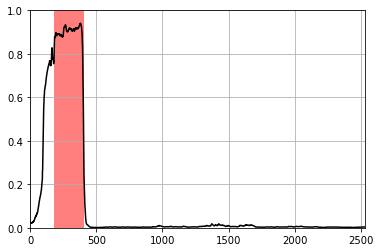

ENST00000228799
recall: 0.9956709742546082
iou: 0.9956709742546082
[(93, 1437), (193, 289), (712, 868), (1078, 1279), (1538, 1751), (1971, 2148), (2144, 2282), (2184, 2286)]


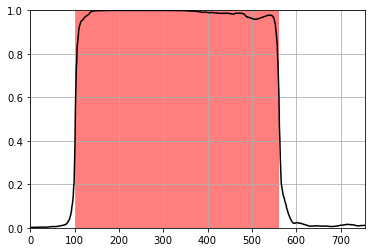

ENST00000229135
recall: 1.0
iou: 0.9880239367485046
[(125, 626)]


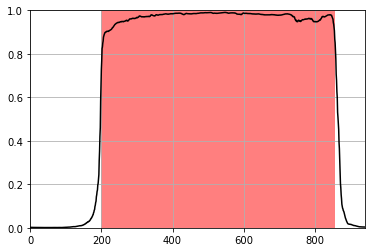

ENST00000217446
recall: 0.9983305335044861
iou: 0.9983305335044861
[(7, 1315), (779, 920), (876, 987), (1283, 1472), (1336, 1585)]


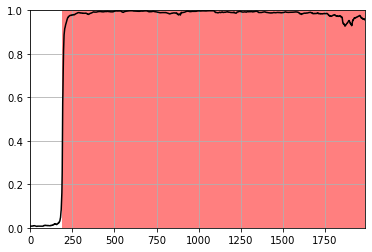

ENST00000217182
recall: 0.9742063283920288
iou: 0.9742063283920288
[(97, 1489), (1609, 1759), (1653, 1764)]


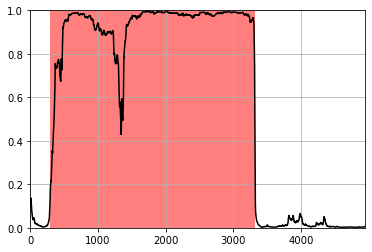

ENST00000230323
recall: 0.9083333611488342
iou: 0.8755019903182983
[(277, 727), (302, 1733), (600, 876), (1098, 1224), (1563, 1938), (1978, 2092)]


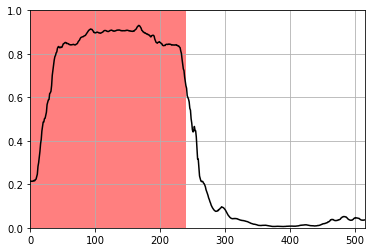

ENST00000222381
recall: 0.9966694712638855
iou: 0.9966694712638855
[(57, 1125), (328, 454), (559, 658), (667, 769), (1444, 1594), (1463, 1676), (1751, 1853), (1815, 2100)]


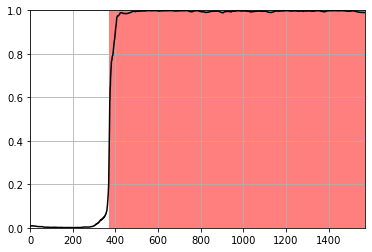

ENST00000219207
recall: 1.0
iou: 0.9949596524238586
[(132, 681), (643, 826), (928, 1063), (1212, 1356)]


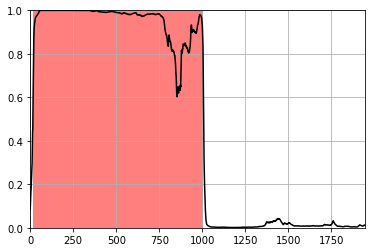

ENST00000217407
recall: 1.0
iou: 0.9991836547851562
[(35, 1481), (423, 570), (1293, 1395), (1492, 1762), (1568, 1775)]


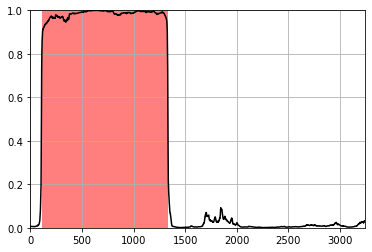

ENST00000225728
recall: 0.9962546825408936
iou: 0.9602888226509094
[(77, 473), (345, 513), (469, 580), (1502, 1607)]


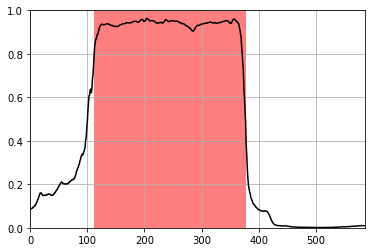

ENST00000223215
recall: 0.9234863519668579
iou: 0.9228723645210266
[(229, 1237), (354, 537), (758, 851), (1205, 1376), (1523, 1709), (1687, 1825), (2303, 2399), (2457, 2562)]


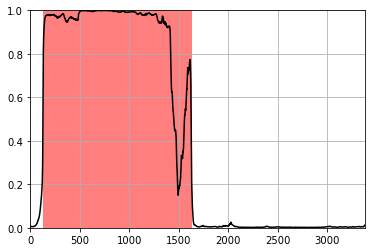

ENST00000229281
recall: 0.9990019798278809
iou: 0.9980059862136841
[(100, 481), (194, 407)]


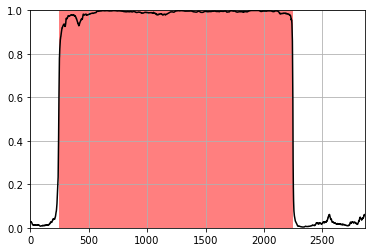

ENST00000221730
recall: 0.9968944191932678
iou: 0.9968944191932678
[(237, 1320), (502, 718), (751, 964), (1444, 1540), (1476, 1692), (1520, 1670)]


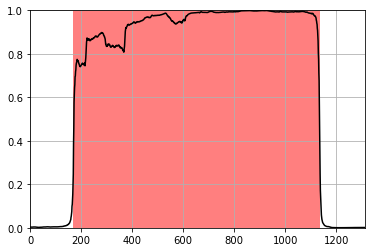

ENST00000223336
recall: 0.9931389093399048
iou: 0.9931389093399048
[(133, 574), (149, 401)]


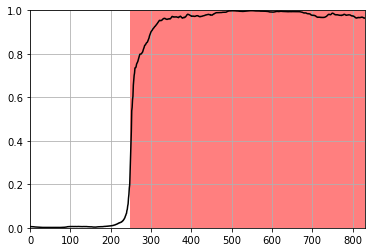

ENST00000225688
recall: 1.0
iou: 0.9554139971733093
[(214, 1060)]


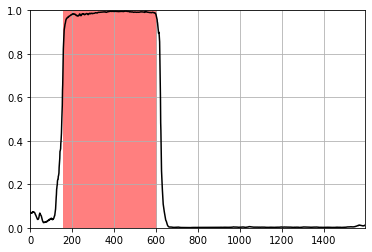

ENST00000229570
recall: 1.0
iou: 1.0
[(63, 357), (347, 452), (455, 557), (692, 806), (1890, 1989), (1992, 2178)]


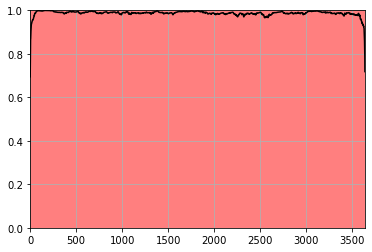

ENST00000229340
recall: 0.8058375716209412
iou: 0.8058375716209412
[(103, 709), (467, 668), (708, 1539), (823, 1000), (1668, 1863), (1672, 1936), (1913, 2099), (2443, 2581), (2484, 2781)]


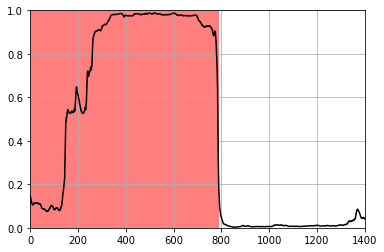

ENST00000226796
recall: 0.9958592057228088
iou: 0.9958592057228088
[(55, 709), (823, 973)]


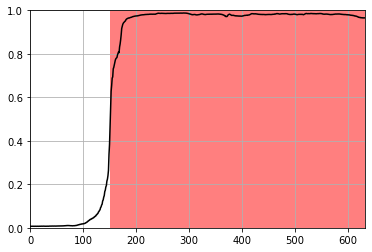

ENST00000223129
recall: 0.7545787692070007
iou: 0.7545787692070007
[(119, 236), (514, 739), (1172, 1538), (1811, 1904)]


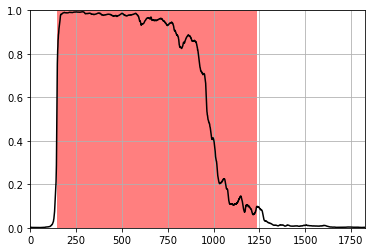

ENST00000222482
recall: 1.0
iou: 1.0
[(20, 1286), (318, 462), (549, 885), (972, 1170), (1263, 1632), (1289, 1610), (1628, 1727), (1976, 2189), (2325, 2442)]


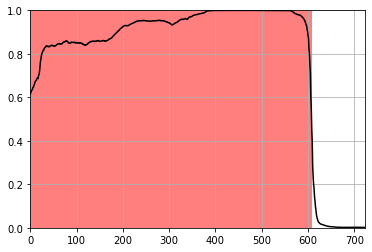

ENST00000226021
recall: 0.9981167316436768
iou: 0.9981167316436768
[(107, 776), (756, 927)]


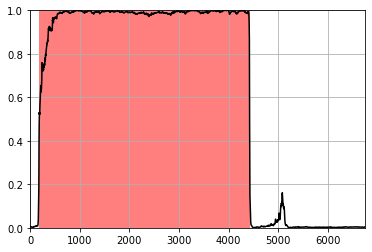

ENST00000226004
recall: 1.0
iou: 0.9994944334030151
[(53, 611), (273, 456), (679, 787), (895, 1030), (965, 1136), (1177, 1285), (1399, 1495), (1598, 1913), (1759, 2056), (2137, 2254), (2270, 2501), (2653, 2860), (2962, 3130), (3068, 3200), (3256, 3385), (3393, 3504), (3601, 3751)]


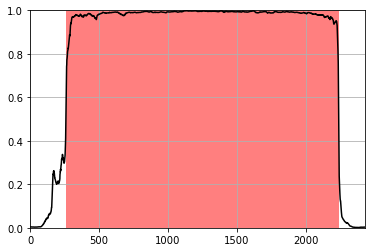

ENST00000221855
recall: 1.0
iou: 0.9594882726669312
[(93, 828), (331, 469), (737, 860)]


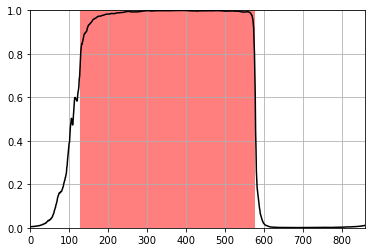

ENST00000228827
recall: 1.0
iou: 0.8559077978134155
[(54, 909), (64, 166), (250, 349), (856, 1063), (1261, 1447)]


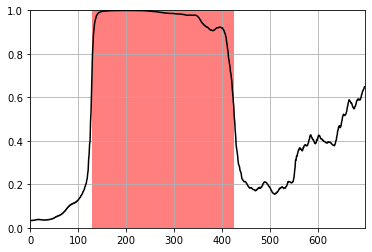

ENST00000228741
recall: 0.9918699264526367
iou: 0.8776978254318237
[(333, 1557), (1474, 1588), (1591, 1696), (2009, 2183), (2243, 2378), (2296, 2467), (3192, 3327), (3957, 4053)]


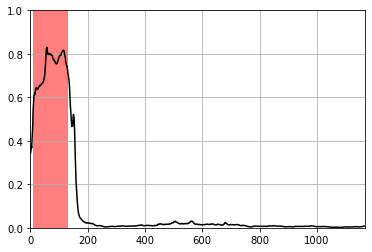

ENST00000230256
recall: 0.540930986404419
iou: 0.5357710719108582
[(175, 1549), (239, 455), (854, 956), (1256, 1430), (1448, 1574), (1570, 1669), (1610, 1715), (1693, 1825)]


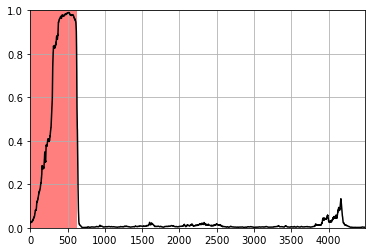

ENST00000221480
recall: 1.0
iou: 0.8340611457824707
[(25, 751), (841, 934), (890, 1037)]


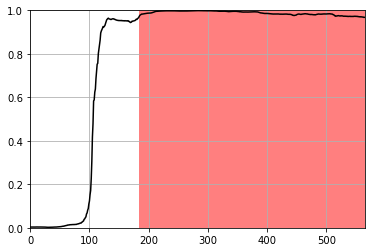

ENST00000226317
recall: 0.9921568632125854
iou: 0.98828125
[(73, 418), (902, 1076), (1230, 1335), (1270, 1393), (1426, 1522)]


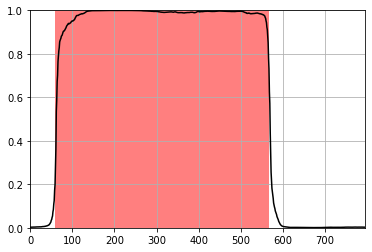

ENST00000221972
recall: 0.9871520400047302
iou: 0.9829424023628235
[(26, 707), (324, 600), (684, 936)]


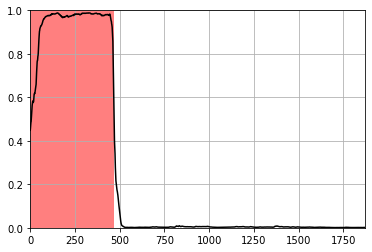

ENST00000228306
recall: 0.9979068636894226
iou: 0.6995598077774048
[(237, 1191), (301, 400), (314, 527), (490, 661), (820, 1243)]


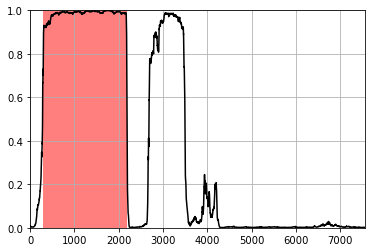

ENST00000222214
recall: 0.9668874144554138
iou: 0.9668874144554138
[(77, 1394), (264, 501), (534, 747), (765, 867), (1623, 1722)]


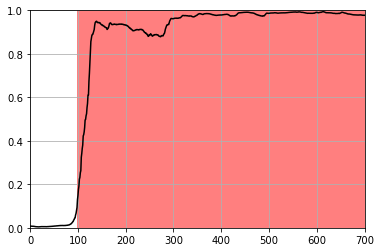

ENST00000228825
recall: 0.99071204662323
iou: 0.99071204662323
[(77, 614)]


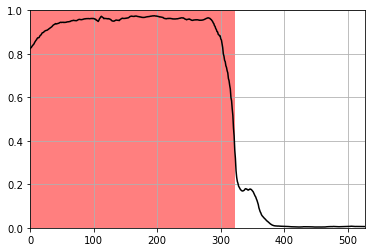

ENST00000218867
recall: 1.0
iou: 0.861074686050415
[(97, 973), (323, 431), (707, 935), (1196, 1289), (1313, 1496)]


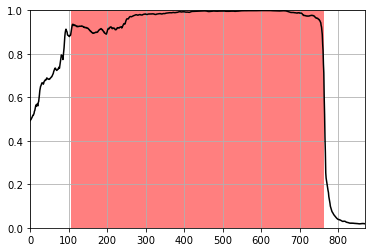

ENST00000229405
recall: 0.9968010187149048
iou: 0.9968010187149048
[(334, 529), (501, 957), (673, 1207), (953, 1061), (1067, 1262), (1314, 1740), (1381, 1633), (1648, 2302), (1808, 2090), (2172, 2589), (2404, 2665), (2762, 2864), (2838, 2931), (3053, 3158), (3307, 3415), (3384, 3579), (3421, 3523), (3538, 3637), (3661, 3763), (4262, 4424), (4496, 4622)]


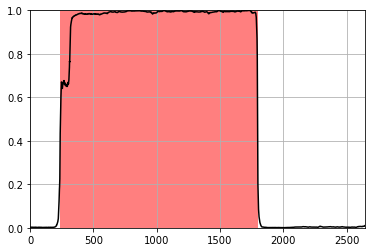

ENST00000219542
recall: 0.9966777563095093
iou: 0.9966777563095093
[(564, 912), (613, 730)]


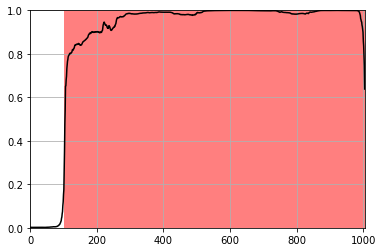

ENST00000225512
recall: 1.0
iou: 0.6425197124481201
[(95, 1163), (378, 597), (996, 1239), (1081, 1189), (1300, 1423), (1821, 2013), (2214, 2361), (2531, 2642), (2589, 2757), (2879, 2969)]


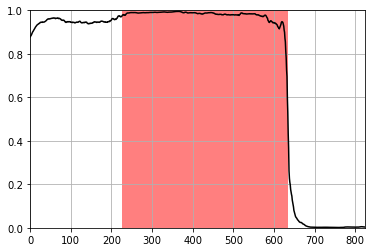

ENST00000228534
recall: 0.9973958134651184
iou: 0.9871134161949158
[(161, 731), (342, 453), (534, 687), (625, 787)]


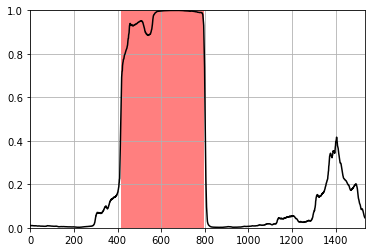

ENST00000220853
recall: 1.0
iou: 0.9979209899902344
[(35, 929), (342, 468), (468, 570), (1083, 1206), (1580, 1676), (1748, 1847), (1824, 1917), (2318, 2555), (2677, 2782)]


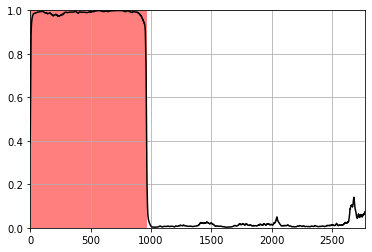

ENST00000223361
recall: 0.9902676343917847
iou: 0.987864077091217
[(143, 1511)]


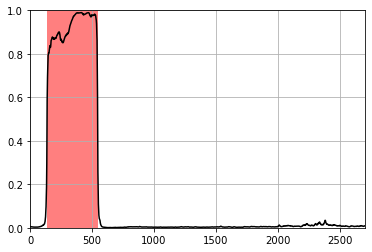

ENST00000224784
recall: 0.260869562625885
iou: 0.260869562625885
[(66, 1200), (106, 202), (289, 403), (454, 643), (826, 922), (1159, 1324), (1242, 1338)]


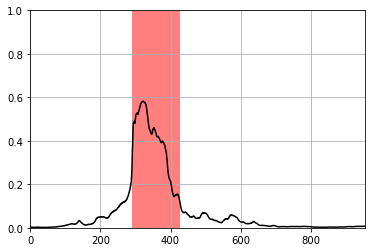

ENST00000223369
recall: 1.0
iou: 0.9947034120559692
[(158, 755), (660, 840), (736, 883), (897, 996), (901, 1024), (1024, 1249), (1523, 1628), (1542, 1689), (1739, 1838), (1946, 2108), (2014, 2161), (2043, 2337), (2206, 2326), (2458, 2596)]


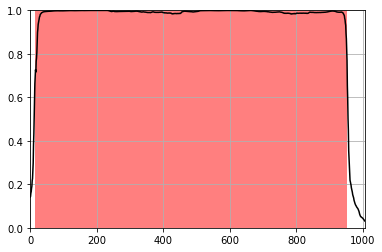

ENST00000225525
recall: 1.0
iou: 0.990784764289856
[(52, 427), (773, 1010), (927, 1080), (1115, 1265)]


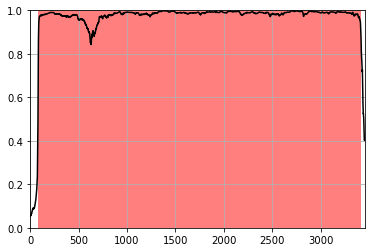

ENST00000226413
recall: 0.9934640526771545
iou: 0.7587354183197021
[(53, 1040), (370, 556), (1980, 2082), (2053, 2203), (2081, 2198), (3025, 3262), (3384, 3483), (3533, 3659), (3756, 3846), (4075, 4201)]


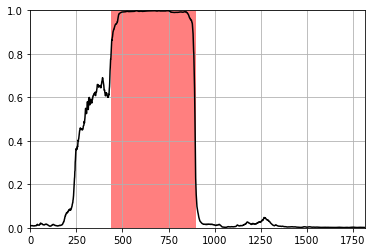

ENST00000217740
recall: 1.0
iou: 0.9885714054107666
[(39, 738), (415, 565), (786, 879), (826, 1039), (1221, 1317), (2001, 2340), (2671, 2764), (3004, 3370), (4652, 4775)]


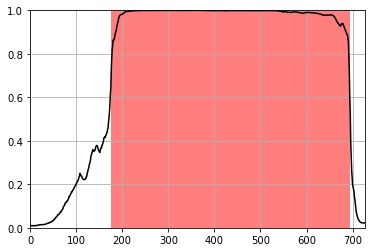

ENST00000223114
recall: 0.9943788647651672
iou: 0.9943788647651672
[(182, 1208), (267, 423), (528, 618), (885, 1131), (1276, 1369), (1435, 1540), (1657, 1867), (1978, 2125)]


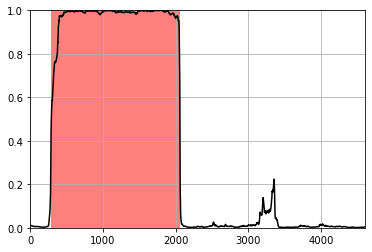

ENST00000223864
recall: 1.0
iou: 1.0
[(269, 713), (717, 828)]


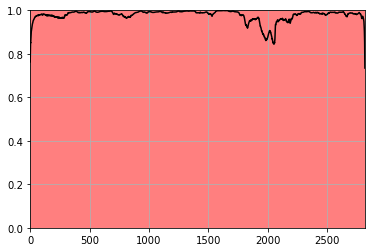

ENST00000229447
recall: 0.997284471988678
iou: 0.997284471988678
[(140, 1022), (318, 459), (462, 561), (1032, 1122), (1151, 1424), (1260, 1437), (1871, 2048), (1879, 2113), (2136, 2268), (2282, 2420), (2416, 2515), (2531, 2651), (2742, 2922), (2809, 2989), (3876, 3966), (4096, 4213), (4916, 5012), (5111, 5210), (5127, 5259), (5624, 5720), (6104, 6230), (6229, 6364), (6383, 6548), (6477, 6573), (6610, 6700), (6700, 6796), (7104, 7206)]


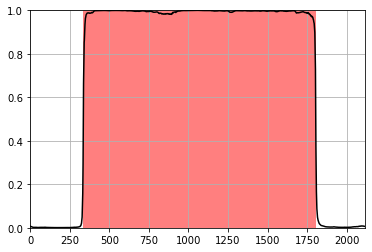

ENST00000221466
recall: 0.9430379867553711
iou: 0.9430379867553711
[(104, 1202), (909, 1050)]


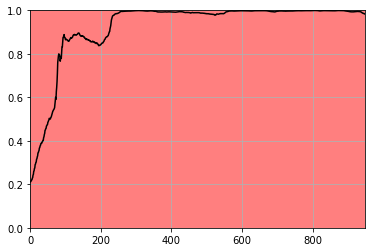

In [12]:
map_preds_os(report, dataset, n_display=500)